# Importing modules

In [1]:
import operator
import sys
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from IPython.display import display
import IPython.core.display as di
from IPython.core.interactiveshell import InteractiveShell

sys.path.append(str(Path('.').absolute().parent))

from include.config import CleaningConfig, PlottingConfig, NotebookConfig
from include.counting import get_count, get_percentage
from include.plotting import get_plot, display_side_by_side
from include.likertScalePlot import likert_scale
from include.textCleaning import wordcloud

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000) 
InteractiveShell.ast_node_interactivity = "all" 

This text is used to hide the code cell when exported in html

In [3]:
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

In [4]:
get_ipython().magic('matplotlib inline')  # Activate that line to use in Jupyter 
matplotlib.rcParams['figure.figsize'] = (15.0, 8.0)

# Load dataset
To find the total number of participants, we took all submissions and then removed those from people who were outside the country (see question 1) and those from people who had not completed the first ten questions (i.e. those people who did not complete the first page of the survey).


In [5]:
df =  pd.read_csv('./de/data/cleaned_data.csv')

In [6]:
print('The total number of particants in this study: {}'.format(len(df)))

The total number of particants in this study: 325


# Section 1. Social demographics
In this section, we determine some information about the demographics of the respondents: language, country of work, gender, salary, educational level, age.


## Language
This survey offered the possibility to choose in which language the questions were displayed. The participants had the choice between German and English. 70% of the participants chose to fill the survey in German.


In [7]:
v_to_count, filename  = get_count(df, ['startlanguage. Start language'], "one choice", "../survey_creation/2017/de/listAnswers/languages.csv", "False", "./de/output/")

In [8]:
perc_to_count = get_percentage(v_to_count, filename)

In [9]:
display_side_by_side(v_to_count,perc_to_count)

Count Percentage
Start language                  
de-informal       228         70
en                 97         30

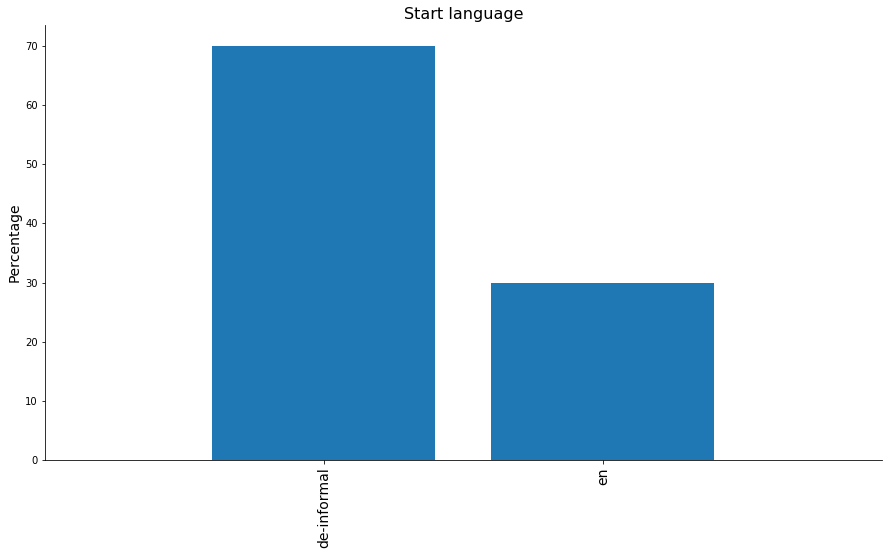

In [10]:
_ = get_plot(perc_to_count, "one choice")

## Country of work
The data was cleaned to remove all participants that were not working in Germany


### In which country do you work?

In [11]:
v_to_count, filename  = get_count(df, ['socio1. In which country do you work?'], "one choice", "./../../survey_creation/2017/de/listAnswers/countries.csv", "False", "./de/output/")

In [12]:
perc_to_count = get_percentage(v_to_count, filename)

In [13]:
display_side_by_side(v_to_count,perc_to_count)

Count Percentage
In which country do you work?                  
Germany                          325        100

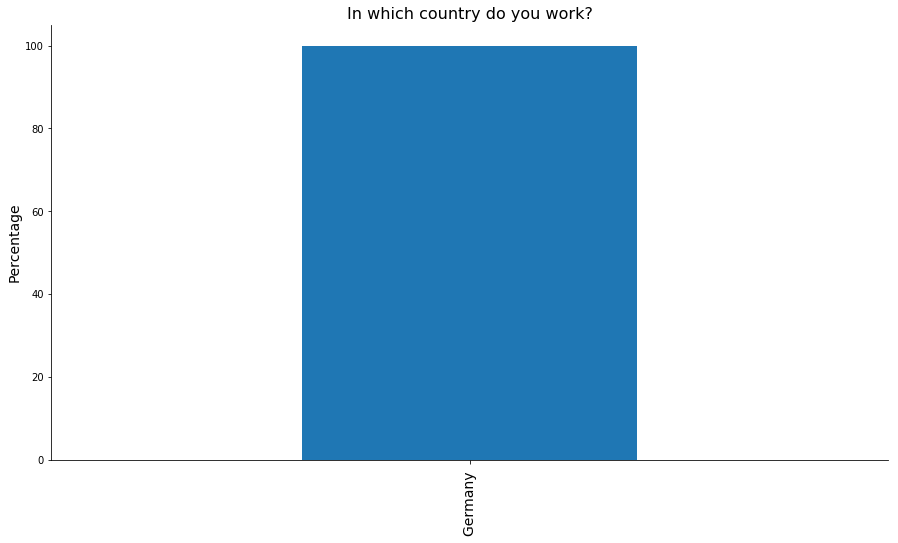

In [14]:
_ = get_plot(perc_to_count, "one choice")

## Gender
Their is a clear gender imbalance in the RSE community in Germany. It is predominately *male* (83%). Only 13% of the participants describe their gender as *female*, while 4% *prefer not to say*.


### Please select your gender

In [15]:
v_to_count, filename  = get_count(df, ['socio2. Please select your gender'], "one choice", "./../../survey_creation/2017/de/listAnswers/gender.csv", "False", "./de/output/")

In [16]:
perc_to_count = get_percentage(v_to_count, filename)

In [17]:
display_side_by_side(v_to_count,perc_to_count)

Count Percentage
Please select your gender                  
Male                         219         83
Female                        34         13
Prefer not to say             10          4
NaN                           62        NaN

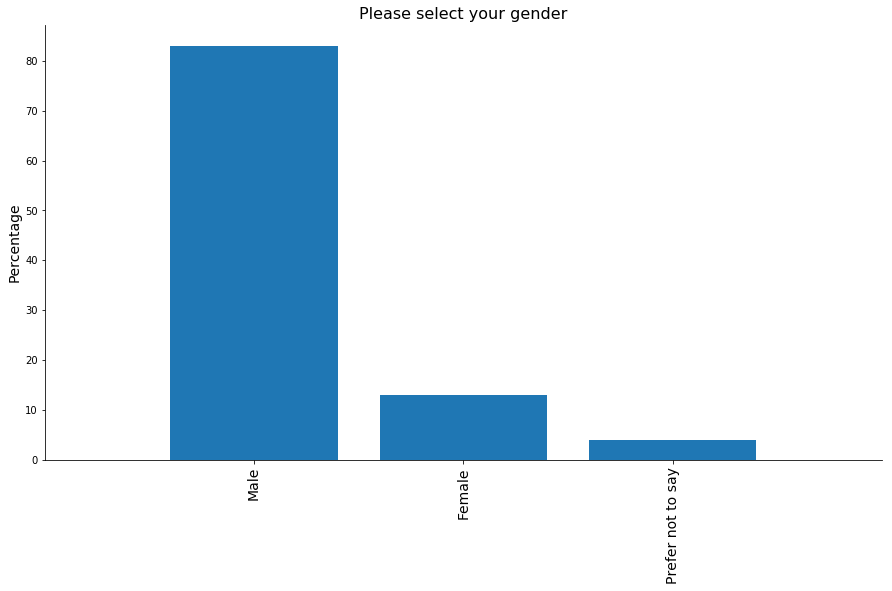

In [18]:
_ = get_plot(perc_to_count, "one choice")

## Age
The majority of RSEs fall within the *25 to 34 years* (45%), and the next more important age range is *35 to 44 years* (39%). The representation of older or younger range is marginal compared to these two groups, The *18 to 24 years* represents only 2%, the *45 to 54 years* only 9% and the *55 to 64 years* 6%.

### Please select your age

In [19]:
v_to_count, filename  = get_count(df, ['socio3. Please select your age'], "likert", "./../../survey_creation/2017/de/listAnswers/age.csv", "True", "./de/output/")

In [20]:
perc_to_count = get_percentage(v_to_count, filename)

In [21]:
display_side_by_side(v_to_count,perc_to_count)

Count Percentage
Please select your age                  
18 to 24 years            5.0        nan
25 to 34 years          118.0        nan
35 to 44 years          101.0        nan
45 to 54 years           23.0        nan
55 to 64 years           15.0        nan
Age 65 or older           NaN        nan

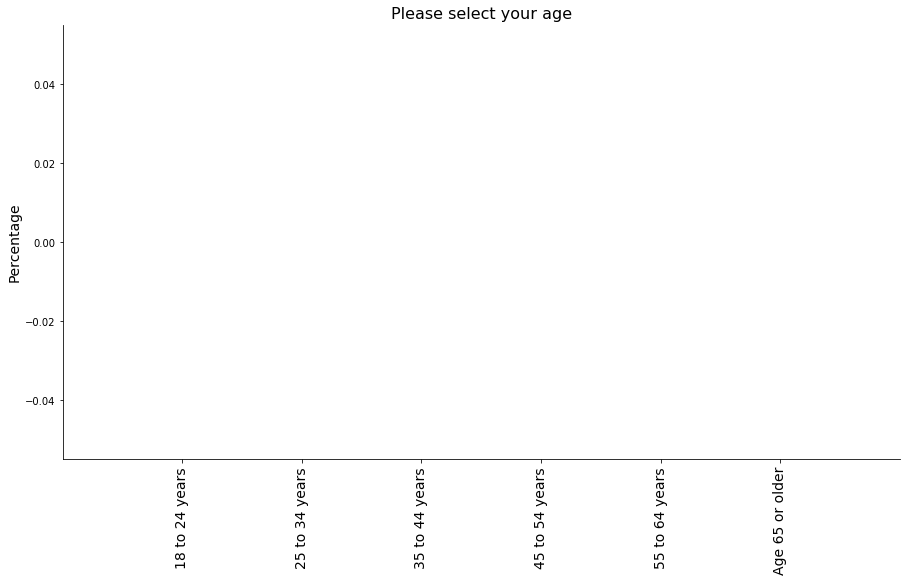

In [22]:
_ = get_plot(perc_to_count, "likert")

## Salary
We asked the participants to give us the range of salary they are paid. The most common salary in Germany for the participants is less than 27.499 euros (19%). However, almost half of the participants (42%), are concentrated within three ranges of salary, spanning from 44.000 euros to 65.999 euros: 10% for the range between 44.000 ad 49.999 euros, 16% between 50.000 and 54.999 euros and 16% between 55.000 and 65.999 euros.


### Please select the range of your salary

In [23]:
v_to_count, filename  = get_count(df, ['socio4. Please select the range of your salary'], "likert", "./../../survey_creation/2017/de/listAnswers/salary.csv", "True", "./de/output/")

In [24]:
perc_to_count = get_percentage(v_to_count, filename)

In [25]:
display_side_by_side(v_to_count,perc_to_count)

Count Percentage
Please select the range of your salary                  
Less than 27.499 EUR                     50.0        nan
Between 27.500 and 32.999 EUR            19.0        nan
Between 33.000 and 38.499 EUR            14.0        nan
Between 38.500 and 43.999 EUR            16.0        nan
Between 44.000 and 49.999 EUR            25.0        nan
Between 50.000 and 54.999 EUR            41.0        nan
Between 55.000 and 65.999 EUR            40.0        nan
Between 66.000 and 76.999 EUR            14.0        nan
Between 77.000 and 109.999 EUR           12.0        nan
More than 110.000 EUR                     NaN        nan
Prefer not to say                        26.0        nan

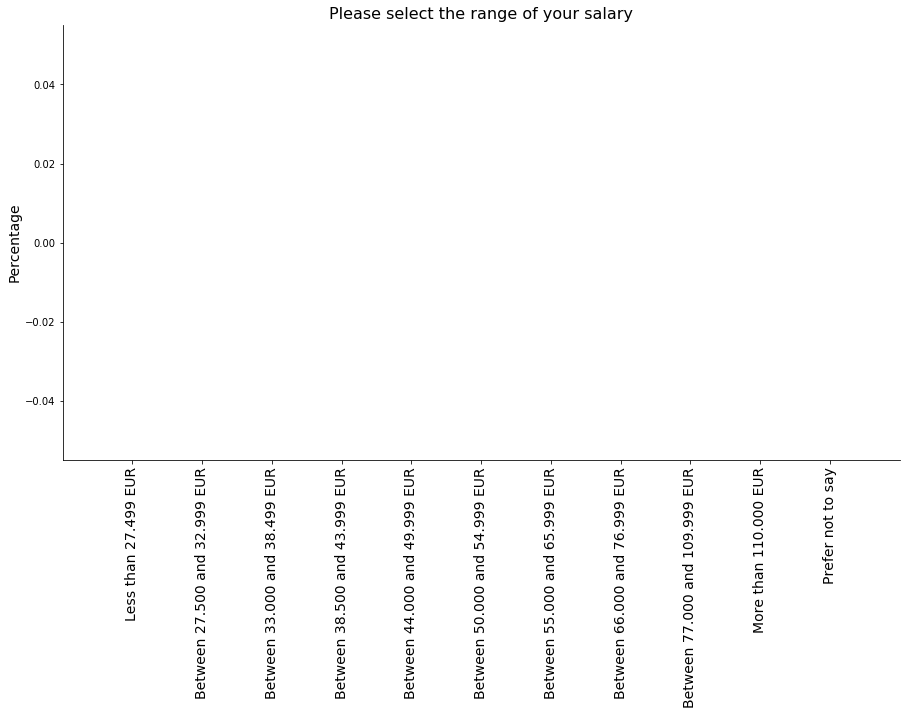

In [26]:
_ = get_plot(perc_to_count, "likert")

### collective bargaining agreement

In [27]:
v_to_count, filename  = get_count(df, ['socio10de. Please select your renumeration group according to your collective bargaining agreement'], "one choice", "./../../survey_creation/2017/de/listAnswers/entgeltgruppe_de.csv", "True", "./de/output/")

In [28]:
perc_to_count = get_percentage(v_to_count, filename)

In [29]:
display_side_by_side(v_to_count,perc_to_count)

Count Percentage
Please select your renumeration group according...                  
E1-E7                                                   7          3
E8                                                      1          0
E10                                                     6          2
E11                                                     9          4
E12                                                     6          2
E13                                                   141         56
E14                                                    37         15
E15                                                     5          2
Other                                                  40         16
NaN                                                    73        NaN

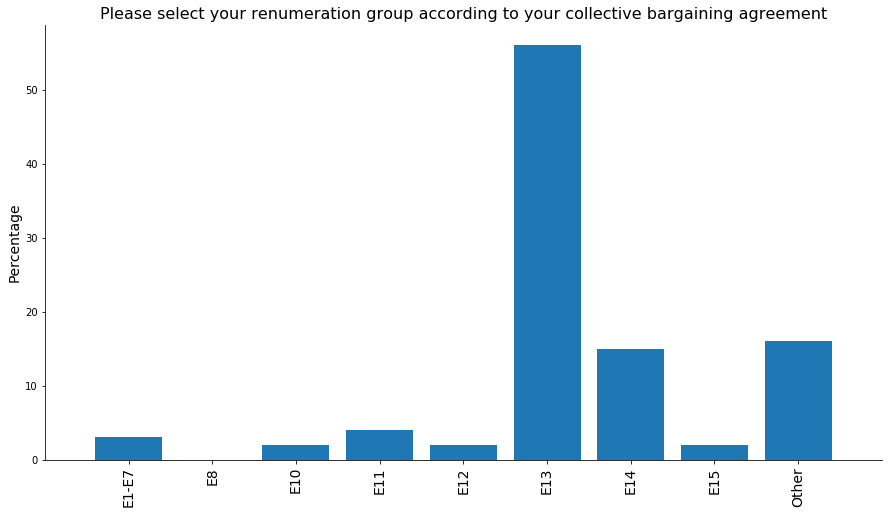

In [30]:
_ = get_plot(perc_to_count, "likert")

## Qualifications
The highest proportion of RSEs hold a *doctorate* (48%) as their highest qualification but only by a margin when compared to *master degree* (43%). The rest of the participants are split between *undergraduate degree* (5%), *Other* (2%) and *final secondary-school examinations, general qualification for university entrance* (2%).
Most RSEs derive from a background in *Physics and Astronomy* (26%). Then the three mains background are *Computer Science* (17%), *Biological Sciences* (11%) and *Other* (11%). There is a significant reduction in numbers in the next most popular background *Geography & Environmental Sciences* (7%).


### What is the highest degree/qualification you have obtained?

In [31]:
v_to_count, filename  = get_count(df, ['edu1. What is the highest qualification you have obtained?'], "one choice", "./../../survey_creation/2017/de/listAnswers/education_de.csv", "False", "./de/output/")

In [32]:
perc_to_count = get_percentage(v_to_count, filename)

In [33]:
display_side_by_side(v_to_count,perc_to_count)

Count Percentage
What is the highest qualification you have obta...                  
Doctorate                                             157         48
Master degree                                         140         43
Undergraduate degree                                   15          5
Other                                                   7          2
Final secondary-school examinations, general qu...      5          2
GSCEs                                                   1          0

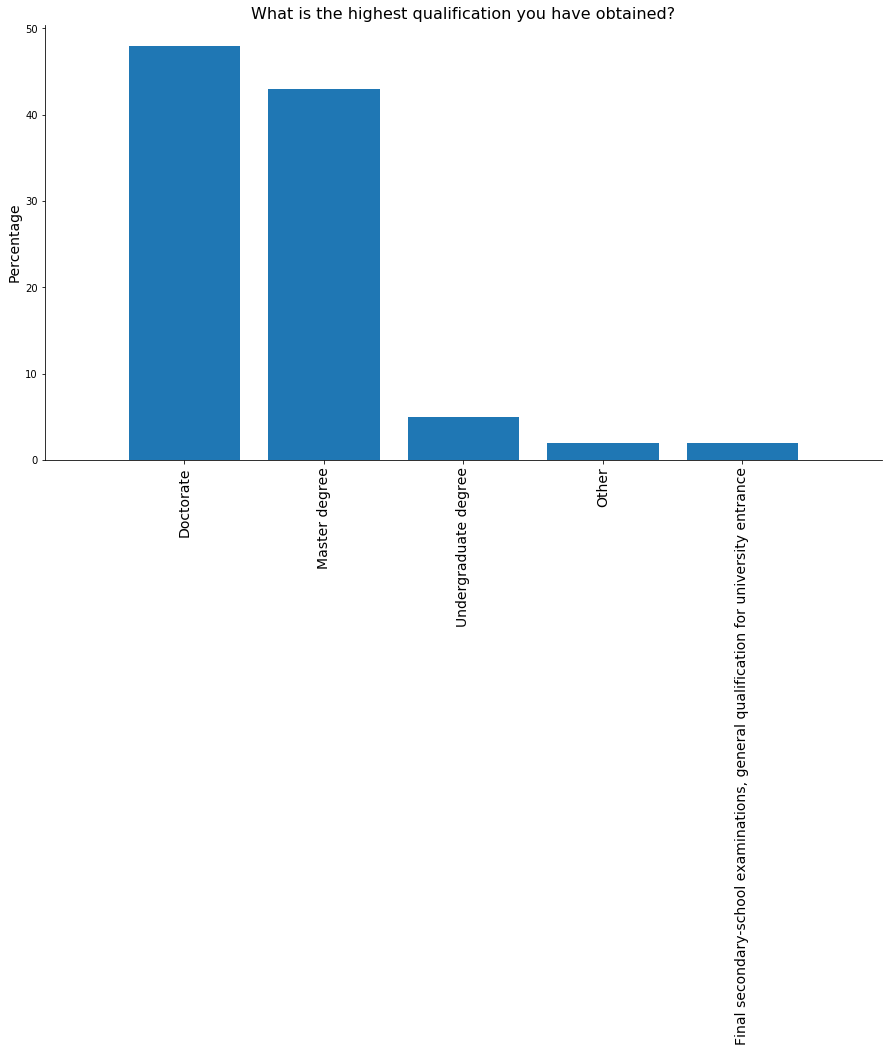

In [34]:
_ = get_plot(perc_to_count, "one choice")

### In which subject is your highest academic degree/qualification?

In [35]:
v_to_count, filename  = get_count(df, ['edu2. In which subject is your highest academic qualification?'], "one choice", "./../../survey_creation/2017/de/listAnswers/academic_field.csv", "False", "./de/output/")

In [36]:
perc_to_count = get_percentage(v_to_count, filename)

In [37]:
display_side_by_side(v_to_count,perc_to_count)

Count Percentage
In which subject is your highest academic quali...                  
Physics and Astronomy                                  83         26
Computer Science                                       54         17
Biological Sciences                                    37         11
Other                                                  36         11
Geography & Environmental Sciences                     23          7
Mathematics                                            17          5
Psychology                                              8          2
Electrical & Electronic Engineering                     8          2
Geology                                                 6          2
Chemistry                                               6          2
Mechanical Engineering                                  5          2
Chemical Engineering                                    4          1
Librarianship & Information Management                  3          1
German                                                  3          1
History                                                 3          1
General Engineering                                     3          1
Classics & Ancient History                              3          1
Agriculture & Forestry                                  3          1
Philosophy                                              2          1
Communication & Media Studies                           2          1
Aeronautical & Manufacturing Engineering                2          1
Sociology                                               2          1
Civil Engineering                                       2          1
History of Art, Architecture & Design                   2          1
Town & Country Planning and Landscape Design            1          0
Medicine                                                1          0
Anatomy & Physiology                                    1          0
Politics                                                1          0
Pharmacology & Pharmacy                                 1          0
English                                                 1          0
Linguistics                                             1          0
Economics                                               1          0

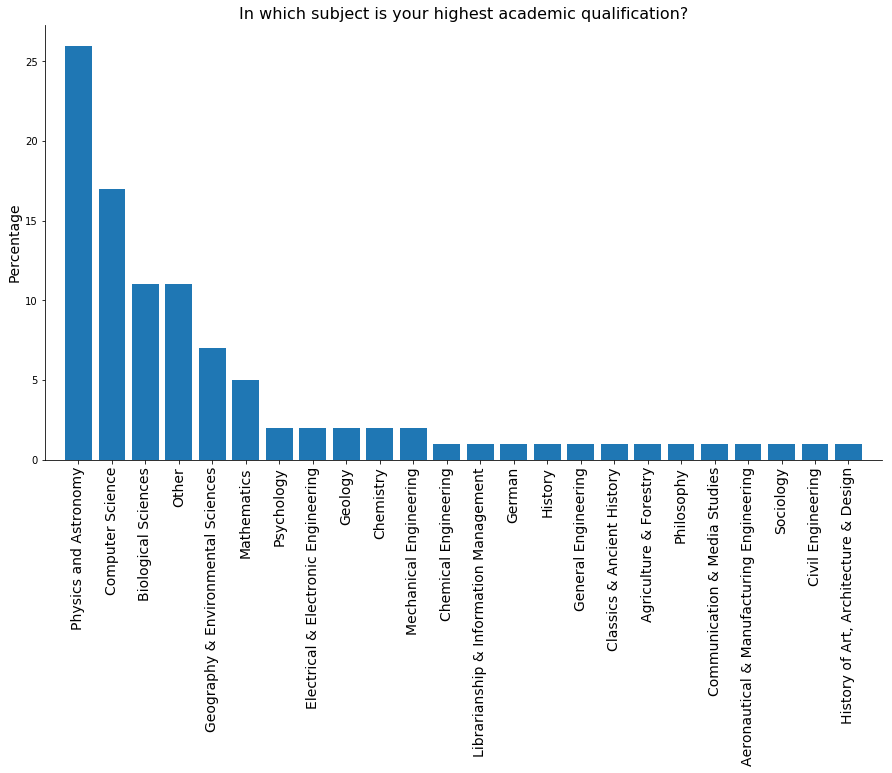

In [38]:
_ = get_plot(perc_to_count, "one choice")

## Professional qualifications
The RSE do not generally have personal qualification other than their diploma. Among the 375 participants, only 54 filled this question with a valuable information and when we analyse the answers, a lot of theses are about their BSc. or MSc. 

### Do you hold any other professional degrees/qualifications? (Please enter each of them separated by a semicolon)

In [39]:
data = df['edu4. Do you hold any other professional qualifications?'].dropna()
data = [i.strip() for i in data if len(i.strip()) > 2 and i.strip().lower() not in ['dr.', 'msc', 'm.a.', 'bsc', 'b.sc.', 'nein', 'diplom', 'none', 'ba. sc.', 'ma. sc.']]
print('Number of participants that have a professional qualifications: {}'.format(len(data)))

Number of participants that have a professional qualifications: 54


In [40]:
results = dict()
for i in data:
    results[str(i.lower())] = results.get(str(i.lower()), 0)+1
results = sorted(results.items(), key=operator.itemgetter(1),reverse=True)
for k in results:
    if len(k[0]) > 3:
        print(k[0].title(), k[1])

Habilitation 3
Diplom Physik 2
Diplom (Physik) 1
Europan Master Linguistics 1
B.A Psychologie 1
Master Environmental Management 1
Master Of Library And Information Science 1
Staatsexamen 1
Diplom In Mathematik 1
Dr., Msc, Diplom, Bsc 1
M.Sc. Mathematik 1
Diplom Sozialwirt 1
Zur Zeit Noch Student: Bachelor Of Science Geoinformatik 1
Professorship 1
Teaching Diploma In Physics, Qualifying Me For Teaching Posts At Upper Secondary Schools 1
Physics 1
B.Sc. Physik 1
B.Sc. Physics, M.Sc. Neuroscience 1
Dipl.-Inf.(Fh) 1
Master/Bachelor In Molekulare Biotechnologie 1
Bachelor Of Science 1
Yes (Computer Science) 1
Diplom Ingenieur Nachrichtentechnik/Informatik (Fh) 1
Doktorarbeit In Biologie Eingereicht, Aber Noch Nicht Verteidigt 1
Bachelor Geoinformatik 1
Bachelor Of Science Geographie 1
Diplom (Fh) Maschinenbau 1
Toolmaker Certificate (Germany) 1
Berufsausbildung Tech. Assisent Für Medien (Erworben Vor Dem Studium) 1
French Telecommunication Engineering School 1
Ba. Sc., Ma. Sc. 1
Elektroina

In [41]:
 wc = wordcloud(df, ['edu4. Do you hold any other professional qualifications?'])

(-0.5, 1499.5, 799.5, -0.5)

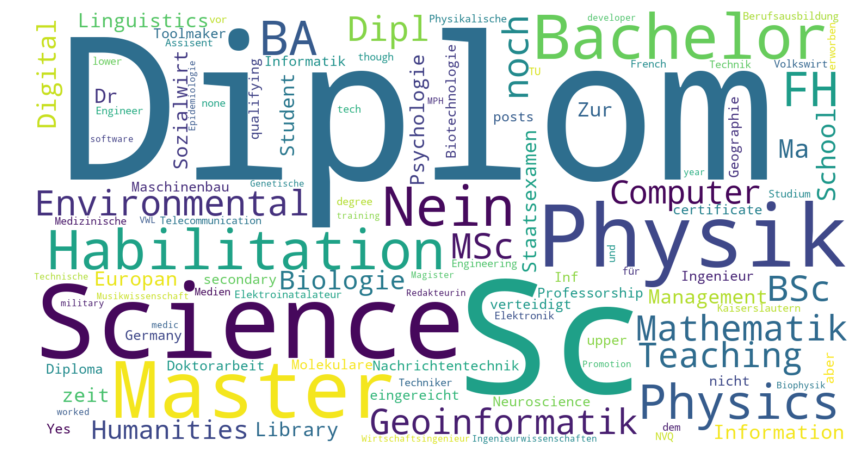

In [42]:
 plt.imshow(wc, interpolation='bilinear')
 plt.axis("off")

# Section 2: Questions about coding
In this section we investigate the relationship between RSEs and the code they develop.

As expected, the vast majority of RSEs (96%) write code. When they code, they code for others in general. Only 8% of them write code for themselves, and 71% for 2 or more people

Also, more than the half of them (54%) are involved in software projects that does not necessarily involve coding on their behalf.
However, despite the majority of them writing code, only 47% consider themselves as *professional software developer*. This is a low number when we consider the average time of developing software (10 years) and that they are mainly developing software for others.

Unsurprisingly, RSEs spend the majority of their time coding. The only other major call on their time is "research", so it would appear that their job title accurately describes their work. "Teaching" is the aspect of work with the least call on RSEs time: 54% of RSEs reported that they spent no time teaching.


### Do you write code as part of your job?

In [43]:
v_to_count, filename  = get_count(df, ['rse1. Do you write code as part of your job?', 'rse4de. Are you involved and responsible for software projects with non-coding activities as part of your job, e.g. do you lead a software projects, design software architectures or UIs, testing, write documentation?'], "y/n/na", "./../../survey_creation/2017/de/listAnswers/.csv", "False", "./de/output/")

In [44]:
perc_to_count = get_percentage(v_to_count, filename)

In [45]:
display_side_by_side(v_to_count,perc_to_count)

Yes [Count]  No [Count]  \
Do you write code as part of your job?                                        
 Do you write code as part of your job?                     311          14   
 Are you involved and responsible for software ...          176         149   

                                                   Yes [Percentage]  \
Do you write code as part of your job?                                
 Do you write code as part of your job?                          96   
 Are you involved and responsible for software ...               54   

                                                   No [Percentage]  
Do you write code as part of your job?                              
 Do you write code as part of your job?                          4  
 Are you involved and responsible for software ...              46

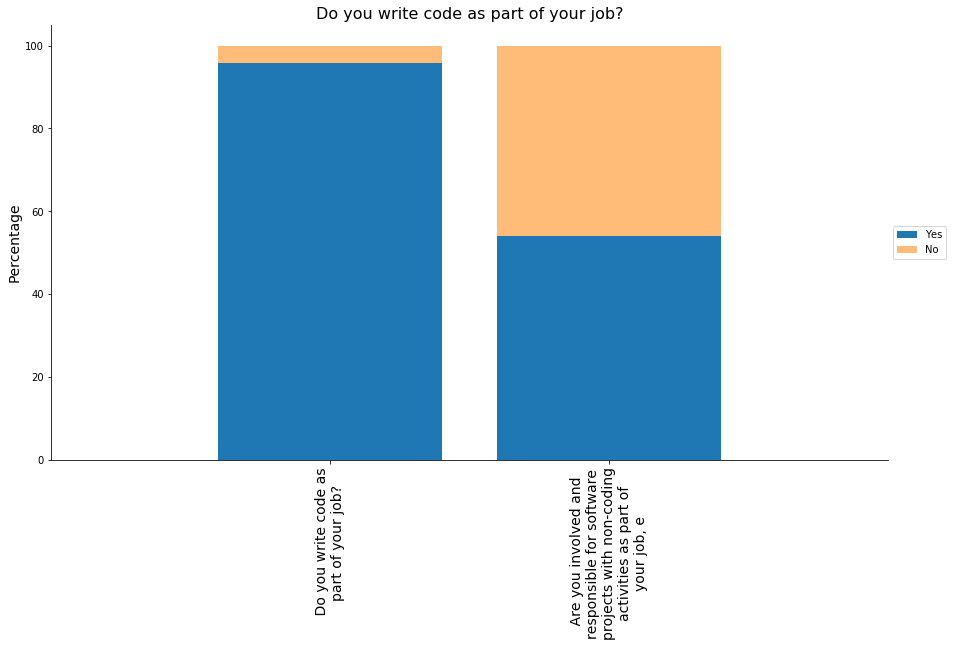

In [46]:
_ = get_plot(perc_to_count, "y/n/na")

### Who uses the code that you write?

In [47]:
v_to_count, filename  = get_count(df, ['rse3[SQ001]. Who uses the code that you write? []'], "likert", "./../../survey_creation/2017/de/listAnswers/likert_usage_5.csv", "True", "./de/output/")

In [48]:
perc_to_count = get_percentage(v_to_count, filename)

In [49]:
display_side_by_side(v_to_count,perc_to_count)

Count Percentage
Who uses the code that you write?                  
0 - Mostly me                         27          8
1                                     68         21
2                                     73         22
3                                     52         16
4                                     54         17
5 - Mostly other people               51         16

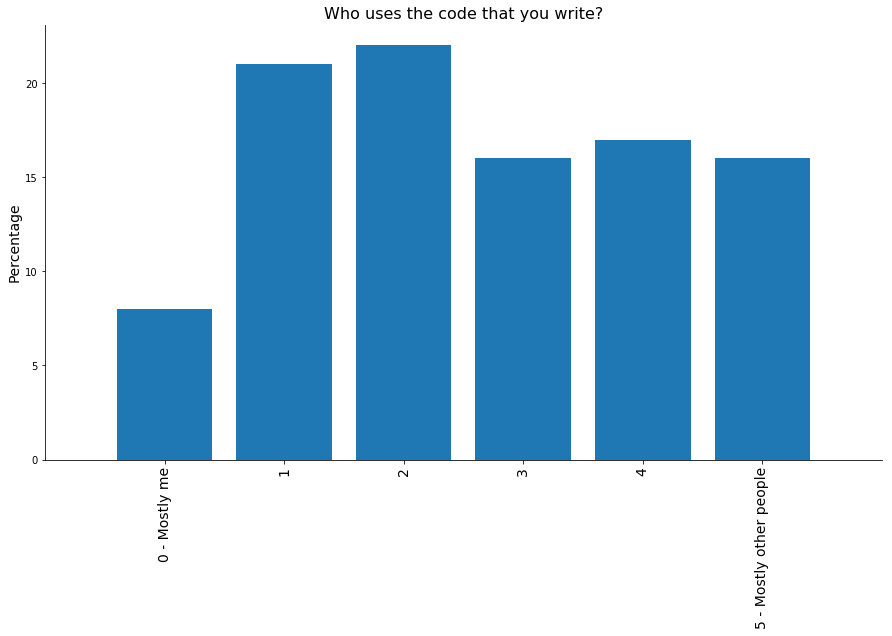

In [50]:
_ = get_plot(perc_to_count, "likert")

### Do you consider yourself a professional software developer?

In [51]:
v_to_count, filename  = get_count(df, ['soft2can. Do you consider yourself a professional software developer?'], "y/n/na", "./../../survey_creation/2017/de/listAnswers/.csv", "False", "./de/output/")

In [52]:
perc_to_count = get_percentage(v_to_count, filename)

In [53]:
display_side_by_side(v_to_count,perc_to_count)

Yes [Count]  No [Count]  \
Do you consider yourself a professional softwar...                            
 Do you consider yourself a professional softwa...          139         186   

                                                   Yes [Percentage]  \
Do you consider yourself a professional softwar...                    
 Do you consider yourself a professional softwa...               43   

                                                   No [Percentage]  
Do you consider yourself a professional softwar...                  
 Do you consider yourself a professional softwa...              57

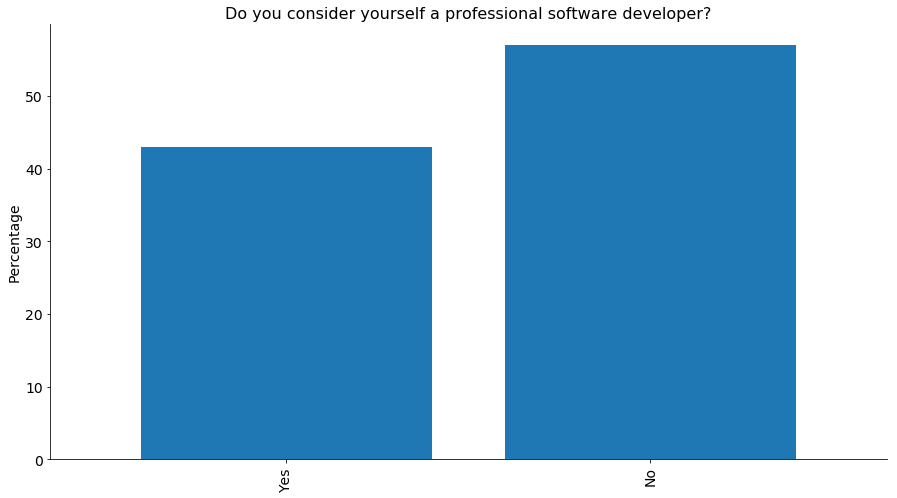

In [54]:
_ = get_plot(perc_to_count, "y/n/na")

### How many years of Software development experience do you have?

In [55]:
v_to_count, filename  = get_count(df, ['soft1can. How many years of Software development experience do you have?'], "freenumeric", "./../../survey_creation/2017/de/listAnswers/.csv", "False", "./de/output/")

       soft1can. How many years of Software development experience do you have?
count                                         325.000000                       
mean                                           10.940000                       
std                                             8.517063                       
min                                             0.000000                       
25%                                             5.000000                       
50%                                             8.000000                       
75%                                            15.000000                       
max                                            41.000000                       


/home/olivier/.data/git/ssi/international-survey/venv/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


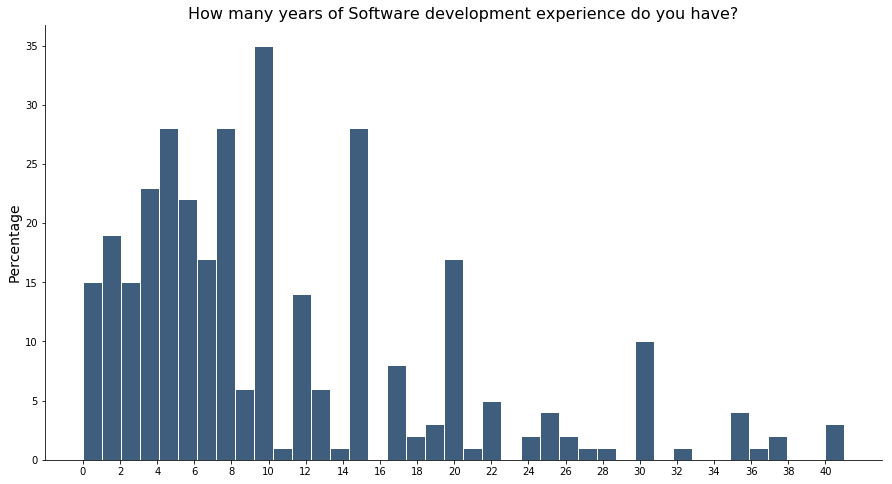

In [56]:
_ = get_plot(v_to_count, "freenumeric")

### In an average month, how much time do you spend on software development (Please rate your answer between 1 to 10. 1 Being none at all and 10 being All your time.)

In [57]:
v_to_count, filename  = get_count(df, ['likert0[time1can]. [In an average month, how much time do you spend on software development]', 'likert0[time2can]. [In an average month, how much time do you spend on Research]', 'likert0[time3can]. [In an average month, how much time do you spend on Management]', 'likert0[time4can]. [In an average month, how much time do you spend on Teaching]', 'likert0[time5can]. [In an average month, how much time do you spend on Other activities]'], "likert", "./../../survey_creation/2017/de/listAnswers/likert_time_10.csv", "False", "./de/output/")

In [58]:
display(v_to_count) 

In an average month, how much time do you spend on software development  \
Spending time                                                                               
﻿1 (None at all)                                                  4                         
2                                                                20                         
3                                                                62                         
4                                                                41                         
5                                                                34                         
6                                                                45                         
7                                                                58                         
8                                                                39                         
9                                                                15                         
10 (All my time)                                                  7                         

                  In an average month, how much time do you spend on Research  \
Spending time                                                                   
﻿1 (None at all)                                                 36             
2                                                                53             
3                                                                58             
4                                                                41             
5                                                                36             
6                                                                26             
7                                                                23             
8                                                                23             
9                                                                16             
10 (All my time)                                                 13             

                  In an average month, how much time do you spend on Management  \
Spending time                                                                     
﻿1 (None at all)                                               54.0               
2                                                             108.0               
3                                                              67.0               
4                                                              30.0               
5                                                              25.0               
6                                                              12.0               
7                                                              11.0               
8                                                              13.0               
9                                                               5.0               
10 (All my time)                                                NaN               

                  In an average month, how much time do you spend on Teaching  \
Spending time                                                                   
﻿1 (None at all)                                              174.0             
2                                                              91.0             
3                                                              30.0             
4                                                              12.0             
5                                                               8.0             
6                                                               2.0             
7                                                               3.0             
8                                                               5.0             
9                                                               NaN             
10 (All my time)                        

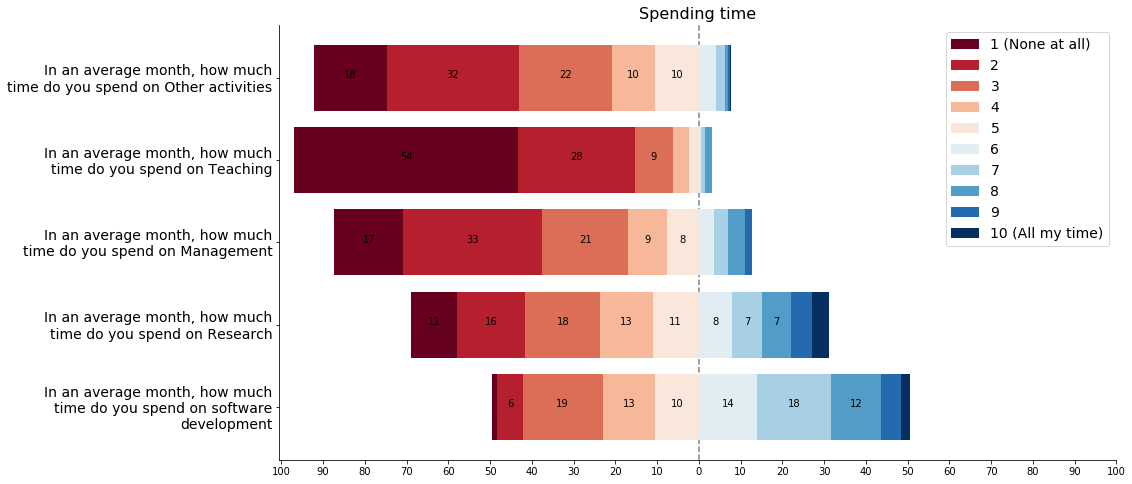

In [59]:
_ = get_plot(v_to_count, "likert")

# Section 3. Questions about employment

30% of RSEs work within a university. However, in Germany they have research centers which are different. In total, these account for 58%, with a majority of RSEs working in the *Helmholtz Association of German Research Centres* and for the *Max Plancks Society* (both accounting for 25% of the total of participants).

At the question about the field where they work, the participants mainly answered *Computer Science*, followed by *Physics and Astronomy* and *Biological Sciences* (both 14%). These is the three main disciplines found in the question about education.


### What type of organisation do you work for?

In [60]:
v_to_count, filename  = get_count(df, ['currentEmp1. What type of organisation do you work for?'], "one choice", "./../../survey_creation/2017/de/listAnswers/type_organisation_de.csv", "False", "./de/output/")

In [61]:
perc_to_count = get_percentage(v_to_count, filename)

In [62]:
display_side_by_side(v_to_count,perc_to_count)

Count Percentage
What type of organisation do you work for?                        
University                                           98         30
Helmholtz Association of German Research Centres     82         25
Max Planck Society                                   80         25
Leibniz Association                                  25          8
Other                                                24          7
Private Company                                       7          2
Government                                            6          2
Fraunhofer Society                                    2          1
University of Applied Sciences                        1          0

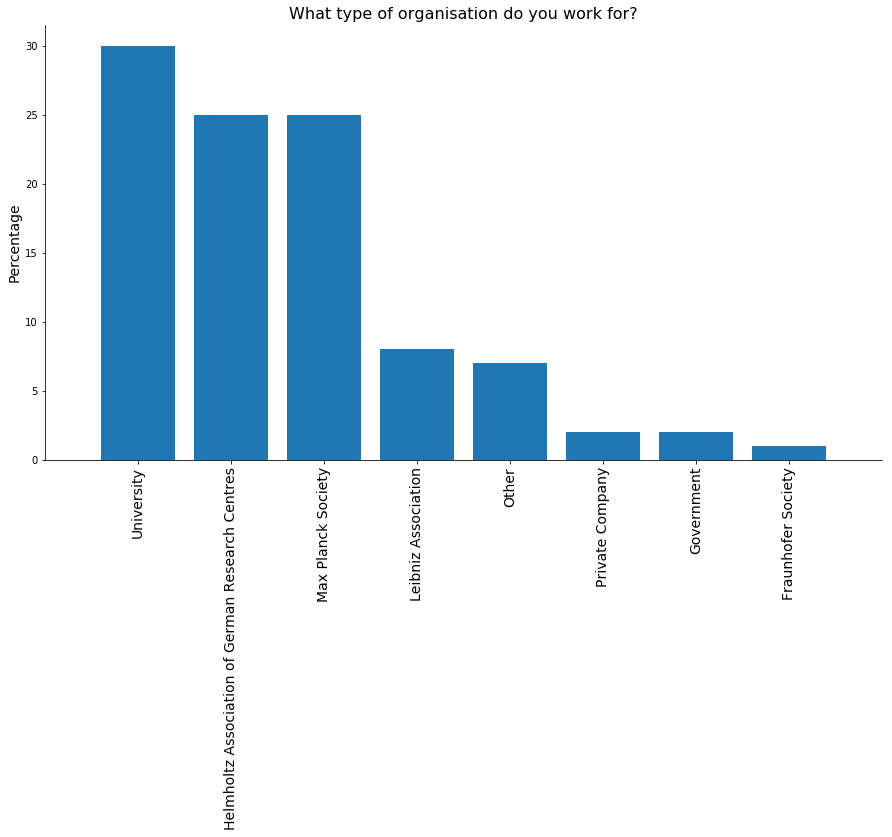

In [63]:
_ = get_plot(perc_to_count, "one choice")

### Which University do you work for?

In [64]:
v_to_count, filename  = get_count(df, ['currentEmp2. Which University do you work for?'], "one choice", "./../../survey_creation/2017/de/listAnswers/universities_de.csv", "False", "./de/output/")

In [65]:
perc_to_count = get_percentage(v_to_count, filename)

In [66]:
display_side_by_side(v_to_count,perc_to_count)

Count Percentage
Which University do you work for?                       
Humboldt University of Berlin               9          9
University of Potsdam                       8          8
University of Würzburg                      8          8
University of Cologne                       6          6
Karlsruhe Institute of Technology           6          6
University of Kiel                          5          5
Free University of Berlin                   5          5
TU Dresden                                  5          5
University of Göttingen                     5          5
Other                                       4          4
Technical University of Berlin              4          4
University of Hamburg                       4          4
University of Münster                       3          3
Goethe University Frankfurt                 3          3
University of Konstanz                      2          2
University of Freiburg                      2          2
Ludwig Maximilian University of Munich      2          2
Leipzig University                          2          2
University of Jena                          2          2
University of Passau                        2          2
University of Bonn                          2          2
University of Oldenburg                     1          1
Technical University of Munich              1          1
University of Koblenz and Landau            1          1
University of Hanover                       1          1
University of Düsseldorf                    1          1
FernUniversität Hagen                       1          1
University of Duisburg-Essen                1          1
University of Kaiserslautern                1          1
Heidelberg University                       1          1
NaN                                       227        NaN

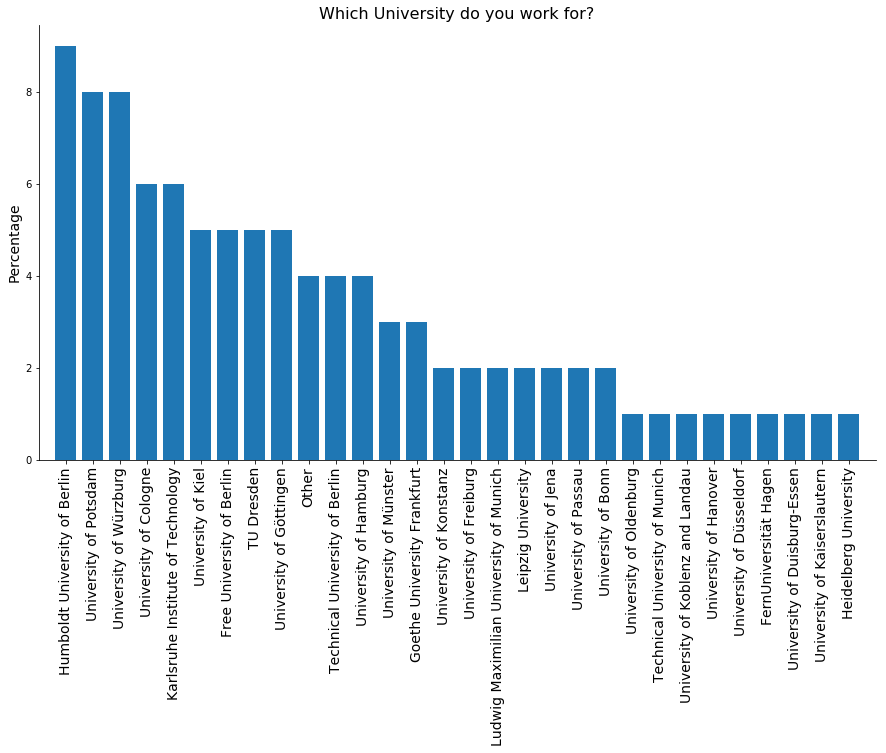

In [67]:
_ = get_plot(perc_to_count, "one choice")

### Which Fraunhofer institute do you work for?

In [68]:
v_to_count, filename  = get_count(df, ['currentEmp20de. Which Fraunhofer institute do you work for?'], "one choice", "./../../survey_creation/2017/de/listAnswers/fraunhofer_de.csv", "False", "./de/output/")

In [69]:
perc_to_count = get_percentage(v_to_count, filename)

In [70]:
display_side_by_side(v_to_count,perc_to_count)

Count Percentage
Which Fraunhofer institute do you work for?                  
Other                                            2        100
NaN                                            323        NaN

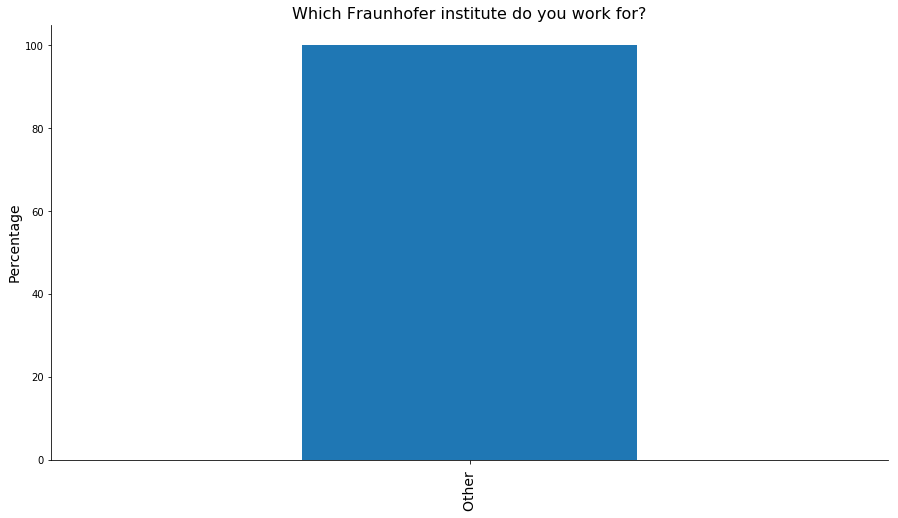

In [71]:
_ = get_plot(perc_to_count, "one choice")

### Which Helmholtz institute do you work for?

In [72]:
v_to_count, filename  = get_count(df, ['currentEmp21de. Which Helmholtz institute do you work for?'], "one choice", "./../../survey_creation/2017/de/listAnswers/hgf_de.csv", "False", "./de/output/")

In [73]:
perc_to_count = get_percentage(v_to_count, filename)

In [74]:
display_side_by_side(v_to_count,perc_to_count)

Count Percentage
Which Helmholtz institute do you work for?                          
Helmholtz Centre Potsdam, GFZ German Research C...     35         43
Helmholtz Centre for Environmental Research             6          7
Karlsruhe Institute of Technology                       6          7
Alfred Wegener Institute for Polar and Marine R...      6          7
German Aerospace Center                                 5          6
Helmholtz-Zentrum Dresden-Rossendorf                    5          6
Helmholtz-Zentrum Geesthacht Centre for Materia...      4          5
German Cancer Research Center                           4          5
GEOMAR Helmholtz Centre for Ocean Research Kiel         4          5
Max Delbrück Center for Molecular Medicine              2          2
Helmholtz-Zentrum Berlin                                2          2
German Center for Neurodegenerative Diseases            1          1
Helmholtz Centre for Infection Research                 1          1
Forschungszentrum Jülich                                1          1
NaN                                                   243        NaN

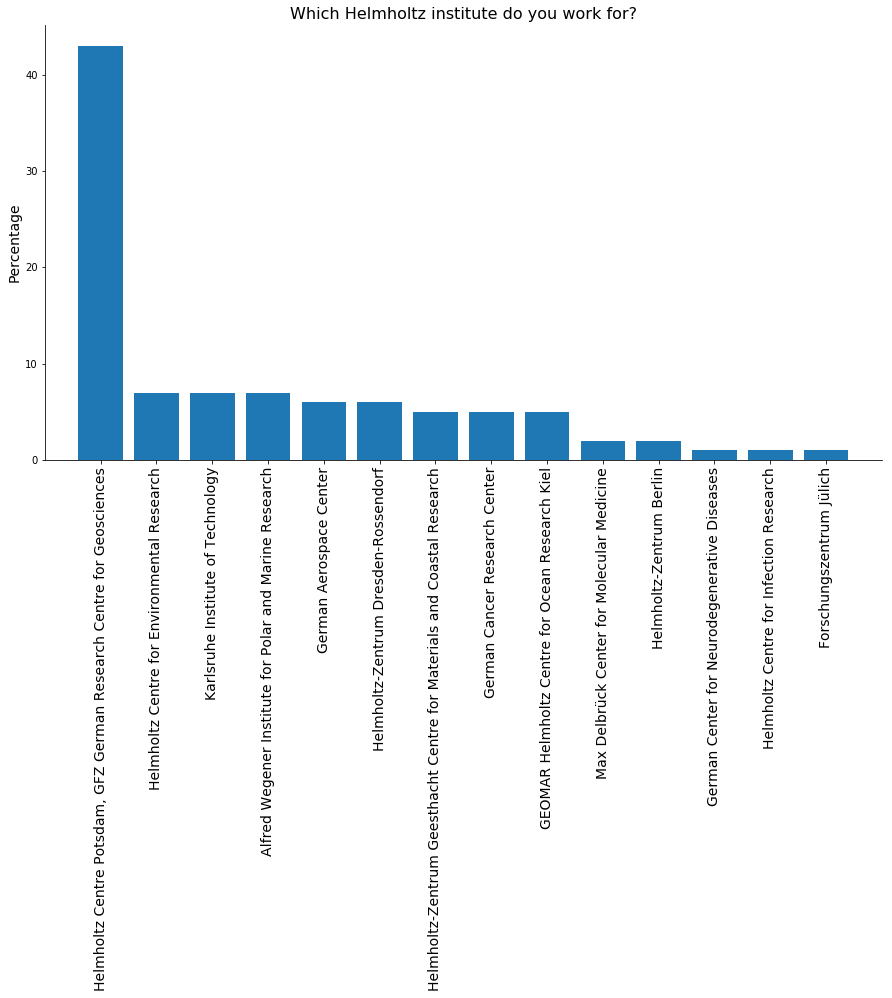

In [75]:
_ = get_plot(perc_to_count, "one choice")

### Which Leibniz institute do you work for?

In [76]:
v_to_count, filename  = get_count(df, ['currentEmp22de. Which Leibniz institute do you work for?'], "one choice", "./../../survey_creation/2017/de/listAnswers/leibniz_de.csv", "False", "./de/output/")

In [77]:
perc_to_count = get_percentage(v_to_count, filename)

In [78]:
display_side_by_side(v_to_count,perc_to_count)

Count Percentage
Which Leibniz institute do you work for?                            
Potsdam Institute for Climate Impact Research           9         36
Leibniz Institute for Astrophysics Potsdam              8         32
IDS – Institute for the German Language                 1          4
Leibniz Institute for Science and Mathematics E...      1          4
Deutsches Institut für Internationale Pädagogis...      1          4
German National Library of Economics                    1          4
Leibniz Institute of Plant Biochemistry                 1          4
Weierstrass Institute                                   1          4
Leibniz-Institut für Molekulare Pharmakologie           1          4
Leibniz Center for Informatics                          1          4
NaN                                                   300        NaN

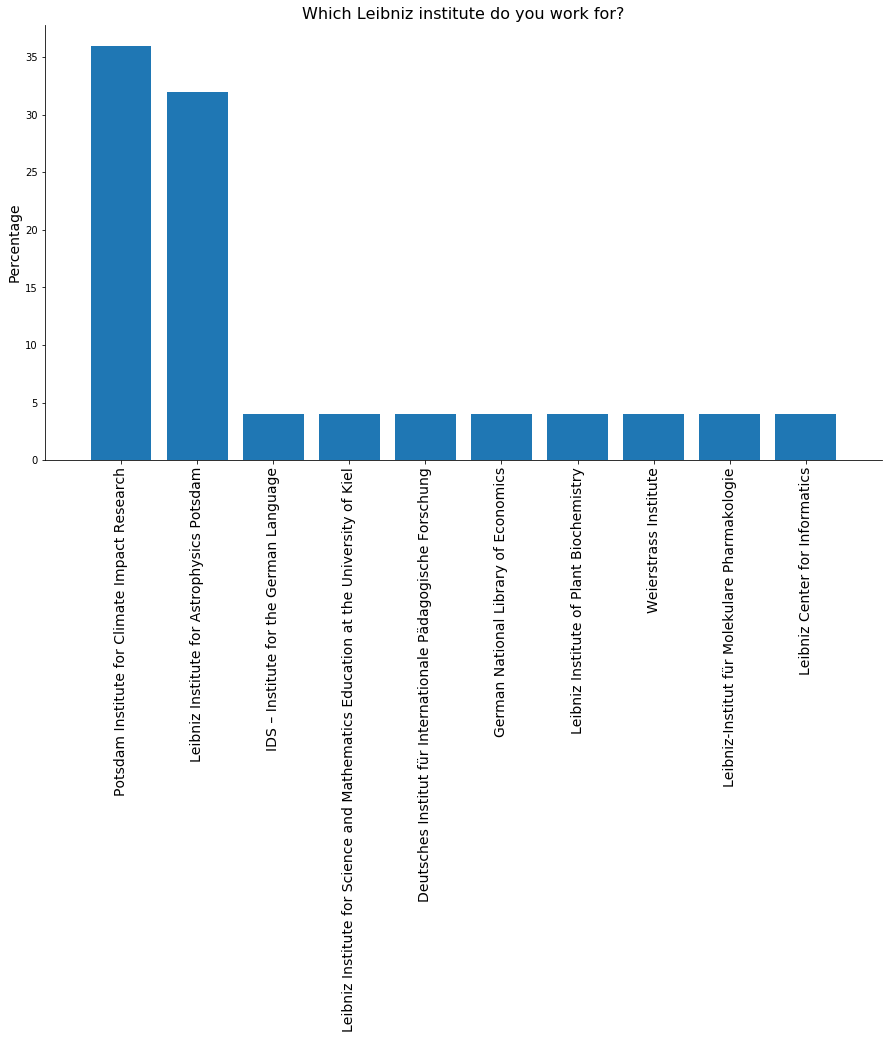

In [79]:
_ = get_plot(perc_to_count, "one choice")

### Which Max-Planck institute do you work for?

In [80]:
v_to_count, filename  = get_count(df, ['currentEmp23de. Which Max-Planck institute do you work for?'], "one choice", "./../../survey_creation/2017/de/listAnswers/mpg_de.csv", "False", "./de/output/")

In [81]:
perc_to_count = get_percentage(v_to_count, filename)

In [82]:
display_side_by_side(v_to_count,perc_to_count)

Count Percentage
Which Max-Planck institute do you work for?                         
Max Planck Institute for Biophysical Chemistry         11         14
Max Planck Institute of Molecular Cell Biology ...     11         14
Max Planck Institute for Gravitational Physics          9         11
Other                                                   7          9
Max Planck Institute for Meteorology                    7          9
Max Planck Institute for Brain Research                 4          5
Max Planck Institute for Physics                        4          5
Max Planck Institute for Dynamics of Complex Te...      3          4
Max Planck Institute for Evolutionary Biology           3          4
Max Planck Institute for Biophysics                     3          4
Max Planck Institute for Colloids and Interfaces        3          4
Max Planck Institute for Intelligent Systems            2          2
Max Planck Institute for Biogeochemistry                2          2
Max Planck Institute for Plant Breeding Research        1          1
Max Planck Institute for European History of Law        1          1
Max Planck Institute for the Science of Human H...      1          1
Max Planck Institute for Cell Biology                   1          1
Max Planck Institute for Metabolism Research            1          1
Max Planck Institute for Biology                        1          1
Max Planck Institute for the History of Science         1          1
Max Planck Institute for Ornithology                    1          1
Max Planck Institute for Medical Research               1          1
Max Planck Institute for Dynamics and Self-Orga...      1          1
Max Planck Institute for Computer Science               1          1
NaN                                                   245        NaN

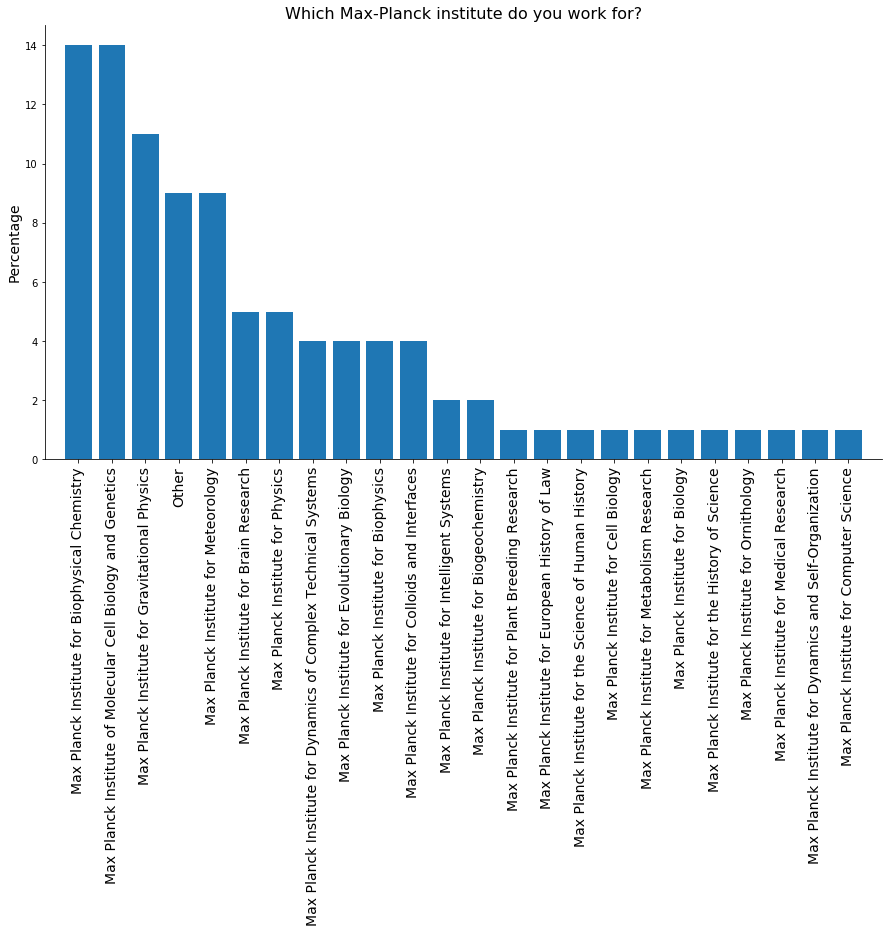

In [83]:
_ = get_plot(perc_to_count, "one choice")

### Which University of Applied Sciences?

In [84]:
v_to_count, filename  = get_count(df, ['currentEmp24de. Which University of Applied Sciences?'], "one choice", "./../../survey_creation/2017/de/listAnswers/fh_de.csv", "False", "./de/output/")

In [85]:
perc_to_count = get_percentage(v_to_count, filename)

In [86]:
display_side_by_side(v_to_count,perc_to_count)

Count Percentage
Which University of Applied Sciences?                   
University of Applied Sciences Dresden      1        100
NaN                                       324        NaN

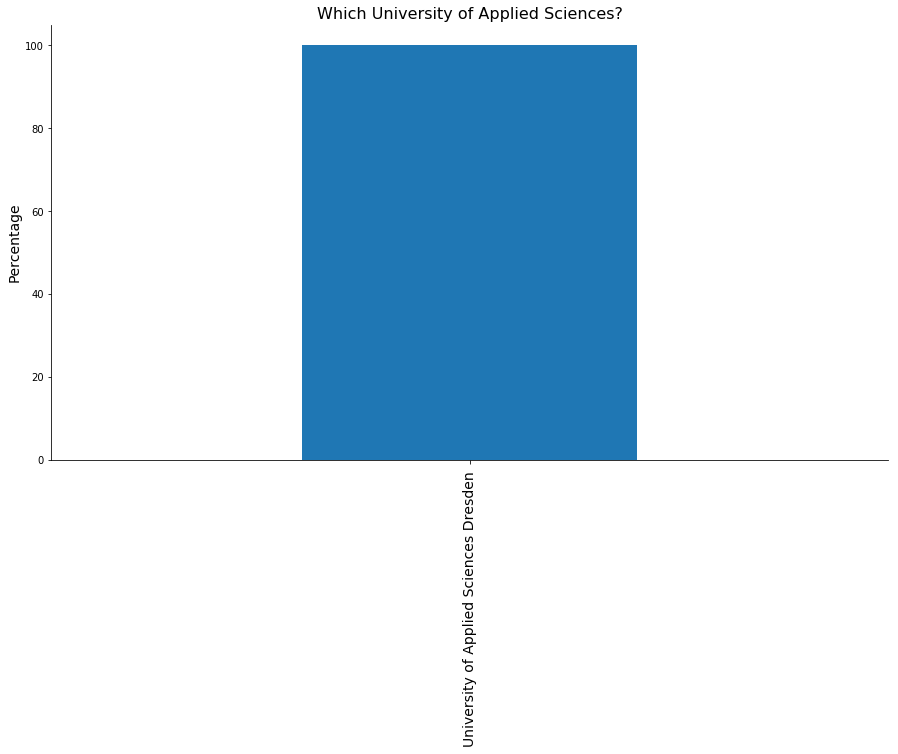

In [87]:
_ = get_plot(perc_to_count, "one choice")

### What is your official job title?

In [88]:
data = df['currentEmp5. What is your official job title?'].dropna()
titles = [z.replace('/', ' ').replace(';', ' ').strip().lower() for z in data]
titles = [ ''.join(i for i in s if not i.isdigit()).strip() for s in titles if len(s) < 50]
print('There are {} propositions'.format(len(titles)))

There are 318 propositions


In [89]:
# Output all the record with more than 1 occurence
results = dict()
for i in data:
    results[str(i.lower())] = results.get(str(i.lower()), 0)+1
results = sorted(results.items(), key=operator.itemgetter(1),reverse=True)
for k in results:
    if len(k[0]) > 3 and k[1] > 1:
        print(k[0].title(), k[1])

Wissenschaftlicher Mitarbeiter 62
Postdoc 17
Doktorand 16
Phd Student 8
Wiss. Mitarbeiter 7
Studentische Hilfskraft 6
Wissenschaftlicher Mitarbeiter  4
Softwareentwickler 4
Professor 4
Wissenschaftlicher Angestellter 4
Wissenschaftliche Mitarbeiterin 4
Scientist 4
Scientific Programmer 3
Postdoctoral Researcher 3
Research Scientist 3
Wissenschaftliche Hilfskraft 3
Hiwi 3
Research Assistant 3
Wissenschaftlicher Programmierer 3
Data Manager 2
Programmierer 2
Akademischer Mitarbeiter 2
Systemadministrator 2
Promotionsstudent 2
Mitarbeiter 2
Postdoctoral Fellow 2
Researcher 2
Senior Scientist 2
Computational Biologist 2
Techniker 2


In [90]:
 wc = wordcloud(df, ['currentEmp5. What is your official job title?'])

(-0.5, 1499.5, 799.5, -0.5)

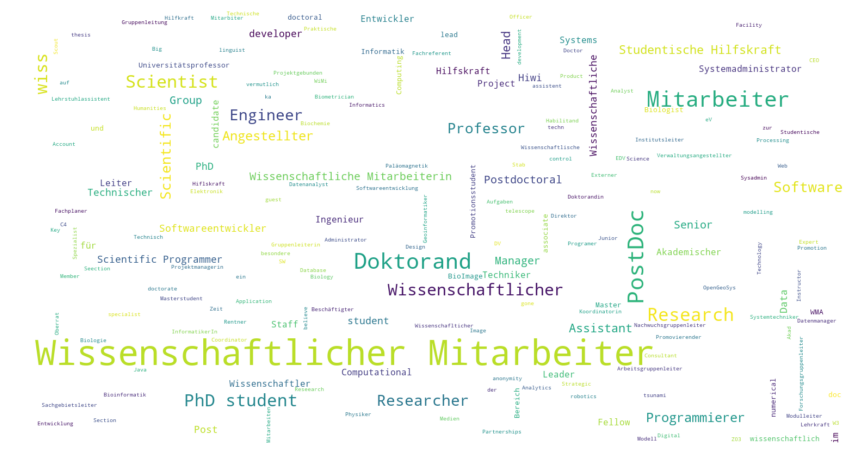

In [91]:
 plt.imshow(wc, interpolation='bilinear')
 plt.axis("off")

### Are you known in your group by a different job title? If so, please enter the job title you use

In [92]:
data = df['currentEmp6. Are you known in your group by a different job title? If so, please enter the job title you use'].dropna()
data = [i.strip() for i in data if len(i.strip()) > 2 and i.strip().lower() not in ['nein']]
print('Number of participants that have a professional qualifications: {}'.format(len(data)))


Number of participants that have a professional qualifications: 66


In [93]:
results = dict()
for i in data:
    results[str(i.lower())] = results.get(str(i.lower()), 0)+1
results = sorted(results.items(), key=operator.itemgetter(1),reverse=True)
for k in results:
    if len(k[0]) > 3:
        print(k[0].title(), k[1])

Postdoc 6
Research Software Engineer 2
Data Scientist 2
Teamleiter 2
Doktorand 2
Phd Student 2
Programmbereichsleiter 1
Softwareentwickler 1
Fachgruppenleiter 1
Chef 1
Product Owner 1
Informationsarchitekt, Datenmanager 1
Projektleiter 1
Volunteer 1
Intern 1
Graduate Research Assistant, Phd Candidate 1
Numerical Scientist 1
Postdoctoral Fellow 1
Techniker 1
Diplomgeophysiker 1
Staff Scientist 1
Mitarbeiter Systemtechnik 1
Scientific Software Engineer 1
Code Monkey 1
It Specialist / Software Engineer 1
It-Systemadministrator 1
Entwickler 1
Netzwerk- Und Security Administrator 1
The Computer Guy / Magician 1
Research Group Leader 1
Linux Admin 1
Ict Systems Administrator 1
Software Workshop Lead 1
Programmer 1
It Expert 1
Direktor 1
Software Developer, Computer Scientist 1
Projektleitung 1
Arbeitsgruppenleiter 1
Modellentwickler 1
Redakteur 1
Doktorandin, Phd Student 1
Chefentwickler 1
Post Doc 1
No, I'M A Scientist. Although Some Colleagues Insist On Calling Me A "Scientific Programmer"

In [94]:
 wc = wordcloud(df, ['currentEmp6. Are you known in your group by a different job title? If so, please enter the job title you use'])

(-0.5, 1499.5, 799.5, -0.5)

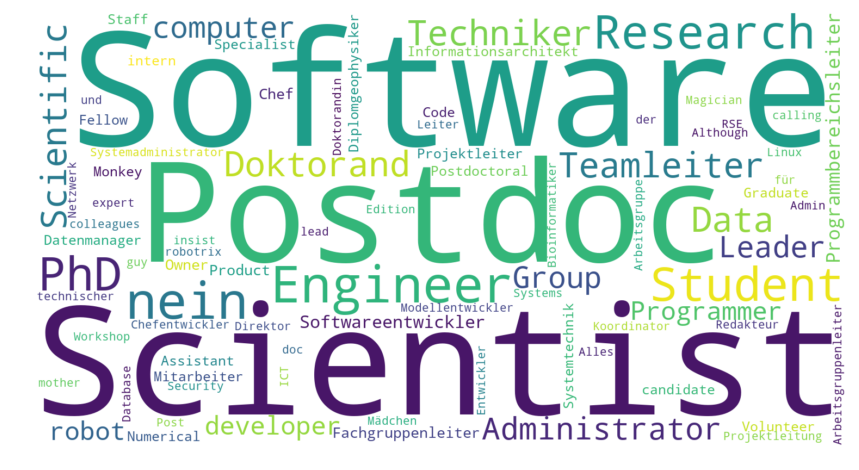

In [95]:
 plt.imshow(wc, interpolation='bilinear')
 plt.axis("off")

### In which disciplines do you work (select as many as apply)

In [96]:
v_to_count, filename  = get_count(df, ['currentEmp13[1]. In which disciplines do you work (select as many as apply) [Accounting & Finance]', 'currentEmp13[2]. In which disciplines do you work (select as many as apply) [Aeronautical & Manufacturing Engineering]', 'currentEmp13[3]. In which disciplines do you work (select as many as apply) [Agriculture & Forestry]', 'currentEmp13[4]. In which disciplines do you work (select as many as apply) [American Studies]', 'currentEmp13[5]. In which disciplines do you work (select as many as apply) [Anatomy & Physiology]', 'currentEmp13[6]. In which disciplines do you work (select as many as apply) [Anthropology]', 'currentEmp13[7]. In which disciplines do you work (select as many as apply) [Architecture]', 'currentEmp13[8]. In which disciplines do you work (select as many as apply) [Art & Design]', 'currentEmp13[9]. In which disciplines do you work (select as many as apply) [Biological Sciences]', 'currentEmp13[10]. In which disciplines do you work (select as many as apply) [Business & Management Studies]', 'currentEmp13[11]. In which disciplines do you work (select as many as apply) [Chemical Engineering]', 'currentEmp13[12]. In which disciplines do you work (select as many as apply) [Chemistry]', 'currentEmp13[13]. In which disciplines do you work (select as many as apply) [Civil Engineering]', 'currentEmp13[14]. In which disciplines do you work (select as many as apply) [Classics & Ancient History]', 'currentEmp13[15]. In which disciplines do you work (select as many as apply) [Communication & Media Studies]', 'currentEmp13[16]. In which disciplines do you work (select as many as apply) [Complementary Medicine]', 'currentEmp13[17]. In which disciplines do you work (select as many as apply) [Computer Science]', 'currentEmp13[18]. In which disciplines do you work (select as many as apply) [Counselling]', 'currentEmp13[19]. In which disciplines do you work (select as many as apply) [Criminology]', 'currentEmp13[20]. In which disciplines do you work (select as many as apply) [Dentistry]', 'currentEmp13[21]. In which disciplines do you work (select as many as apply) [East & South Asian Studies]', 'currentEmp13[22]. In which disciplines do you work (select as many as apply) [Economics]', 'currentEmp13[23]. In which disciplines do you work (select as many as apply) [Education]', 'currentEmp13[24]. In which disciplines do you work (select as many as apply) [Electrical & Electronic Engineering]', 'currentEmp13[25]. In which disciplines do you work (select as many as apply) [English]', 'currentEmp13[26]. In which disciplines do you work (select as many as apply) [Fashion]', 'currentEmp13[27]. In which disciplines do you work (select as many as apply) [Food Science]', 'currentEmp13[28]. In which disciplines do you work (select as many as apply) [French]', 'currentEmp13[29]. In which disciplines do you work (select as many as apply) [Geography & Environmental Sciences]', 'currentEmp13[30]. In which disciplines do you work (select as many as apply) [Geology]', 'currentEmp13[31]. In which disciplines do you work (select as many as apply) [General Engineering]', 'currentEmp13[32]. In which disciplines do you work (select as many as apply) [German]', 'currentEmp13[33]. In which disciplines do you work (select as many as apply) [History]', 'currentEmp13[34]. In which disciplines do you work (select as many as apply) [History of Art, Architecture & Design]', 'currentEmp13[35]. In which disciplines do you work (select as many as apply) [Hospitality, Leisure, Recreation & Tourism]', 'currentEmp13[36]. In which disciplines do you work (select as many as apply) [Iberian Languages/Hispanic Studies]', 'currentEmp13[37]. In which disciplines do you work (select as many as apply) [Land & Property Management]', 'currentEmp13[38]. In which disciplines do you work (select as many as apply) [Law]', 'currentEmp13[39]. In which disciplines do you work (select as many as apply) [Librarianship & Information Management]', 'currentEmp13[40]. In which disciplines do you work (select as many as apply) [Linguistics]', 'currentEmp13[41]. In which disciplines do you work (select as many as apply) [Marketing]', 'currentEmp13[42]. In which disciplines do you work (select as many as apply) [Materials Technology]', 'currentEmp13[43]. In which disciplines do you work (select as many as apply) [Mathematics]', 'currentEmp13[44]. In which disciplines do you work (select as many as apply) [Mechanical Engineering]', 'currentEmp13[45]. In which disciplines do you work (select as many as apply) [Medicine]', 'currentEmp13[46]. In which disciplines do you work (select as many as apply) [Middle Eastern and African Studies]', 'currentEmp13[47]. In which disciplines do you work (select as many as apply) [Music]', 'currentEmp13[48]. In which disciplines do you work (select as many as apply) [Nursing]', 'currentEmp13[49]. In which disciplines do you work (select as many as apply) [Ophthalmics]', 'currentEmp13[50]. In which disciplines do you work (select as many as apply) [Pharmacology & Pharmacy]', 'currentEmp13[51]. In which disciplines do you work (select as many as apply) [Philosophy]', 'currentEmp13[52]. In which disciplines do you work (select as many as apply) [Physics and Astronomy]', 'currentEmp13[53]. In which disciplines do you work (select as many as apply) [Physiotherapy]', 'currentEmp13[54]. In which disciplines do you work (select as many as apply) [Politics]', 'currentEmp13[55]. In which disciplines do you work (select as many as apply) [Psychology]', 'currentEmp13[56]. In which disciplines do you work (select as many as apply) [Robotics]', 'currentEmp13[57]. In which disciplines do you work (select as many as apply) [Russian & East European Languages]', 'currentEmp13[58]. In which disciplines do you work (select as many as apply) [Social Policy]', 'currentEmp13[59]. In which disciplines do you work (select as many as apply) [Social Work]', 'currentEmp13[60]. In which disciplines do you work (select as many as apply) [Sociology]', 'currentEmp13[61]. In which disciplines do you work (select as many as apply) [Sports Science]', 'currentEmp13[62]. In which disciplines do you work (select as many as apply) [Theology & Religious Studies]', 'currentEmp13[63]. In which disciplines do you work (select as many as apply) [Town & Country Planning and Landscape Design]', 'currentEmp13[64]. In which disciplines do you work (select as many as apply) [Veterinary Medicine]', 'currentEmp13[65]. In which disciplines do you work (select as many as apply) [Youth Work]'], "multiple choices", "./../../survey_creation/2017/de/listAnswers/academic_field.csv", "False", "./de/output/")

In [97]:
perc_to_count = get_percentage(v_to_count, filename)

In [98]:
display_side_by_side(v_to_count,perc_to_count)

Count Percentage
In which disciplines do you work (select as man...                  
Computer Science                                      113         18
Physics and Astronomy                                  89         14
Biological Sciences                                    87         14
Geography & Environmental Sciences                     66         10
Mathematics                                            30          5
Geology                                                24          4
Chemistry                                              20          3
Librarianship & Information Management                 18          3
Education                                              17          3
Medicine                                               17          3
Electrical & Electronic Engineering                    12          2
General Engineering                                    10          2
Linguistics                                            10          2
Classics & Ancient History                             10          2
Psychology                                              9          1
Robotics                                                9          1
Economics                                               9          1
History                                                 9          1
Mechanical Engineering                                  7          1
Agriculture & Forestry                                  7          1
Chemical Engineering                                    6          1
Theology & Religious Studies                            5          1
German                                                  5          1
Anatomy & Physiology                                    4          1
Pharmacology & Pharmacy                                 3          0
History of Art, Architecture & Design                   3          0
Aeronautical & Manufacturing Engineering                3          0
Accounting & Finance                                    3          0
Civil Engineering                                       3          0
Communication & Media Studies                           3          0
Law                                                     2          0
Food Science                                            2          0
Business & Management Studies                           2          0
Counselling                                             2          0
Philosophy                                              2          0
Art & Design                                            2          0
Veterinary Medicine                                     2          0
Middle Eastern and African Studies                      1          0
Politics                                                1          0
Architecture                                            1          0
Anthropology                                            1          0
Sports Science                                          1          0
Nursing                                                 1          0
Town & Country Planning and Landscape Design            1          0
French                                                  1          0
Music                                                   1          0
Marketing                                               1          0
Iberian Languages/Hispanic Studies                      1          0
Materials Technology                                    1          0
Complementary Medicine                                  0          0
Social Policy                                           0          0
Fashion                                                 0          0
English                                                 0          0
American Studies                                        0          0
East & South Asian Studies                              0          0
Sociology                                               0          0
Social Work                                       

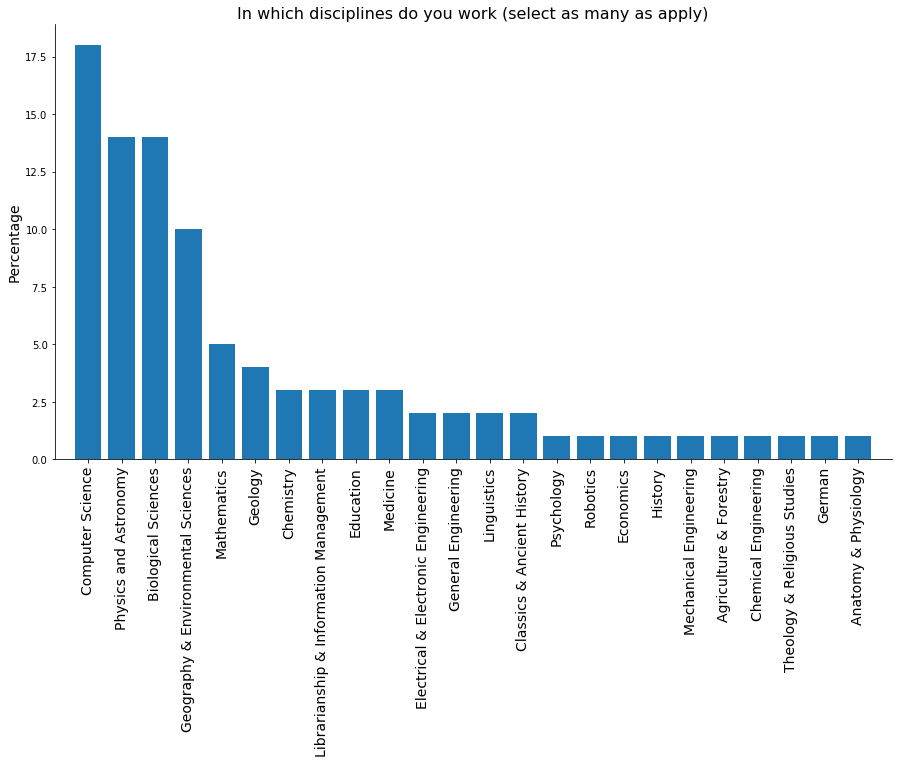

In [99]:
_ = get_plot(perc_to_count, "multiple choices")

# Section 4. Questions about the type of contract


The type of contracts and the fundings are important to understand the situation of RSEs and see if they have stable position in academia.
A vast majority of participants have a full time job (78%) but it is often a fixed term position (34% as long as funding is available and 26% are funded by the Institution core funding). 27% of them do have a permanent position (the other types of contract are marginals). The average length of contract duration is more or less 5 years for the participants that does not have a permanent position.

For the source of funding, 61% of the participants know the origin of them. Almost the half of the projects for which the participants work are funded by Federal and state governments (42%), the German Research Foundation (DFG) (34%), and by the European Union 10%. 5% of the participants claims they volunteer their time for working on the largest project.

A question also asked about the funding about their effort as an RSE/equivalent. The top four funders remains the same. The Federal and state governments funds is funding 38% of the participants, the German Research Foundation 31% and the European Union 13% and 8% of the participants volunteer their time.

The last question about the funding was about the previous project. This helps to see if the funders changed over the time for the participants. The answer is no, the three mains funders were exactly the same with only a slight variation in percentages, the Federal and state governments funded the project of 43% of the participants, while the German Research Foundation accounted for 31% and European Union for 11%.

It is important to note that these percentages are not mutually exclusives as the participants had the option to choose several sources of funding for each question.


### Do you work full time or part time

In [100]:
v_to_count, filename  = get_count(df, ['currentEmp12. Do you work full time or part time'], "one choice", "./../../survey_creation/2017/de/listAnswers/type_hours.csv", "False", "./de/output/")

In [101]:
perc_to_count = get_percentage(v_to_count, filename)

In [102]:
display_side_by_side(v_to_count,perc_to_count)

Count Percentage
Do you work full time or part time                  
Full Time                             255         78
Part-time                              70         22

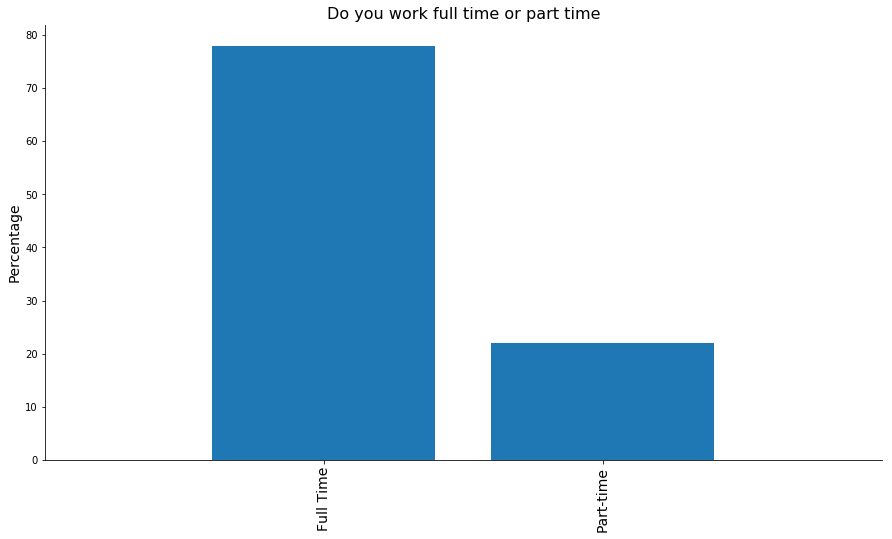

In [103]:
_ = get_plot(perc_to_count, "one choice")

### What type of contract are you employed on?

In [104]:
v_to_count, filename  = get_count(df, ['currentEmp10. What type of contract are you employed on?'], "one choice", "./../../survey_creation/2017/de/listAnswers/type_contract_de.csv", "False", "./de/output/")

In [105]:
perc_to_count = get_percentage(v_to_count, filename)

In [106]:
display_side_by_side(v_to_count,perc_to_count)

Count Percentage
What type of contract are you employed on?                        
Fixed term -- as long as funding is available       110         34
Permanent -- funded by Institution core funding      88         27
Fixed term -- funded by Institution core funding     83         26
Research/Student Assistant                           19          6
Other                                                15          5
Permanent -- as long as funding is available          5          2
Freelancer consultant contractor                      3          1
Zero hours contract                                   1          0
Agency staff                                          1          0

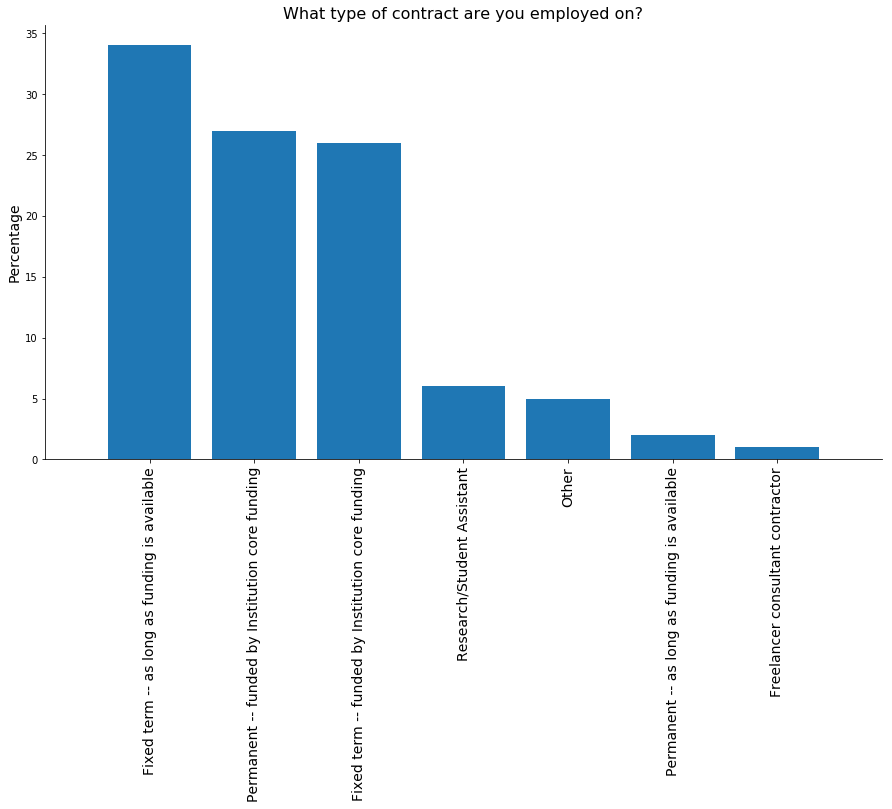

In [107]:
_ = get_plot(perc_to_count, "one choice")

### What is the duration (in years) of your current contract?

In [108]:
# Cleaning some outliers
duration_contract = df['currentEmp11. What is the duration (in years) of your current contract?'][(df['currentEmp11. What is the duration (in years) of your current contract?'] > -1) & (df['currentEmp11. What is the duration (in years) of your current contract?'] < 70)].to_frame()

In [109]:
v_to_count, filename  = get_count(duration_contract, ['currentEmp11. What is the duration (in years) of your current contract?'], "freenumeric", "./../../survey_creation/2017/de/listAnswers/.csv", "False", "./de/output/")

       currentEmp11. What is the duration (in years) of your current contract?
count                                         297.000000                      
mean                                            5.570818                      
std                                             8.632102                      
min                                             0.000000                      
25%                                             1.000000                      
50%                                             3.000000                      
75%                                             4.000000                      
max                                            50.000000                      


/home/olivier/.data/git/ssi/international-survey/venv/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


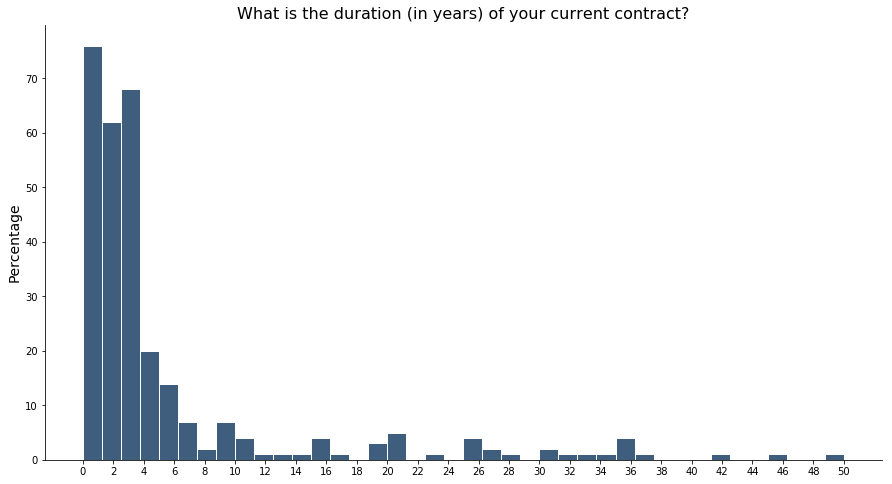

In [110]:
_ = get_plot(v_to_count, "freenumeric")

### Do you know the source of the funding used to support you and your current, largest project?

In [111]:
v_to_count, filename  = get_count(df, ['fund1. Do you know the source of the funding used to support you and your current, largest project?'], "y/n/na", "./../../survey_creation/2017/de/listAnswers/.csv", "False", "./de/output/")

In [112]:
perc_to_count = get_percentage(v_to_count, filename)

In [113]:
display_side_by_side(v_to_count,perc_to_count)

Yes [Count]  No [Count]  \
Do you know the source of the funding used to s...                            
 Do you know the source of the funding used to ...          183         116   

                                                    NaN value  \
Do you know the source of the funding used to s...              
 Do you know the source of the funding used to ...         26   

                                                   Yes [Percentage]  \
Do you know the source of the funding used to s...                    
 Do you know the source of the funding used to ...               61   

                                                   No [Percentage]  
Do you know the source of the funding used to s...                  
 Do you know the source of the funding used to ...              39

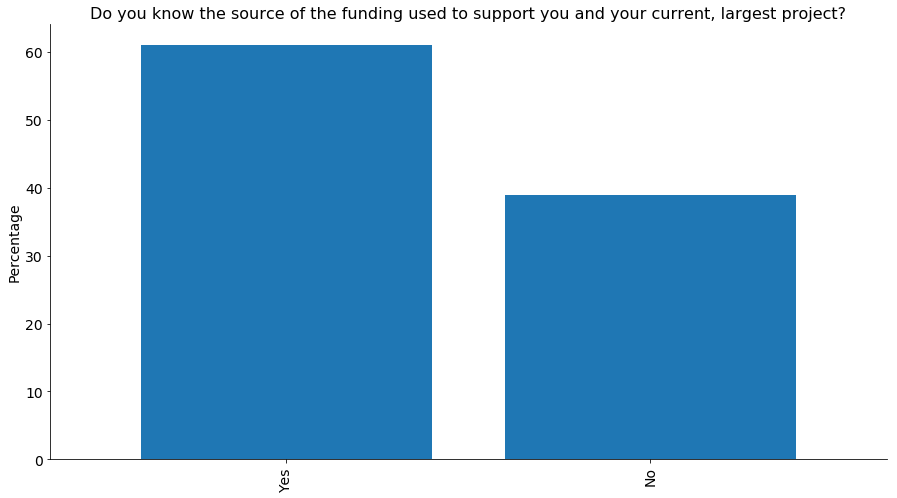

In [114]:
_ = get_plot(perc_to_count, "y/n/na")

### Which of the following sources are used to pay for your effort as an RSE/equivalent?

In [115]:
v_to_count, filename  = get_count(df, ['fund2[1]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [European Union (e.g. H2020, COST, EUREKA)]', 'fund2[2]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Federal and state governments (BMBF, BMWi, BMVg and other sections)]', 'fund2[3]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [DFG, German Research Foundation]', 'fund2[4]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Foundations and conveyors (public and private, e.g. VolkswagenStiftung, Robert Bosch Stiftung, Klaus Tschira Stiftung, Stiftung Mercator)]', 'fund2[5]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Stifterverband]', 'fund2[6]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Associations and chambers]', 'fund2[7]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Membership]', 'fund2[8]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Crowdfunding (one-time)]', 'fund2[9]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Crowdfunding (recurring)]', 'fund2[10]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Industry support]', 'fund2[11]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Consulting & services]', 'fund2[12]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Venture capital]', 'fund2[13]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Dual license]', 'fund2[14]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Open core]', 'fund2[15]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Trademark licensing & franchising]', 'fund2[16]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [I volunteer my time]'], "multiple choices", "./../../survey_creation/2017/de/listAnswers/funding_de.csv", "False", "./de/output/")

In [116]:
perc_to_count = get_percentage(v_to_count, filename)

In [117]:
display_side_by_side(v_to_count,perc_to_count)

Count Percentage
Which of the following sources are used to pay ...                  
Federal and state governments (BMBF, BMWi, BMVg...    110         38
DFG, German Research Foundation                        89         31
European Union (e.g. H2020, COST, EUREKA)              38         13
I volunteer my time                                    21          7
Foundations and conveyors (public and private, ...     13          4
Industry support                                        7          2
Consulting & services                                   4          1
Membership                                              3          1
Stifterverband                                          1          0
Associations and chambers                               1          0
Venture capital                                         1          0
Dual license                                            1          0
Crowdfunding (one-time)                                 0          0
Crowdfunding (recurring)                                0          0
Open core                                               0          0
Trademark licensing & franchising                       0          0

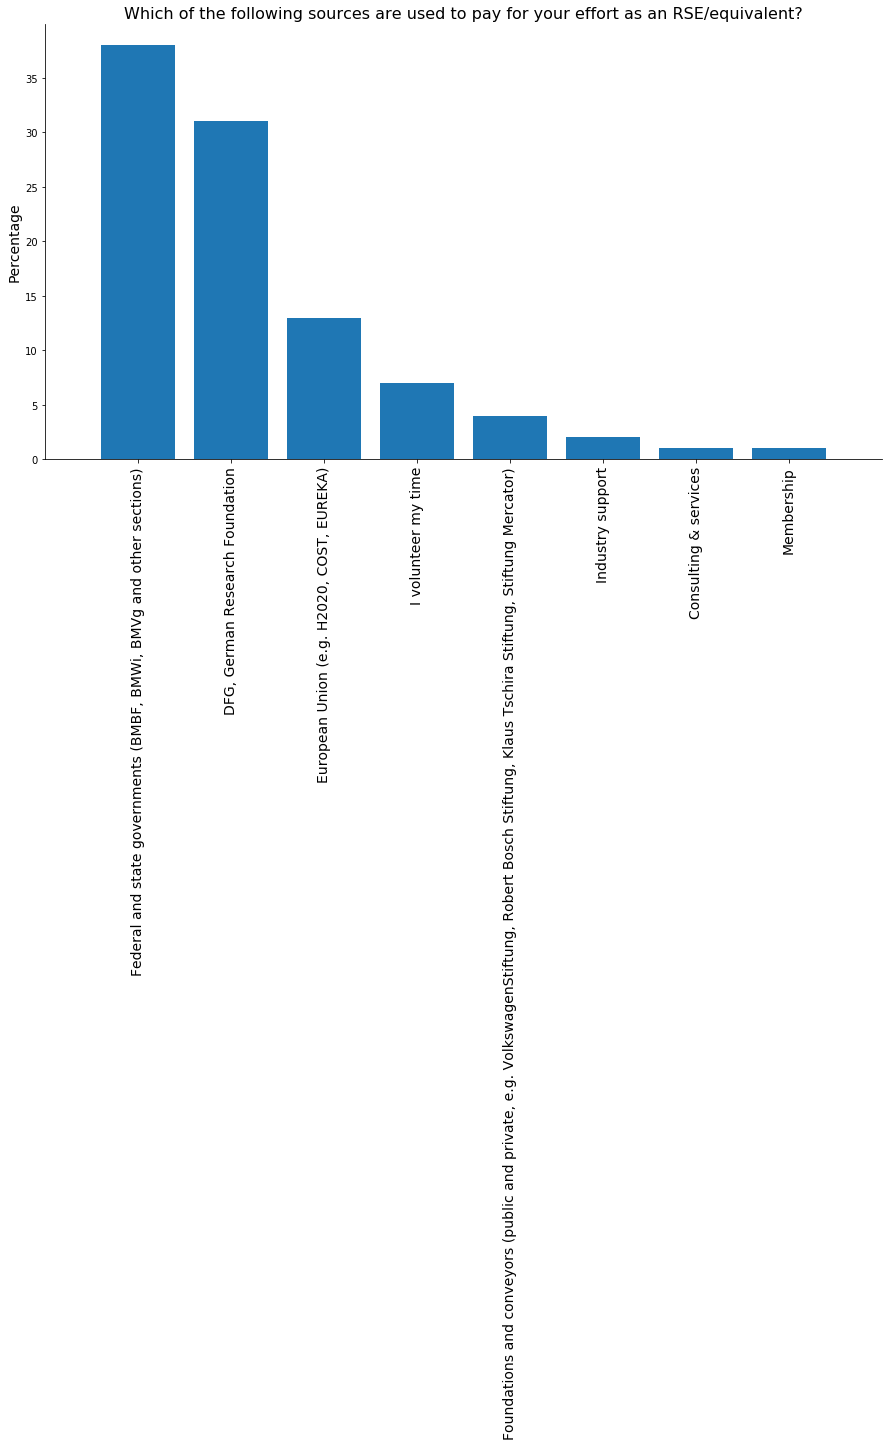

In [118]:
_ = get_plot(perc_to_count, "multiple choices")

### Which of the following sources are used to fund your current, largest project?

In [119]:
v_to_count, filename  = get_count(df, ['fund3[1]. Which of the following sources are used to fund your current, largest project? [European Union (e.g. H2020, COST, EUREKA)]', 'fund3[2]. Which of the following sources are used to fund your current, largest project? [Federal and state governments (BMBF, BMWi, BMVg and other sections)]', 'fund3[3]. Which of the following sources are used to fund your current, largest project? [DFG, German Research Foundation]', 'fund3[4]. Which of the following sources are used to fund your current, largest project? [Foundations and conveyors (public and private, e.g. VolkswagenStiftung, Robert Bosch Stiftung, Klaus Tschira Stiftung, Stiftung Mercator)]', 'fund3[5]. Which of the following sources are used to fund your current, largest project? [Stifterverband]', 'fund3[6]. Which of the following sources are used to fund your current, largest project? [Associations and chambers]', 'fund3[7]. Which of the following sources are used to fund your current, largest project? [Membership]', 'fund3[8]. Which of the following sources are used to fund your current, largest project? [Crowdfunding (one-time)]', 'fund3[9]. Which of the following sources are used to fund your current, largest project? [Crowdfunding (recurring)]', 'fund3[10]. Which of the following sources are used to fund your current, largest project? [Industry support]', 'fund3[11]. Which of the following sources are used to fund your current, largest project? [Consulting & services]', 'fund3[12]. Which of the following sources are used to fund your current, largest project? [Venture capital]', 'fund3[13]. Which of the following sources are used to fund your current, largest project? [Dual license]', 'fund3[14]. Which of the following sources are used to fund your current, largest project? [Open core]', 'fund3[15]. Which of the following sources are used to fund your current, largest project? [Trademark licensing & franchising]', 'fund3[16]. Which of the following sources are used to fund your current, largest project? [I volunteer my time]'], "multiple choices", "./../../survey_creation/2017/de/listAnswers/funding_de.csv", "False", "./de/output/")

In [120]:
perc_to_count = get_percentage(v_to_count, filename)

In [121]:
display_side_by_side(v_to_count,perc_to_count)

Count Percentage
Which of the following sources are used to fund...                  
Federal and state governments (BMBF, BMWi, BMVg...     93         42
DFG, German Research Foundation                        75         34
European Union (e.g. H2020, COST, EUREKA)              23         11
I volunteer my time                                    12          5
Foundations and conveyors (public and private, ...      9          4
Industry support                                        3          1
Stifterverband                                          1          0
Associations and chambers                               1          0
Membership                                              1          0
Consulting & services                                   1          0
Crowdfunding (one-time)                                 0          0
Crowdfunding (recurring)                                0          0
Venture capital                                         0          0
Dual license                                            0          0
Open core                                               0          0
Trademark licensing & franchising                       0          0

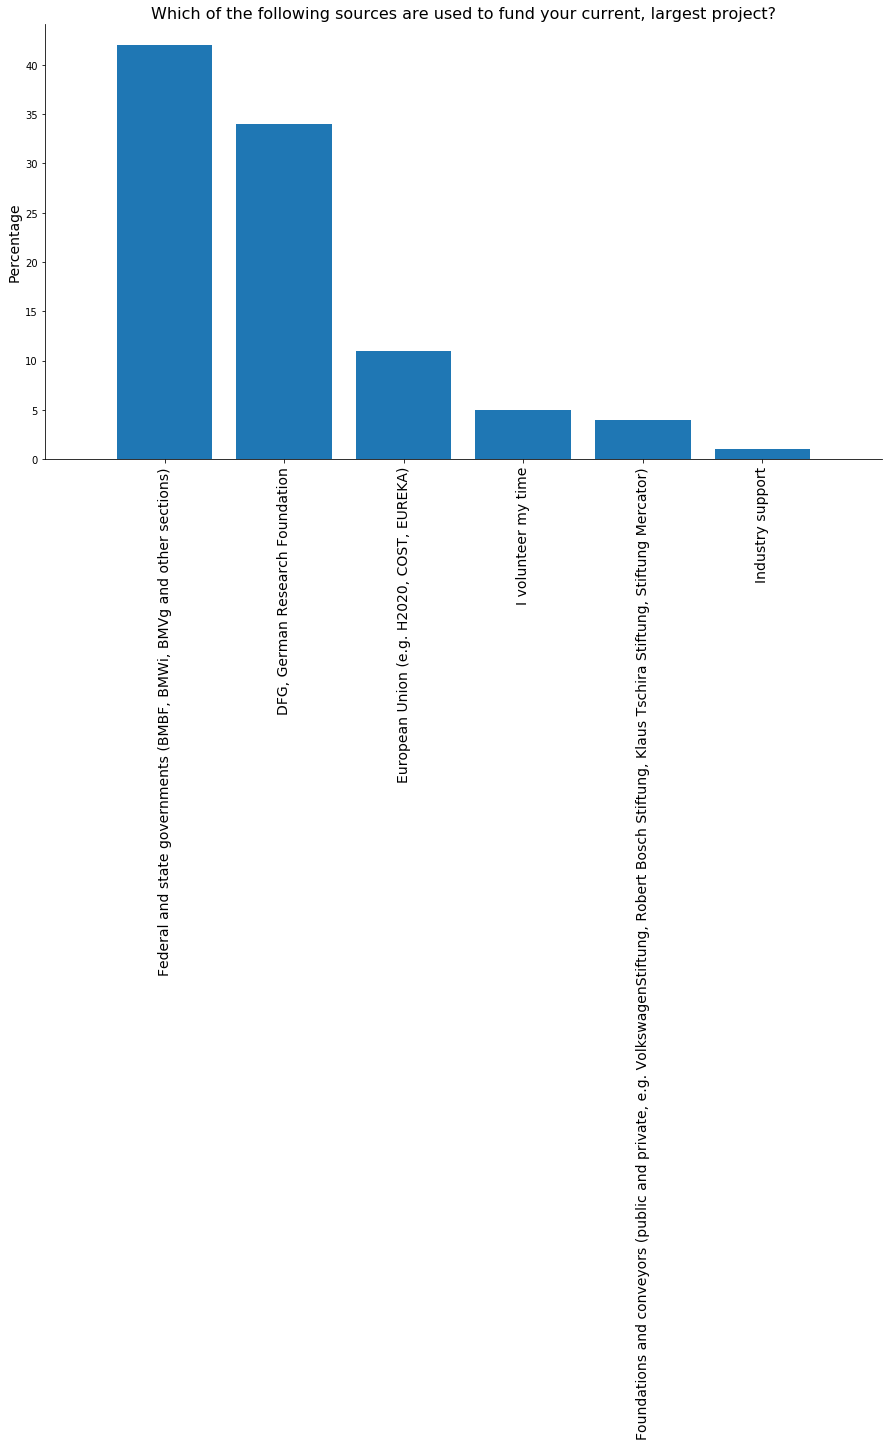

In [122]:
_ = get_plot(perc_to_count, "multiple choices")

### Which of the following sources were used to fund your current, largest project three years ago?

In [123]:
v_to_count, filename  = get_count(df, ['fund4[1]. Which of the following sources were used to fund your current, largest project three years ago? [European Union (e.g. H2020, COST, EUREKA)]', 'fund4[2]. Which of the following sources were used to fund your current, largest project three years ago? [Federal and state governments (BMBF, BMWi, BMVg and other sections)]', 'fund4[3]. Which of the following sources were used to fund your current, largest project three years ago? [DFG, German Research Foundation]', 'fund4[4]. Which of the following sources were used to fund your current, largest project three years ago? [Foundations and conveyors (public and private, e.g. VolkswagenStiftung, Robert Bosch Stiftung, Klaus Tschira Stiftung, Stiftung Mercator)]', 'fund4[5]. Which of the following sources were used to fund your current, largest project three years ago? [Stifterverband]', 'fund4[6]. Which of the following sources were used to fund your current, largest project three years ago? [Associations and chambers]', 'fund4[7]. Which of the following sources were used to fund your current, largest project three years ago? [Membership]', 'fund4[8]. Which of the following sources were used to fund your current, largest project three years ago? [Crowdfunding (one-time)]', 'fund4[9]. Which of the following sources were used to fund your current, largest project three years ago? [Crowdfunding (recurring)]', 'fund4[10]. Which of the following sources were used to fund your current, largest project three years ago? [Industry support]', 'fund4[11]. Which of the following sources were used to fund your current, largest project three years ago? [Consulting & services]', 'fund4[12]. Which of the following sources were used to fund your current, largest project three years ago? [Venture capital]', 'fund4[13]. Which of the following sources were used to fund your current, largest project three years ago? [Dual license]', 'fund4[14]. Which of the following sources were used to fund your current, largest project three years ago? [Open core]', 'fund4[15]. Which of the following sources were used to fund your current, largest project three years ago? [Trademark licensing & franchising]', 'fund4[16]. Which of the following sources were used to fund your current, largest project three years ago? [I volunteer my time]'], "multiple choices", "./../../survey_creation/2017/de/listAnswers/funding_de.csv", "False", "./de/output/")

In [124]:
perc_to_count = get_percentage(v_to_count, filename)

In [125]:
display_side_by_side(v_to_count,perc_to_count)

Count Percentage
Which of the following sources were used to fun...                  
Federal and state governments (BMBF, BMWi, BMVg...     87         43
DFG, German Research Foundation                        63         31
European Union (e.g. H2020, COST, EUREKA)              23         11
I volunteer my time                                    16          8
Foundations and conveyors (public and private, ...      6          3
Industry support                                        5          2
Associations and chambers                               2          1
Stifterverband                                          1          0
Open core                                               1          0
Membership                                              0          0
Crowdfunding (one-time)                                 0          0
Crowdfunding (recurring)                                0          0
Consulting & services                                   0          0
Venture capital                                         0          0
Dual license                                            0          0
Trademark licensing & franchising                       0          0

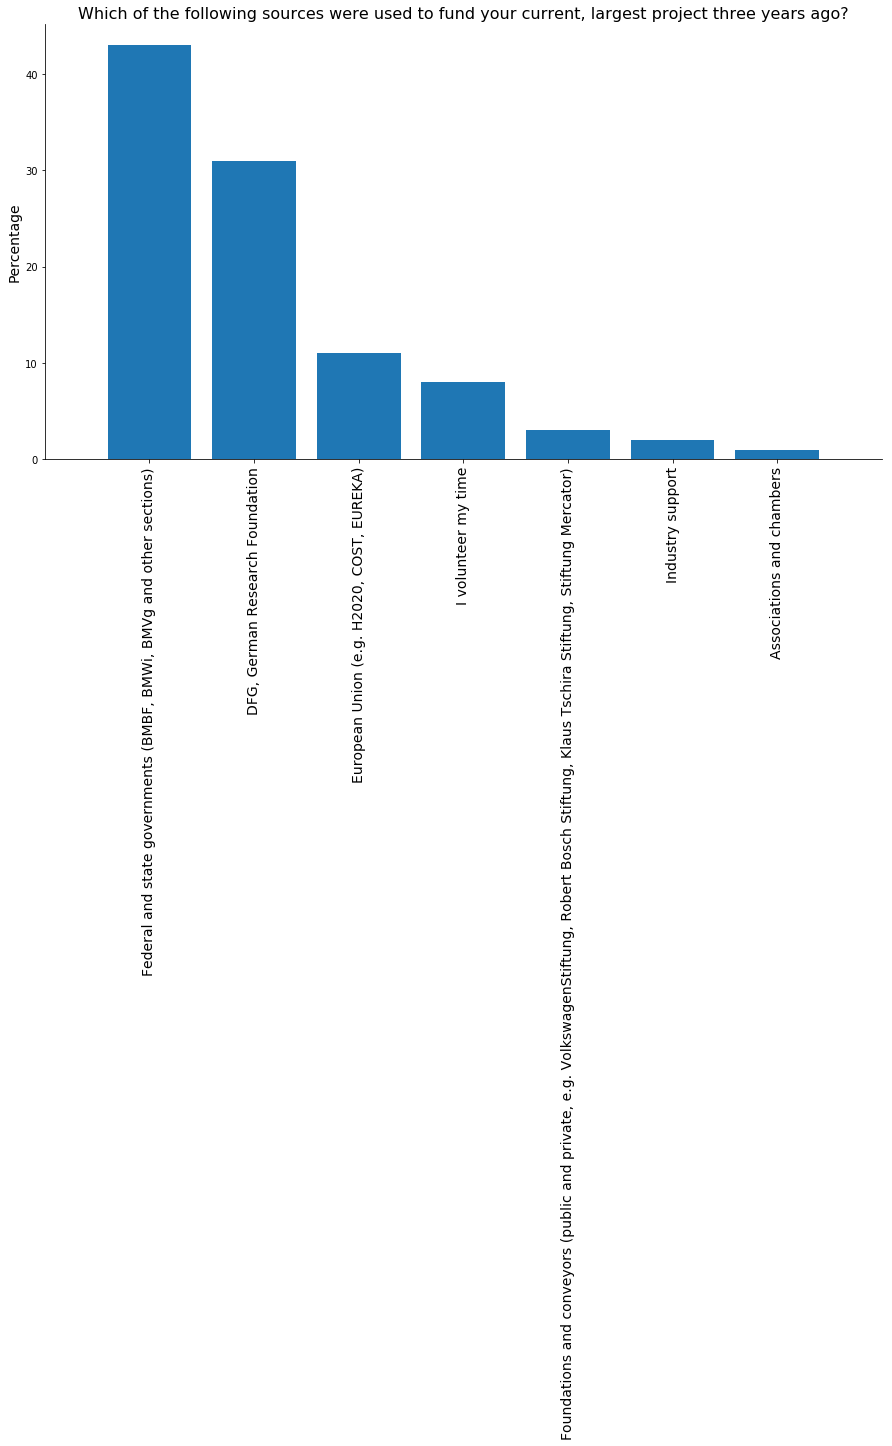

In [126]:
_ = get_plot(perc_to_count, "multiple choices")

# Section 5. Questions about previous employment
Several questions were about the participants previous job. The idea is to collect insights of their career path and understand what are their motivations to be an RSE.

More than a half of the participants worked in a university prior to their current position (54%). The others come from Max Planck Society (11%) or Other (10%).
At least 10% shift career and moved from the private sector to academy.

We asked the participants to rank the reasons why they chose their actual position among 8 different ones:
* Desire to work in a research environment
* Freedom to choose own working practices
* Desire to advance research
* I want to learn new skills
* Opportunity to develop software
* Flexible working hours
* Ability to work across disciplines
* Opportunity for career advancement
* The salary

It appears that the *Desire to work in a research environment*, the *Freedom to choose own working practices* and the *Desire to advance research* are more often ranked as the first reasons than any other ones. On the contraries, the *Opportunity for career advancement* and *the salary* are the least common reasons for choosing a position as RSE.

### Where was your previous job based?

In [127]:
v_to_count, filename  = get_count(df, ['prevEmp1. Where was your previous job based?'], "one choice", "./../../survey_creation/2017/de/listAnswers/type_organisation_de.csv", "False", "./de/output/")

In [128]:
perc_to_count = get_percentage(v_to_count, filename)

In [129]:
display_side_by_side(v_to_count,perc_to_count)

Count Percentage
Where was your previous job based?                                
University                                          171         54
Max Planck Society                                   35         11
Other                                                33         10
Private Company                                      33         10
Helmholtz Association of German Research Centres     22          7
Leibniz Association                                  12          4
Government                                            7          2
University of Applied Sciences                        3          1
NaN                                                   9        NaN

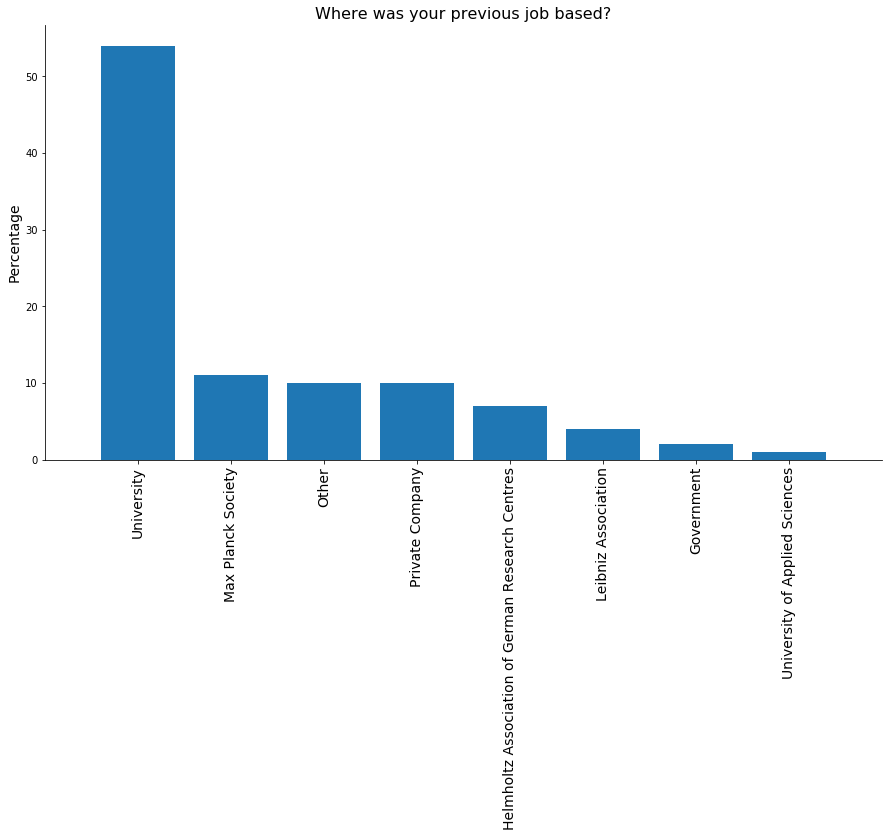

In [130]:
_ = get_plot(perc_to_count, "one choice")

### Rank the following factors dependent on how strongly they influenced your decision to accept your current position

In [131]:
v_to_count, filename  = get_count(df, ['prevEmp2[1]. Rank the following factors dependent on how strongly they influenced your decision to accept your current position [Rank 1]', 'prevEmp2[2]. Rank the following factors dependent on how strongly they influenced your decision to accept your current position [Rank 2]', 'prevEmp2[3]. Rank the following factors dependent on how strongly they influenced your decision to accept your current position [Rank 3]', 'prevEmp2[4]. Rank the following factors dependent on how strongly they influenced your decision to accept your current position [Rank 4]', 'prevEmp2[5]. Rank the following factors dependent on how strongly they influenced your decision to accept your current position [Rank 5]'], "ranking", "./../../survey_creation/2017/de/listAnswers/decision_job.csv", "False", "./de/output/")

In [132]:
perc_to_count = get_percentage(v_to_count, filename)

In [133]:
display_side_by_side(v_to_count,perc_to_count)

Rank 1 [Count]  Rank 2 [Count]  \
Reasons to choose this job                                                 
Desire to work in a research environment              80              47   
Freedom to choose own working practices               78              54   
Desire to advance research                            49              40   
I want to learn new skills                            29              50   
Opportunity to develop software                       21              34   
Flexible working hours                                19              28   
Ability to work across disciplines                    17              36   
Opportunity for career advancement                    17              20   
The salary                                             6               6   
NaN                                                    9              10   

                                          Rank 3 [Count]  Rank 4 [Count]  \
Reasons to choose this job                                                 
Desire to work in a research environment              40              27   
Freedom to choose own working practices               42              30   
Desire to advance research                            26              32   
I want to learn new skills                            62              58   
Opportunity to develop software                       26              39   
Flexible working hours                                44              38   
Ability to work across disciplines                    47              45   
Opportunity for career advancement                    16              24   
The salary                                            12              21   
NaN                                                   10              11   

                                          Rank 5 [Count] Rank 1 [Percentage]  \
Reasons to choose this job                                                     
Desire to work in a research environment              26                  36   
Freedom to choose own working practices               32                  33   
Desire to advance research                            20                  29   
I want to learn new skills                            46                  12   
Opportunity to develop software                       34                  14   
Flexible working hours                                51                  11   
Ability to work across disciplines                    49                   9   
Opportunity for career advancement                    23                  17   
The salary                                            33                   8   
NaN                                                   11                 NaN   

                                         Rank 2 [Percentage]  \
Reasons to choose this job                                     
Desire to work in a research environment                  21   
Freedom to choose own working practices                   23   
Desire to advance research                                24   
I want to learn new skills                                20   
Opportunity to develop software                           22   
Flexible working hours                                    16   
Ability to work across disciplines                        19   
Opportunity for career advancement                        20   
The salary                                                 8   
NaN                                                      NaN   

                                         Rank 3 [Percentage]  \
Reasons to choose this job                                     
Desire to work in a research environment                  18   
Freedom to choose own working practices                   18   
Desire to advance research                                16   
I want to learn new skills                                25   
Opportunity to develop software                           17   
Flexible working hours                

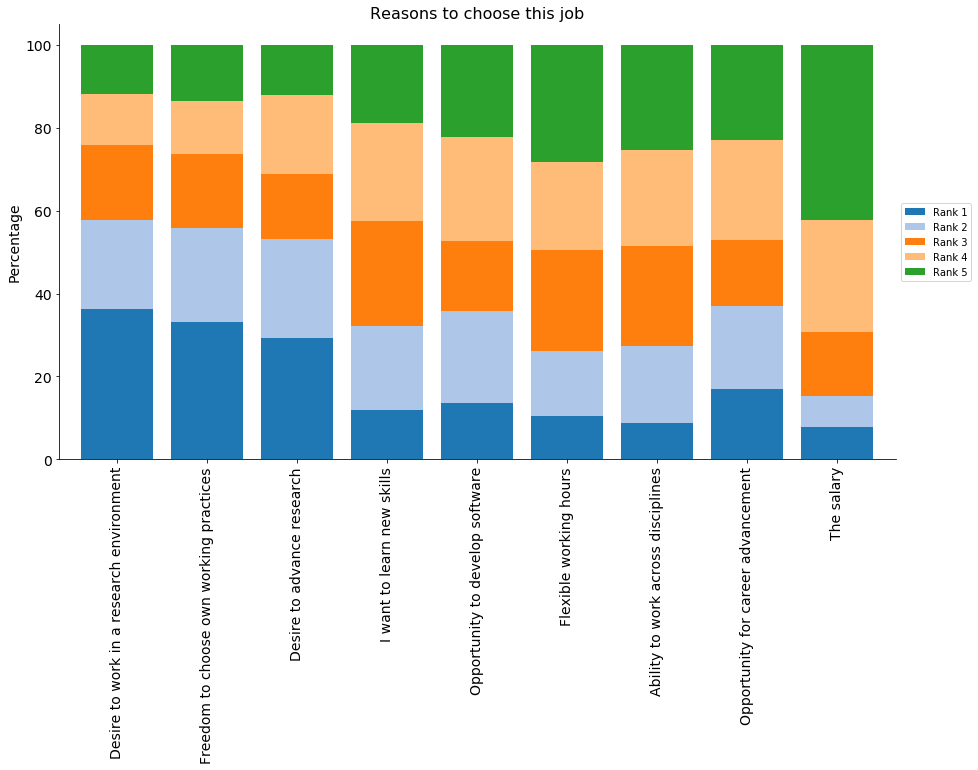

In [134]:
_ = get_plot(perc_to_count, "ranking")

# Section 6. Collaboration and training

RSEs by definition, work for others. Their role involves writing code that is used by others (as seen in section 2), but the collaboration can take other forms. This is why we asked with whom the participants work with. Usually, they seems to be embedded in a stable group, 64% of them report to work with the same researchers, while a minority has a more flexible collaboration (36%).
On the side of collaboration, we wanted to know if they were working within a stable group of researcher software. It is the case for 56% of them, while 44% do not have such group.
Working for researchers or working within a research software group is different than working on the same project with other developers. On average they work on 3 different projects at the same time. For these, it appears that RSEs work more often as the sole developer (35%) on the project or in pair (32%). Being between 3 and 5 developers is not that uncommon (24%) but bigger projects are marginals.

RSEs have programming skills that is not necessarily shared within their field. Therefore, they can train other researchers to develop some best practices or learn how to program more efficiently. 66% of them participate to such training. They are not teaching directly to students (as seen in section 2) but transferring skills is an important aspect of their job. In average, they do training twice a year. These trainings are more often done under the form of workshop than traditional teaching. A type of training probably more adapted to teach computing skills.

## Collaboration

### Do you always work with the same researcher(s), or do you regularly change the researcher(s) you work with?

In [135]:
v_to_count, filename  = get_count(df, ['currentWork1. Do you always work with the same researcher(s), or do you regularly change the researcher(s) you work with?'], "one choice", "./../../survey_creation/2017/de/listAnswers/work_researchers.csv", "False", "./de/output/")

In [136]:
perc_to_count = get_percentage(v_to_count, filename)

In [137]:
display_side_by_side(v_to_count,perc_to_count)

Count Percentage
Do you always work with the same researcher(s),...                  
Same researcher(s)                                    192         64
Regularly change researcher(s)                        107         36
NaN                                                    26        NaN

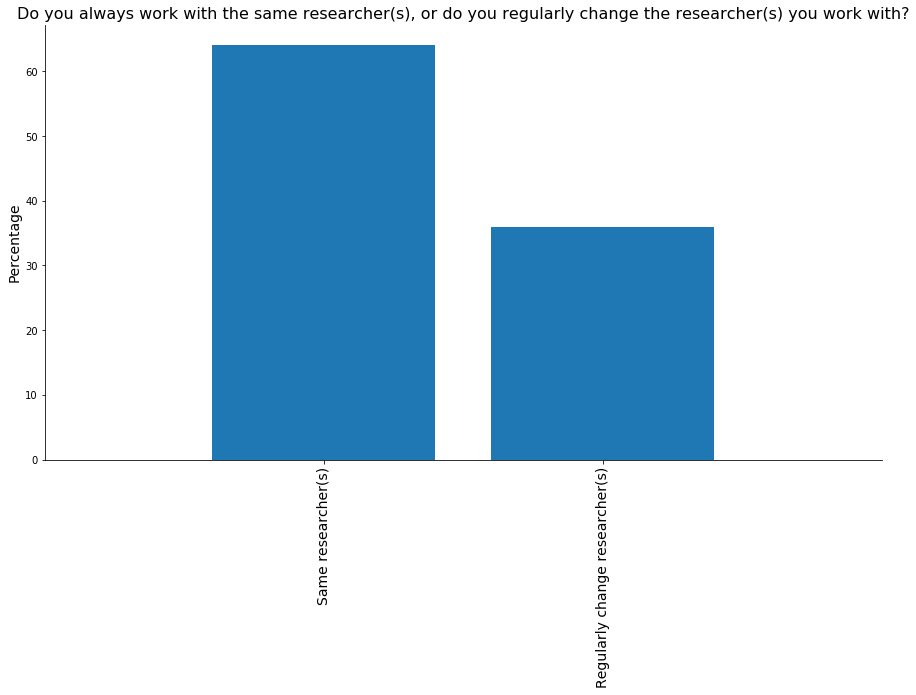

In [138]:
_ = get_plot(perc_to_count, "one choice")

### Do you work for a Research Software Group?

In [139]:
v_to_count, filename  = get_count(df, ['currentWork2. Do you work for a Research Software Group?'], "y/n/na", "./../../survey_creation/2017/de/listAnswers/.csv", "False", "./de/output/")

In [140]:
perc_to_count = get_percentage(v_to_count, filename)

In [141]:
display_side_by_side(v_to_count,perc_to_count)

Yes [Count]  No [Count]  \
Do you work for a Research Software Group?                             
 Do you work for a Research Software Group?          169         131   

                                             NaN value Yes [Percentage]  \
Do you work for a Research Software Group?                                
 Do you work for a Research Software Group?         25               56   

                                            No [Percentage]  
Do you work for a Research Software Group?                   
 Do you work for a Research Software Group?              44

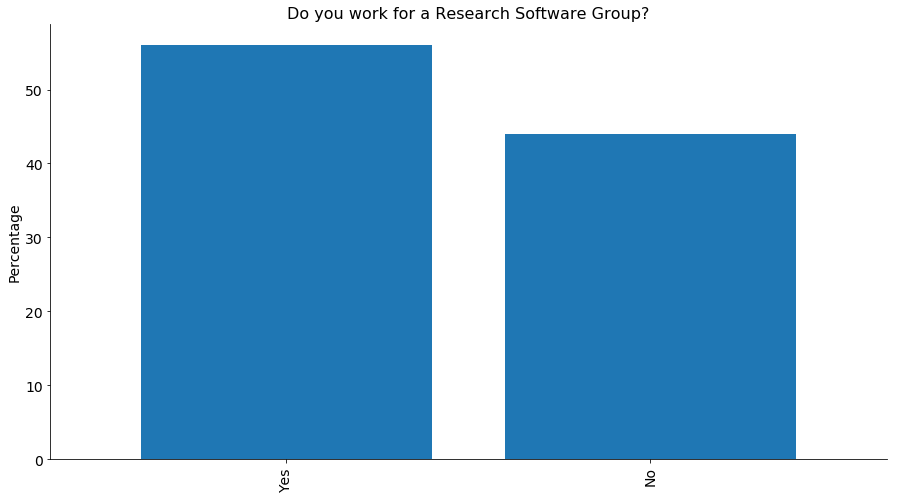

In [142]:
_ = get_plot(perc_to_count, "y/n/na")

### How many software projects are you currently involved in?

In [143]:
v_to_count, filename  = get_count(df, ['proj1can. How many software projects are you currently involved in?'], "freenumeric", "./../../survey_creation/2017/de/listAnswers/.csv", "False", "./de/output/")

       proj1can. How many software projects are you currently involved in?
count                                         300.000000                  
mean                                            3.160000                  
std                                             3.226313                  
min                                             0.000000                  
25%                                             1.000000                  
50%                                             3.000000                  
75%                                             4.000000                  
max                                            30.000000                  


/home/olivier/.data/git/ssi/international-survey/venv/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


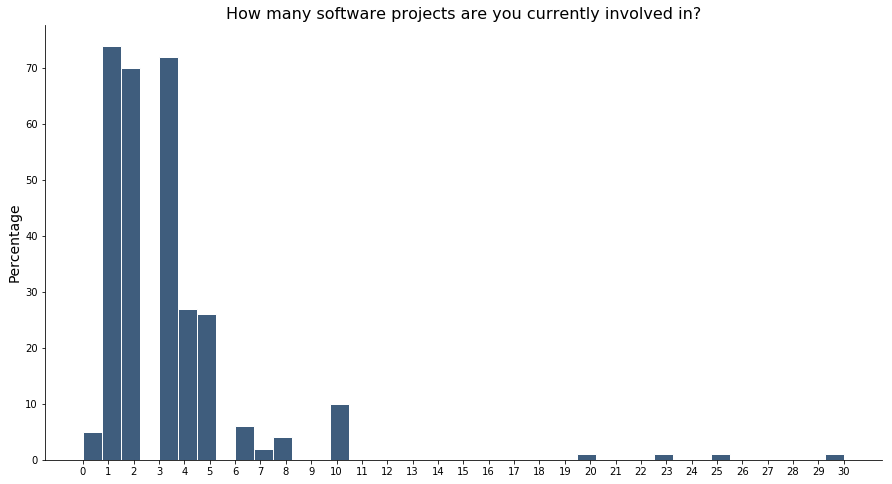

In [144]:
_ = get_plot(v_to_count, "freenumeric")

### How many software developers typically work on your projects?

In [145]:
v_to_count, filename  = get_count(df, ['proj2can. How many software developers typically work on your projects?'], "one choice", "./../../survey_creation/2017/de/listAnswers/proj_how_many_de.csv", "True", "./de/output/")

In [146]:
perc_to_count = get_percentage(v_to_count, filename)

In [147]:
display_side_by_side(v_to_count,perc_to_count)

Count Percentage
How many software developers typically work on ...                  
1                                                     105         35
2                                                      97         32
3-5                                                    71         24
6-9                                                    10          3
10+                                                    17          6
NaN                                                    25        NaN

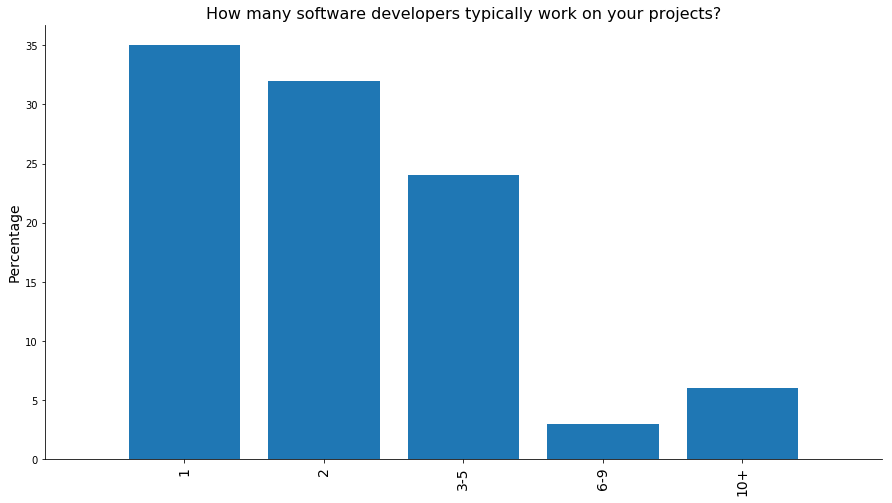

In [148]:
_ = get_plot(perc_to_count, "one choice")

## Training

### Have you ever trained researchers in computational techniques?

In [149]:
v_to_count, filename  = get_count(df, ['train1. Have you ever trained researchers in computational techniques?'], "y/n/na", "./../../survey_creation/2017/de/listAnswers/.csv", "False", "./de/output/")

In [150]:
perc_to_count = get_percentage(v_to_count, filename)

In [151]:
display_side_by_side(v_to_count,perc_to_count)

Yes [Count]  No [Count]  \
Have you ever trained researchers in computatio...                            
 Have you ever trained researchers in computati...          197         103   

                                                    NaN value  \
Have you ever trained researchers in computatio...              
 Have you ever trained researchers in computati...         25   

                                                   Yes [Percentage]  \
Have you ever trained researchers in computatio...                    
 Have you ever trained researchers in computati...               66   

                                                   No [Percentage]  
Have you ever trained researchers in computatio...                  
 Have you ever trained researchers in computati...              34

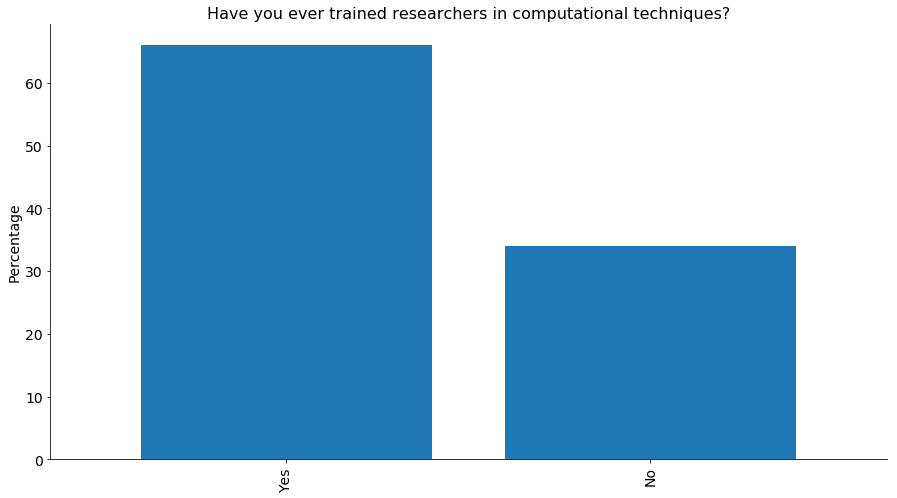

In [152]:
_ = get_plot(perc_to_count, "y/n/na")

### On average, how many times a year do you take part in providing training?

In [153]:
v_to_count, filename  = get_count(df, ['train2. On average, how many times a year do you take part in providing training?'], "freenumeric", "./../../survey_creation/2017/de/listAnswers/.csv", "False", "./de/output/")

       train2. On average, how many times a year do you take part in providing training?
count                                         197.000000                                
mean                                            2.776802                                
std                                             6.000172                                
min                                             0.000000                                
25%                                             0.500000                                
50%                                             1.000000                                
75%                                             3.000000                                
max                                            60.000000                                


/home/olivier/.data/git/ssi/international-survey/venv/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


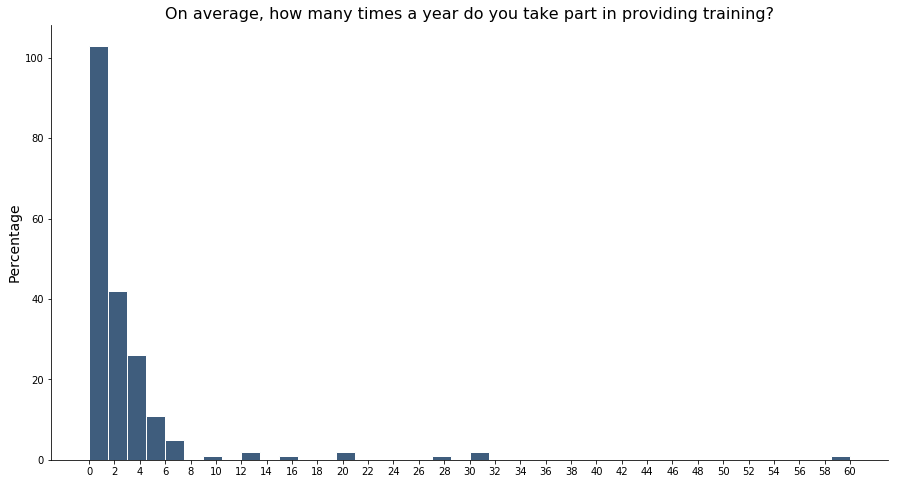

In [154]:
_ = get_plot(v_to_count, "freenumeric")

### What training programs are you involved with (comma separated list; for example, Software Carpentry, local university training, etc.)

In [155]:
data = df['train3. What training programs are you involved with (comma separated list; for example, Software Carpentry, local university training, etc.)'].dropna()
data = [z.strip() for i in data for z in i.split(',') if len(z.strip()) > 2]
data = [z.replace('/', ' ').replace(';', ' ').strip().lower() for z in data]
data = [ ''.join(i for i in s if not i.isdigit()).strip() for s in data if len(s) < 50 and s not in ['none']]
print('There are {} propositions'.format(len(data)))

There are 241 propositions


In [156]:
results = dict()
for i in data:
    results[str(i.lower())] = results.get(str(i.lower()), 0)+1
results = sorted(results.items(), key=operator.itemgetter(1),reverse=True)
for k in results:
    if len(k[0]) > 3 and k[1] > 1:
        print(k[0].title(), k[1])

Lehrgang An Universitäten 18
Local University Training 17
Software Carpentry 14
Keine 10
Workshops 5
Summer School 3
Summer Schools 3
Workshops An Universitäten 3
Lehrgang An Universität 2
Interne Weiterbildung 2
Local University Teaching 2
No Comment 2
Currently None. 2
Inhouse-Schulungen 2


In [157]:
 wc = wordcloud(df, ['train3. What training programs are you involved with (comma separated list; for example, Software Carpentry, local university training, etc.)'])

(-0.5, 1499.5, 799.5, -0.5)

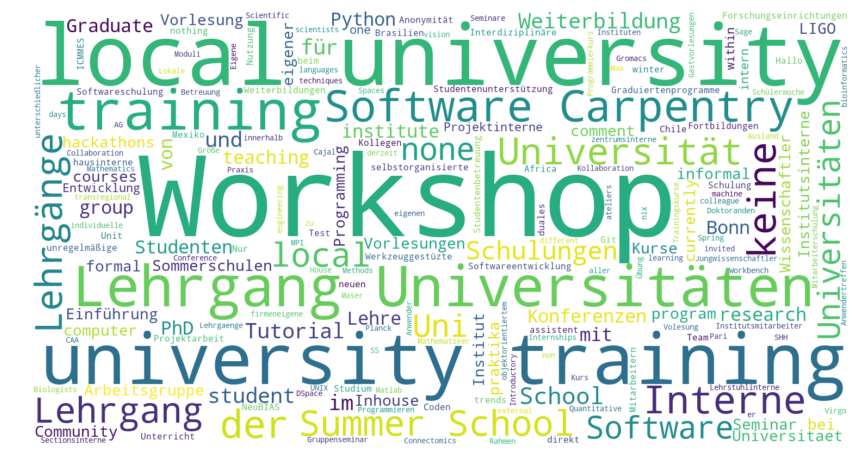

In [158]:
 plt.imshow(wc, interpolation='bilinear')
 plt.axis("off")

# Section 7. Publications

RSEs is an hybrid role between a researcher and a software developer. We investigated both of these aspects concerning publication and dissemination of their work, one on the traditional aspect of it (publications and conference) and on the more software aspect (open source and DOI).
One essential aspect of career in academia is the publications and the conferences to gain recognition. However, the role of RSE being less about writing articles than creating the infrastructure and the software for the article to exist, there is some fear that they will fail to have recognition through the papers and conferences.
Our results support this idea, while for 83% of the participants, their software is used in published researches they are only 71% (among them) who are acknowledged in the publication.

Among these participants that are acknowledged in the paper, only 33% are generally named as main author for the paper. Among the 67% of those who are not main author, 78% are at least mentioned as co-authors. And among these last 22% of RSEs that are not mentioned as co-author or main author, 69% are at least generally acknowledged in the main text of the paper.
On conference, the number of RSEs that present their work in conference is rather small, only 56%, when compared to the paper publications.

Software also requires specific citations, and even if the way to do it properly is not standardise yet, it is another way for RSEs to be recognised in their role, but also giving recognition to others that develop software. In that perspective, we asked them *how do they reference software directly or the papers describing the software?*. Among the propositions they could choose, citing the specific version of the software is the most common way to cite it (43%), followed by paper about software or the software itself (32%) or software itself (25%). It is important to note that this question did not have a "No" as an option, therefore these numbers need to be put in perspective of the high number of none answer. Less than 20 % of people chose one of the options. RSEs do not seem to often cite the software they use.

One important development practice is how the code is distributed and if the RSEs are releasing their work under open licence.
We asked the participants if they have ever released their work under open source licence and 62% of them replied by the affirmative. However, as it could be considered as a small number, among these 62%, it is seems that 42% are doing it all the time. Therefore, as soon as the step to open source is done, it seems that RSEs seems a constant interest in it. However, they rarely use a Digital Object Identifier (DOI) to help to identify their software, only 18% of them are doing it. And the frequency of use of the DOI among them is much more variable than for the open licence.

A last element about publications is the use of [ORCID](https://orcid.org/). It is an online service that allows to connect different publications and work with one identifier per researcher. Half of them are using the service.



## Academic publications

### Has your software contributed to research that has been published in a journal or at a conference?; In general, when your software contributes to a paper, are you acknowledged in that paper?; Are you generally named as the main author of the paper?; Are you generally named as a co-author of the paper?; Are you generally acknowledged in the main text of the paper?

In [159]:
v_to_count, filename  = get_count(df, ['paper1. Has your software contributed to research that has been published in a journal or at a conference?', 'paper2. In general, when your software contributes to a paper, are you acknowledged in that paper?', 'paper3. Are you generally named as the main author of the paper?', 'paper4. Are you generally named as a co-author of the paper?', 'paper5. Are you generally acknowledged in the main text of the paper?'], "y/n/na", "./../../survey_creation/2017/de/listAnswers/.csv", "False", "./de/output/")

In [160]:
perc_to_count = get_percentage(v_to_count, filename)

In [161]:
display_side_by_side(v_to_count,perc_to_count)

Yes [Count]  No [Count]  \
Publications                                                                  
 Has your software contributed to research that...          248          52   
 In general, when your software contributes to ...          212          88   
 Are you generally named as the main author of ...           69         143   
 Are you generally named as a co-author of the ...          111          32   
 Are you generally acknowledged in the main tex...           22          10   

                                                    NaN value  \
Publications                                                    
 Has your software contributed to research that...         25   
 In general, when your software contributes to ...         25   
 Are you generally named as the main author of ...        113   
 Are you generally named as a co-author of the ...        182   
 Are you generally acknowledged in the main tex...        293   

                                                   Yes [Percentage]  \
Publications                                                          
 Has your software contributed to research that...               83   
 In general, when your software contributes to ...               71   
 Are you generally named as the main author of ...               33   
 Are you generally named as a co-author of the ...               78   
 Are you generally acknowledged in the main tex...               69   

                                                   No [Percentage]  
Publications                                                        
 Has your software contributed to research that...              17  
 In general, when your software contributes to ...              29  
 Are you generally named as the main author of ...              67  
 Are you generally named as a co-author of the ...              22  
 Are you generally acknowledged in the main tex...              31

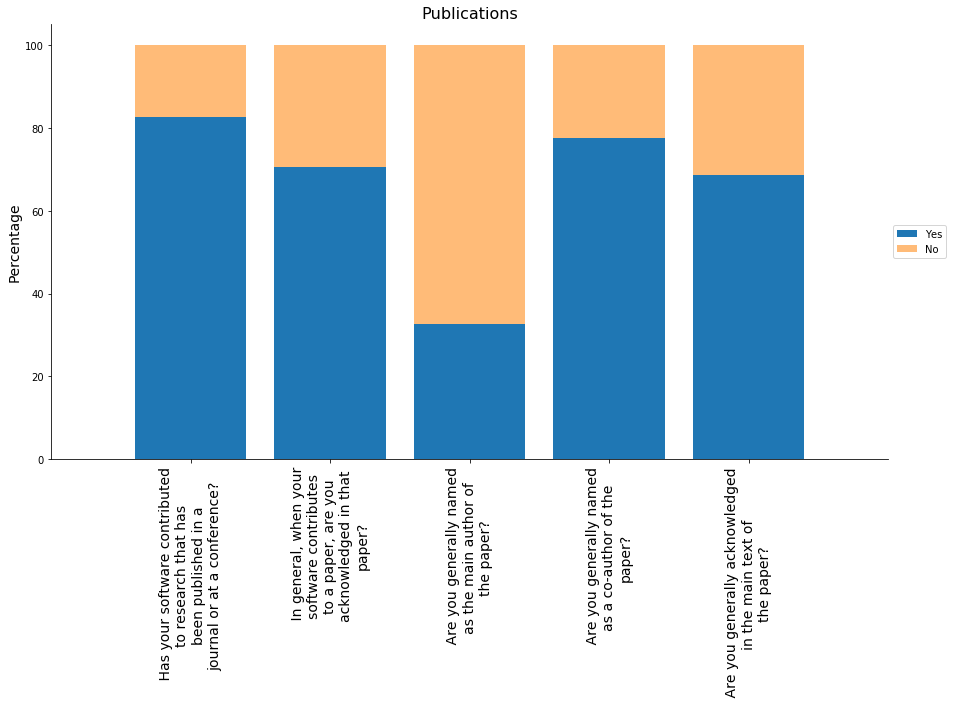

In [162]:
_ = get_plot(perc_to_count, "y/n/na")

### Have you ever presented your software work at a conference or workshop?

In [163]:
v_to_count, filename  = get_count(df, ['conf1can. Have you ever presented your software work at a conference or workshop?'], "y/n/na", "./../../survey_creation/2017/de/listAnswers/.csv", "False", "./de/output/")

In [164]:
perc_to_count = get_percentage(v_to_count, filename)

In [165]:
display_side_by_side(v_to_count,perc_to_count)

Yes [Count]  No [Count]  \
Have you ever presented your software work at a...                            
 Have you ever presented your software work at ...          167         133   

                                                    NaN value  \
Have you ever presented your software work at a...              
 Have you ever presented your software work at ...         25   

                                                   Yes [Percentage]  \
Have you ever presented your software work at a...                    
 Have you ever presented your software work at ...               56   

                                                   No [Percentage]  
Have you ever presented your software work at a...                  
 Have you ever presented your software work at ...              44

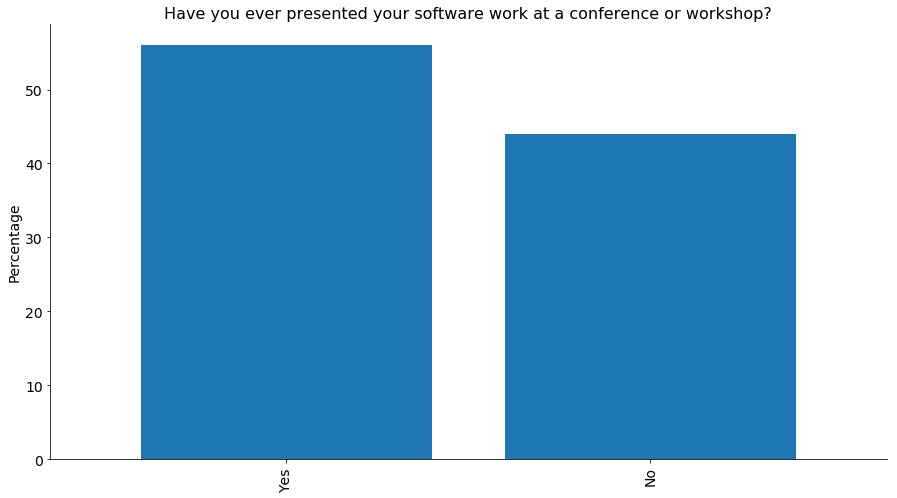

In [166]:
_ = get_plot(perc_to_count, "y/n/na")

### Which conference(s)/workshop(s) (comma separated list with FULLNAME (ACRONYM), ACRONYM, ...)

In [167]:
 wc = wordcloud(df, ['conf2can. Which conference(s)/workshop(s) (comma separated list with FULLNAME (ACRONYM), ACRONYM, ...)'])

(-0.5, 1499.5, 799.5, -0.5)

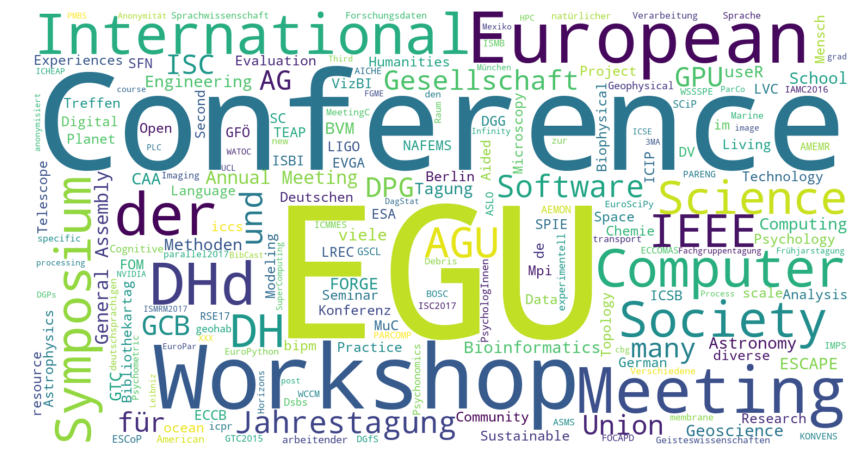

In [168]:
 plt.imshow(wc, interpolation='bilinear')
 plt.axis("off")

### Do you reference software directly or the papers describing the software?

In [169]:
v_to_count, filename  = get_count(df, ['open2de. Do you reference software directly or the papers describing the software?'], "one choice", "./../../survey_creation/2017/de/listAnswers/doi_topic_de.csv", "False", "./de/output/")

In [170]:
perc_to_count = get_percentage(v_to_count, filename)

In [171]:
display_side_by_side(v_to_count,perc_to_count)

Count Percentage
Do you reference software directly or the paper...                  
specific version of the software                       23         43
paper about software                                   17         32
software itself (no specific version)                  13         25
NaN                                                   272        NaN

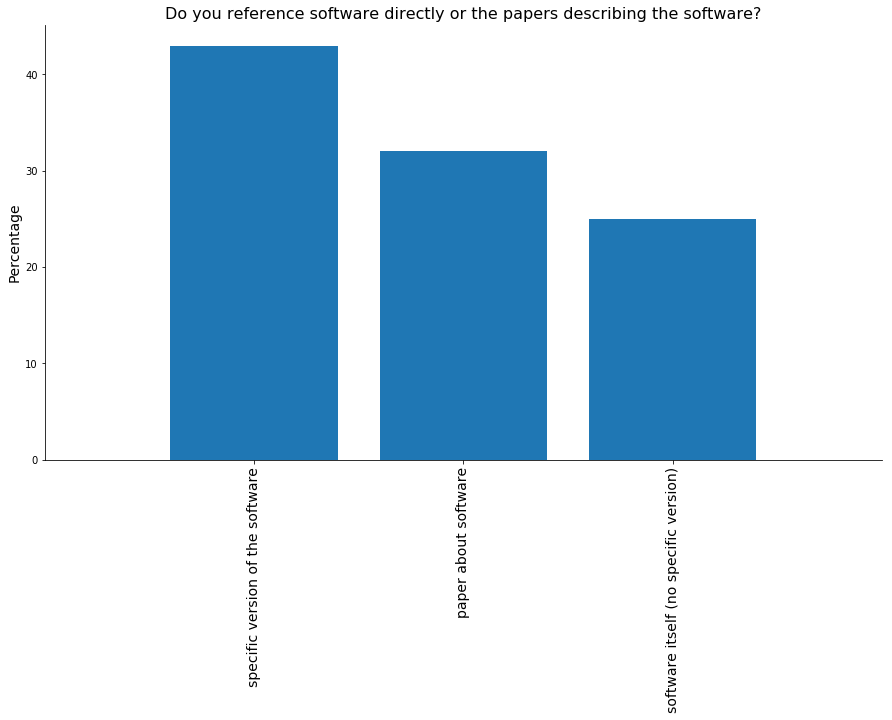

In [172]:
_ = get_plot(perc_to_count, "one choice")

## Open source

### Have you ever released your software under an open-source licence?

In [173]:
v_to_count, filename  = get_count(df, ['open01can. Have you ever released your software under an open-source licence?'], "y/n/na", "./../../survey_creation/2017/de/listAnswers/.csv", "False", "./de/output/")

In [174]:
perc_to_count = get_percentage(v_to_count, filename)

In [175]:
display_side_by_side(v_to_count,perc_to_count)

Yes [Count]  No [Count]  \
Have you ever released your software under an o...                            
 Have you ever released your software under an ...          187         113   

                                                    NaN value  \
Have you ever released your software under an o...              
 Have you ever released your software under an ...         25   

                                                   Yes [Percentage]  \
Have you ever released your software under an o...                    
 Have you ever released your software under an ...               62   

                                                   No [Percentage]  
Have you ever released your software under an o...                  
 Have you ever released your software under an ...              38

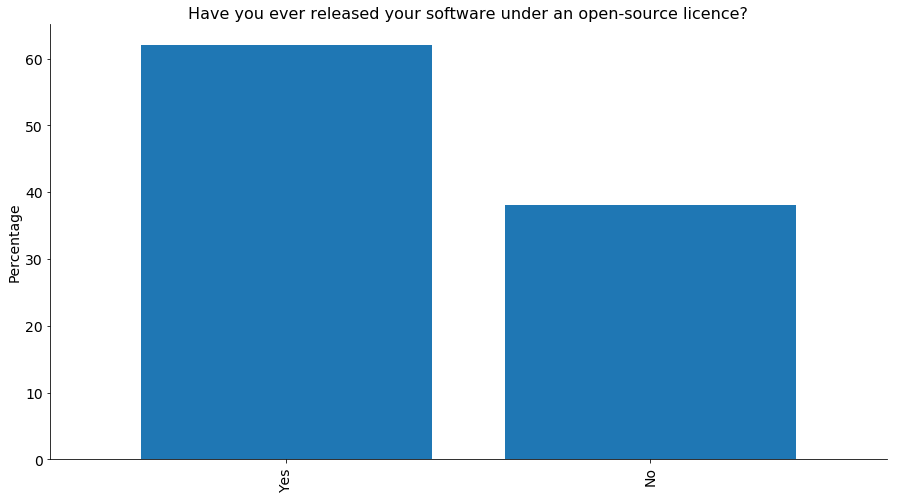

In [176]:
_ = get_plot(perc_to_count, "y/n/na")

### How often do you release the software projects you've worked on under an open-source licence?

In [177]:
v_to_count, filename  = get_count(df, ["open1can[SQ001]. How often do you release the software projects you've worked on under an open-source licence? []"], "likert", "./../../survey_creation/2017/de/listAnswers/likert_time_10.csv", "True", "./de/output/")

In [178]:
perc_to_count = get_percentage(v_to_count, filename)

In [179]:
display_side_by_side(v_to_count,perc_to_count)

Count Percentage
How often do you release the software projects ...                  
﻿1 (None at all)                                      NaN        nan
2                                                    13.0        nan
3                                                     8.0        nan
4                                                     2.0        nan
5                                                    25.0        nan
6                                                    11.0        nan
7                                                    15.0        nan
8                                                    16.0        nan
9                                                    19.0        nan
10 (All my time)                                     78.0        nan

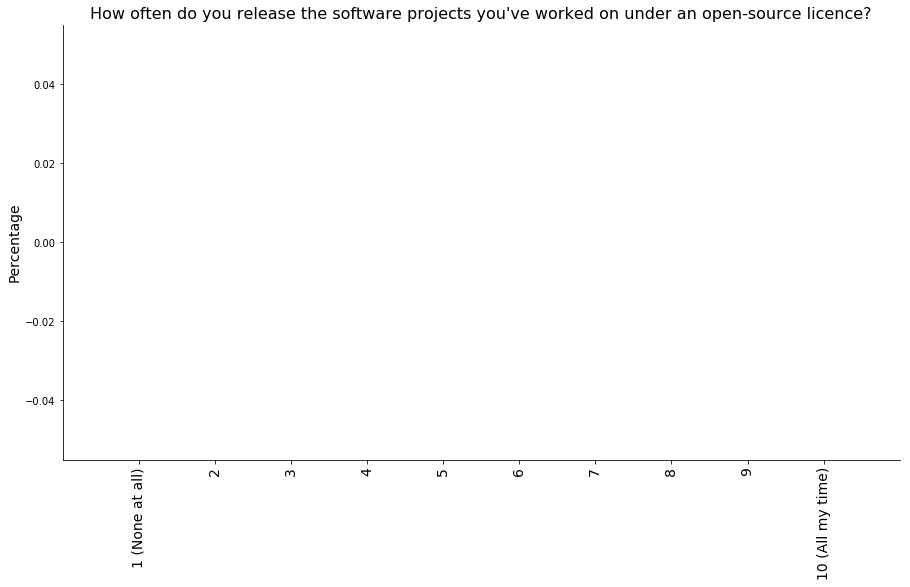

In [180]:
_ = get_plot(perc_to_count, "likert")

### Have you ever used a Digital Object Identifier (DOI) to identify your software?

In [181]:
v_to_count, filename  = get_count(df, ['open03can. Have you ever used a Digital Object Identifier (DOI) to identify your software?'], "y/n/na", "./../../survey_creation/2017/de/listAnswers/.csv", "False", "./de/output/")

In [182]:
perc_to_count = get_percentage(v_to_count, filename)

In [183]:
display_side_by_side(v_to_count,perc_to_count)

Yes [Count]  No [Count]  \
Have you ever used a Digital Object Identifier ...                            
 Have you ever used a Digital Object Identifier...           53         247   

                                                    NaN value  \
Have you ever used a Digital Object Identifier ...              
 Have you ever used a Digital Object Identifier...         25   

                                                   Yes [Percentage]  \
Have you ever used a Digital Object Identifier ...                    
 Have you ever used a Digital Object Identifier...               18   

                                                   No [Percentage]  
Have you ever used a Digital Object Identifier ...                  
 Have you ever used a Digital Object Identifier...              82

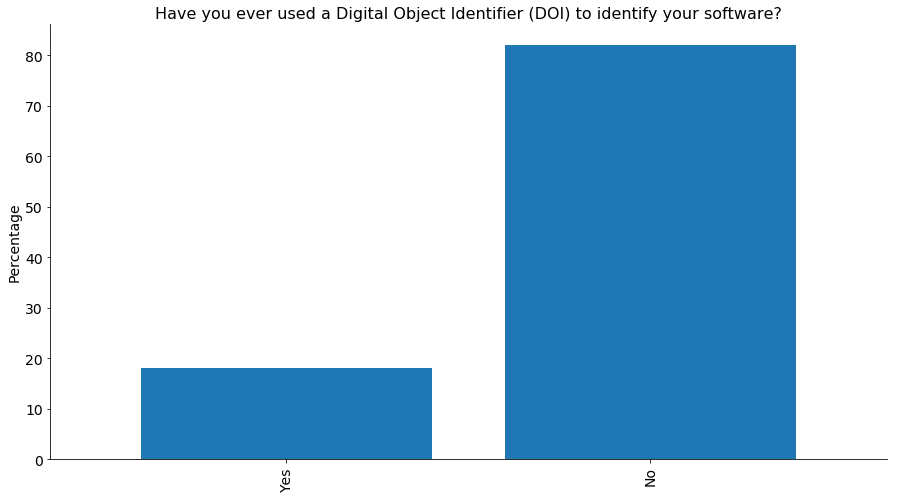

In [184]:
_ = get_plot(perc_to_count, "y/n/na")

### How often do you associate your software with a Digital Object Identifier (DOI)?

In [185]:
v_to_count, filename  = get_count(df, ['open3can[SQ001]. How often do you associate your software with a Digital Object Identifier (DOI)? []'], "likert", "./../../survey_creation/2017/de/listAnswers/likert_time_10.csv", "True", "./de/output/")

In [186]:
perc_to_count = get_percentage(v_to_count, filename)

In [187]:
display_side_by_side(v_to_count,perc_to_count)

Count Percentage
How often do you associate your software with a...                  
﻿1 (None at all)                                        2          4
2                                                       6         11
3                                                       7         13
4                                                       1          2
5                                                      10         19
6                                                       4          8
7                                                       7         13
8                                                       4          8
9                                                       1          2
10 (All my time)                                       11         21

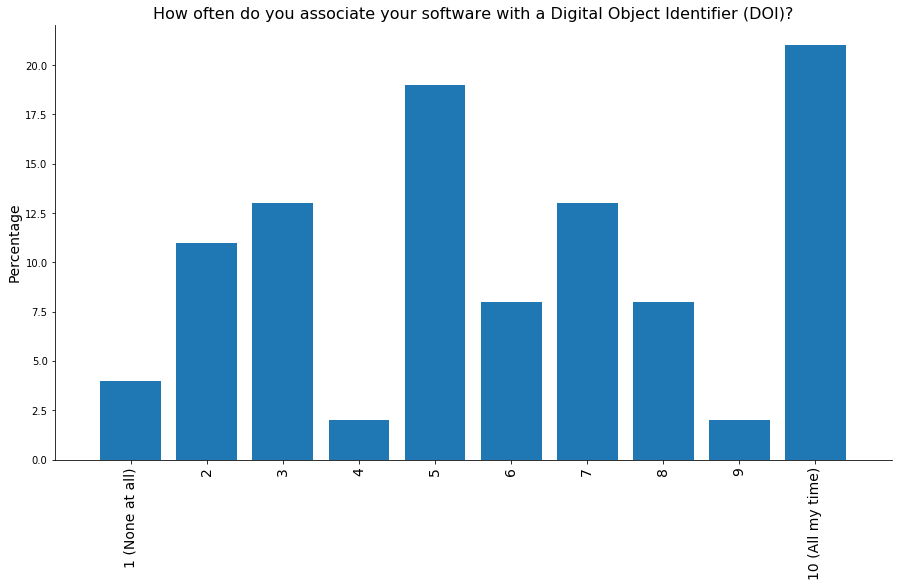

In [188]:
_ = get_plot(perc_to_count, "likert")

### Which (infrastructure) tools do you use if assigning DOIs (e.g. local library, Zenodo)?

In [189]:
data = df['open3de. Which (infrastructure) tools do you use if assigning DOIs (e.g. local library, Zenodo)?'].dropna()
data = [z.strip() for i in data for z in i.split(',') if len(z.strip()) > 2]
data = [z.replace('/', ' ').replace(';', ' ').strip().lower() for z in data]
data = [ ''.join(i for i in s if not i.isdigit()).strip() for s in data if s not in ['none']]
print('There are {} propositions'.format(len(data)))

There are 59 propositions


In [190]:
results = dict()
for i in data:
    results[str(i.lower())] = results.get(str(i.lower()), 0)+1
results = sorted(results.items(), key=operator.itemgetter(1),reverse=True)
for k in results:
    if len(k[0]) > 3:
        print(k[0].title(), k[1])

Zenodo 34
Bibliothek 4
Figshare 3
Local Library 2
Mpdl Doi Service 1
Pangaea 1
Ezid 1
Datacite 1
Zenodo Github Integration 1
Bibliothek Gfz 1
Epic 1
I Think 1
Local Procedure (Contractual Binding With Datacite) 1
Zenodo Or Internal Data Library Of My Centre 1
Demo-Tracks Auf Konferenzen 1
Uni Bib 1
Figshare.Com 1
Institutseigene Fachbibliothek 1


In [191]:
 wc = wordcloud(df, ['open3de. Which (infrastructure) tools do you use if assigning DOIs (e.g. local library, Zenodo)?'])

(-0.5, 1499.5, 799.5, -0.5)

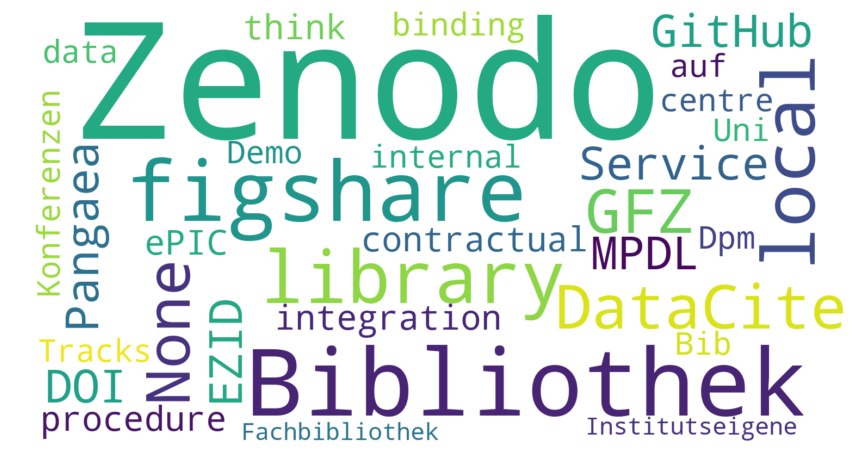

In [192]:
 plt.imshow(wc, interpolation='bilinear')
 plt.axis("off")

### Do you have an ORCID ID?

In [193]:
v_to_count, filename  = get_count(df, ['open1de. Do you have an ORCID ID?'], "y/n/na", "./../../survey_creation/2017/de/listAnswers/.csv", "False", "./de/output/")

In [194]:
perc_to_count = get_percentage(v_to_count, filename)

In [195]:
display_side_by_side(v_to_count,perc_to_count)

Yes [Count]  No [Count]  NaN value  \
Do you have an ORCID ID?                                        
 Do you have an ORCID ID?          150         150         25   

                          Yes [Percentage] No [Percentage]  
Do you have an ORCID ID?                                    
 Do you have an ORCID ID?               50              50

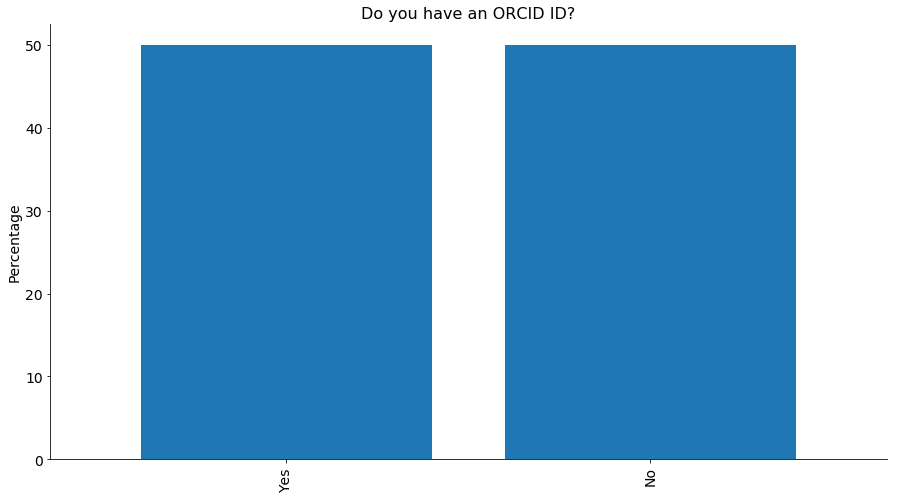

In [196]:
_ = get_plot(perc_to_count, "y/n/na")

# Section 8. Sustainability and technical details

This section comprises two subsections that focus on the technical and development aspects of the RSEs' work. They aim to understand good practices in developing software and which tools are important for RSEs.

Developing software requires a set of good practices to ensure the quality of the subsequent analysis as well as the robustness of the developed software, to name a few of important aspects. We wanted to see if the implementation of some simple but essential good practices were a reality. Three measures were created, the implementation of testing, the bus factor and the technical hand over plan.
These metrics allows to see the importance of the RSEs role in their team but also if they are themselves implementing some practices that are used widely in industry but less in academic research.

We asked the participants to choose any of the following testing methods:
* Test engineers conduct testing
* Developers conduct testing
* Users conduct testing
* No formal testing

Obviously, the *test engineers conduct testing* is the most robust testing method but may not be possible in smaller projects while no formal testing should not occur in any ideal scenario, regardless of the size of the project. Surprisingly, 15% of the participants confessed they were not implementing any testing at all. It may seems a low number but we think it is still a high percentage considering the specific work of this population. When they are conducting testing, the RSEs seems to prefer (or only able to implement) *developer testing* (48% of them) or letting the users conduct the testing (33%), while the use of test engineers is marginal (4%).

We chose two broad measures to provide an insight into sustainability: the bus factor and technical hand over planning. The bus factor is a measure of the number of developers who understand a specific software project and could, with only a cursory review of the project, maintain or extend the code. A project with a bus factor of 1 is completely reliant on only one developer. If this developer finds new employment, becomes ill or is hit by the titular bus, then the project will fail. A high bus factor provides some confidence that the project can be sustained even if a developer leaves. A technical hand over plan is used to introduce a new developer to a software project. These plans cover basic information, such as the licence and location of the software, a repository, a description of the software architecture, a summary of development plans and any other information that a new developer would need to understand the software. A project that has written (and maintained) a technical hand over plan can withstand the departure of a developer, even a key developer, significantly better than one without such a plan.

On majority of the RSEs' projects the bus factor is 1 (57%), followed by a bus factor of 2 (27%). Higher bus factor is only marginal with only 8% of the projects having a bus factor of 3, 3% of a bus factor of 4 and 5 % a bus factor equal or higher than 5.
These low numbers should be put in relation of the number of developer involved in the project (35 % of the projects with only one developer and 32 % with 2 developers). However, the presence of a technical plan, which can mitigate the low bus factor in the different projects is really low (19%) and presents a risk of project failures.


On technical details we wanted to know which of the programming languages are mostly used by the RSEs. We give them a multi-choice list inspired by the [results](https://insights.stackoverflow.com/survey/2017#most-popular-technologies) published by Stackoverflow. Python and C++ are clearly the most used language with 18% and 10%. The rests of the languages that are higher than 5% are Javascript (9%), R (8%), C (8%), Java (7%), Matlab (7%), SQL (7%) and Fortran (6%).
About which Operating System used by RSEs, a majority are using GNU/Linux (60%), while Windows and OS X have way less users (23 and 15%).


## Good practices

### In general, what sort of testing do you conduct on your software? (check all that apply)

In [197]:
v_to_count, filename  = get_count(df, ['proj4can[1]. In general, what sort of testing do you conduct on your software? (check all that apply) [No formal testing]', 'proj4can[2]. In general, what sort of testing do you conduct on your software? (check all that apply) [Developers conduct testing]', 'proj4can[3]. In general, what sort of testing do you conduct on your software? (check all that apply) [Test engineers conduct testing]', 'proj4can[4]. In general, what sort of testing do you conduct on your software? (check all that apply) [Users conduct testing]'], "multiple choices", "./../../survey_creation/2017/de/listAnswers/testing.csv", "False", "./de/output/")

In [198]:
perc_to_count = get_percentage(v_to_count, filename)

In [199]:
display_side_by_side(v_to_count,perc_to_count)

Count Percentage
In general, what sort of testing do you conduct...                  
Developers conduct testing                            263         48
Users conduct testing                                 182         33
No formal testing                                      82         15
Test engineers conduct testing                         20          4

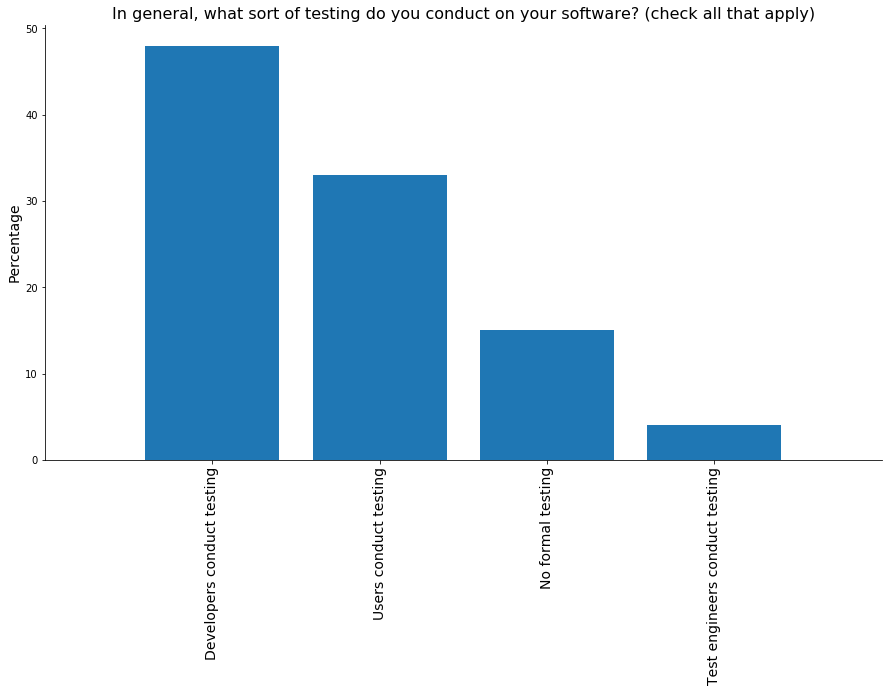

In [200]:
_ = get_plot(perc_to_count, "multiple choices")

### What is the bus factor of your most important software project?

In [201]:
v_to_count, filename  = get_count(df, ['stability1. What is the bus factor of your most important software project?'], "one choice", "./../../survey_creation/2017/de/listAnswers/bus_factor.csv", "True", "./de/output/")

In [202]:
perc_to_count = get_percentage(v_to_count, filename)

In [203]:
display_side_by_side(v_to_count,perc_to_count)

Count Percentage
What is the bus factor of your most important s...                  
1                                                     172         57
2                                                      80         27
3                                                      23          8
4                                                       9          3
5+                                                     16          5
NaN                                                    25        NaN

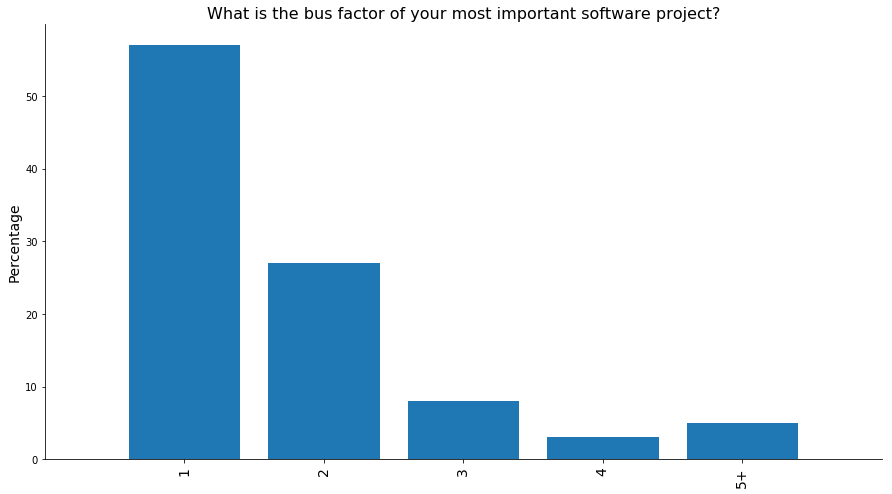

In [204]:
_ = get_plot(perc_to_count, "one choice")

### Is there a technical hand-over plan for your most important software project?

In [205]:
v_to_count, filename  = get_count(df, ['stability2. Is there a technical hand-over plan for your most important software project?'], "y/n/na", "./../../survey_creation/2017/de/listAnswers/.csv", "False", "./de/output/")

In [206]:
perc_to_count = get_percentage(v_to_count, filename)

In [207]:
display_side_by_side(v_to_count,perc_to_count)

Yes [Count]  No [Count]  \
Is there a technical hand-over plan for your mo...                            
 Is there a technical hand-over plan for your m...           56         244   

                                                    NaN value  \
Is there a technical hand-over plan for your mo...              
 Is there a technical hand-over plan for your m...         25   

                                                   Yes [Percentage]  \
Is there a technical hand-over plan for your mo...                    
 Is there a technical hand-over plan for your m...               19   

                                                   No [Percentage]  
Is there a technical hand-over plan for your mo...                  
 Is there a technical hand-over plan for your m...              81

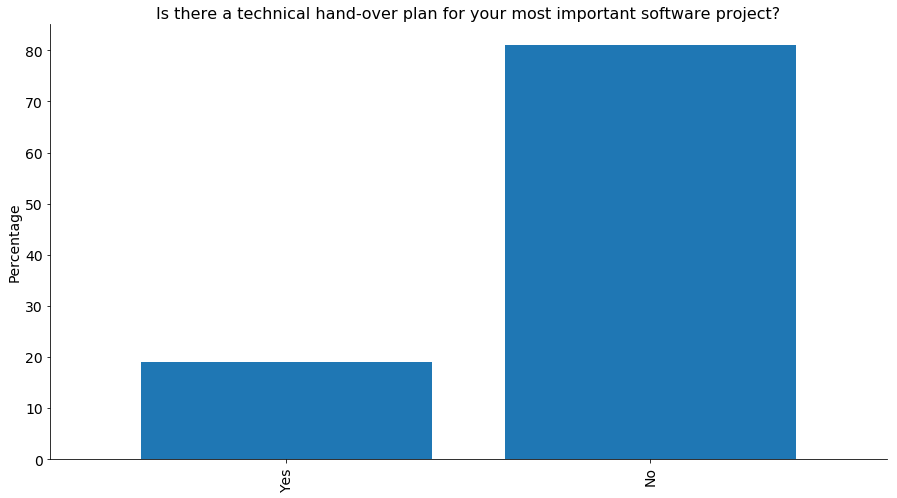

In [208]:
_ = get_plot(perc_to_count, "y/n/na")

## Technical details

### What programming languages do you use at work? (Select as many as apply)

In [209]:
v_to_count, filename  = get_count(df, ['tool4can[1]. What programming languages do you use at work? (Select as many as apply) [Assembly]', 'tool4can[2]. What programming languages do you use at work? (Select as many as apply) [C]', 'tool4can[3]. What programming languages do you use at work? (Select as many as apply) [C#]', 'tool4can[4]. What programming languages do you use at work? (Select as many as apply) [C++]', 'tool4can[5]. What programming languages do you use at work? (Select as many as apply) [Clojure]', 'tool4can[6]. What programming languages do you use at work? (Select as many as apply) [CoffeeScript]', 'tool4can[7]. What programming languages do you use at work? (Select as many as apply) [Common Lisp]', 'tool4can[8]. What programming languages do you use at work? (Select as many as apply) [Dart]', 'tool4can[9]. What programming languages do you use at work? (Select as many as apply) [Elixir]', 'tool4can[10]. What programming languages do you use at work? (Select as many as apply) [Erlang]', 'tool4can[11]. What programming languages do you use at work? (Select as many as apply) [F#]', 'tool4can[12]. What programming languages do you use at work? (Select as many as apply) [Fortran]', 'tool4can[13]. What programming languages do you use at work? (Select as many as apply) [Go]', 'tool4can[14]. What programming languages do you use at work? (Select as many as apply) [Groovy]', 'tool4can[15]. What programming languages do you use at work? (Select as many as apply) [Hack]', 'tool4can[16]. What programming languages do you use at work? (Select as many as apply) [Haskell]', 'tool4can[17]. What programming languages do you use at work? (Select as many as apply) [Java]', 'tool4can[18]. What programming languages do you use at work? (Select as many as apply) [JavaScript]', 'tool4can[19]. What programming languages do you use at work? (Select as many as apply) [Julia]', 'tool4can[20]. What programming languages do you use at work? (Select as many as apply) [Lua]', 'tool4can[21]. What programming languages do you use at work? (Select as many as apply) [Matlab]', 'tool4can[22]. What programming languages do you use at work? (Select as many as apply) [Objective-C]', 'tool4can[23]. What programming languages do you use at work? (Select as many as apply) [Perl]', 'tool4can[24]. What programming languages do you use at work? (Select as many as apply) [PHP]', 'tool4can[25]. What programming languages do you use at work? (Select as many as apply) [Python]', 'tool4can[26]. What programming languages do you use at work? (Select as many as apply) [R]', 'tool4can[27]. What programming languages do you use at work? (Select as many as apply) [Ruby]', 'tool4can[28]. What programming languages do you use at work? (Select as many as apply) [Rust]', 'tool4can[29]. What programming languages do you use at work? (Select as many as apply) [Scala]', 'tool4can[30]. What programming languages do you use at work? (Select as many as apply) [Smalltalk]', 'tool4can[31]. What programming languages do you use at work? (Select as many as apply) [SQL]', 'tool4can[32]. What programming languages do you use at work? (Select as many as apply) [Swift]', 'tool4can[33]. What programming languages do you use at work? (Select as many as apply) [TypeScript]', 'tool4can[34]. What programming languages do you use at work? (Select as many as apply) [VB.NET]', 'tool4can[35]. What programming languages do you use at work? (Select as many as apply) [VBA]', 'tool4can[36]. What programming languages do you use at work? (Select as many as apply) [Visual Basic]'], "multiple choices", "./../../survey_creation/2017/de/listAnswers/programing_language.csv", "False", "./de/output/")

In [210]:
perc_to_count = get_percentage(v_to_count, filename)

In [211]:
display_side_by_side(v_to_count,perc_to_count)

Count Percentage
What programming languages do you use at work? ...                  
Python                                                175         18
C++                                                    99         10
JavaScript                                             86          9
R                                                      75          8
C                                                      73          8
Java                                                   69          7
Matlab                                                 67          7
SQL                                                    64          7
Fortran                                                61          6
PHP                                                    41          4
Perl                                                   33          3
C#                                                     14          1
VBA                                                    13          1
Ruby                                                   13          1
Julia                                                  12          1
Assembly                                               10          1
Visual Basic                                            8          1
Lua                                                     8          1
TypeScript                                              5          1
Groovy                                                  4          0
Go                                                      4          0
VB.NET                                                  4          0
Scala                                                   3          0
Haskell                                                 3          0
Rust                                                    2          0
CoffeeScript                                            2          0
Swift                                                   2          0
Objective-C                                             2          0
Clojure                                                 1          0
Common Lisp                                             1          0
Elixir                                                  0          0
Dart                                                    0          0
Hack                                                    0          0
Erlang                                                  0          0
Smalltalk                                               0          0
F#                                                      0          0

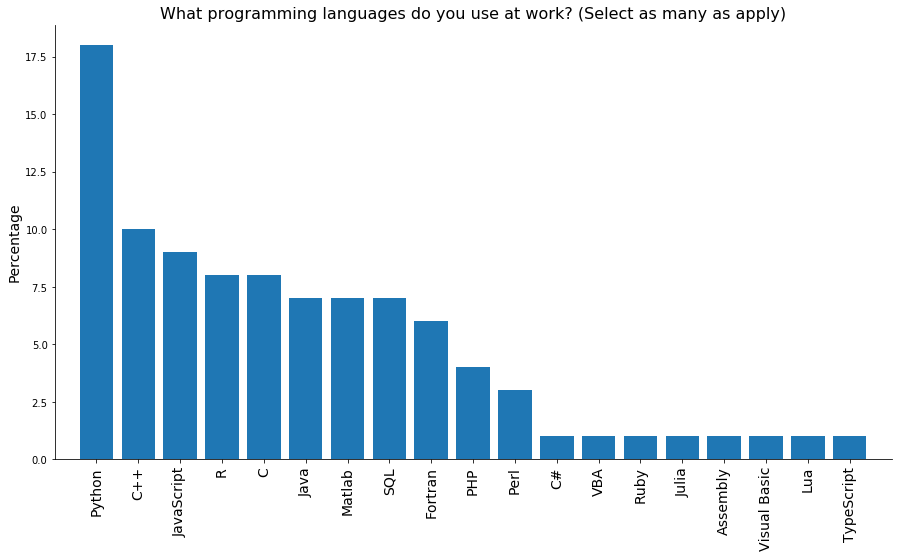

In [212]:
_ = get_plot(perc_to_count, "multiple choices")

### What Operating System do you prefer to use at work?

In [213]:
v_to_count, filename  = get_count(df, ['tool2. What Operating System do you prefer to use at work?'], "one choice", "./../../survey_creation/2017/de/listAnswers/os.csv", "False", "./de/output/")

In [214]:
perc_to_count = get_percentage(v_to_count, filename)

In [215]:
display_side_by_side(v_to_count,perc_to_count)

Count Percentage
What Operating System do you prefer to use at w...                  
GNU/Linux                                             149         60
Windows                                                56         23
OS X                                                   37         15
Other                                                   6          2
NaN                                                    77        NaN

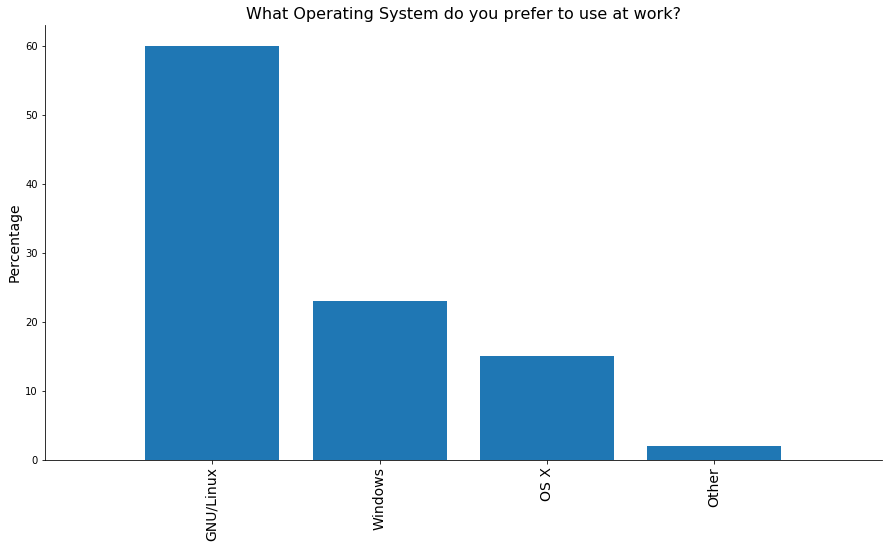

In [216]:
_ = get_plot(perc_to_count, "one choice")

# Section 9. Job satisfaction

The job satisfaction is an essential pulse to take about a community's health. It helps to track the evolution and the current state of the RSEs within their role and to catch any sign of structural or organisational dysfunction that are translated into well-being. There are a lot of different metrics to measure the quality of a job on a personal and psychological level [1]. Several models exist to understand the link between different factors of job satisfaction and turnover intention [2]–[6]. Turnover intention is an important measure that is highly associated with the risk of employees leaving the organisation [3]. Job satisfaction is important in retaining RSEs. Perceived employability provides information on how workers values their own skills in regard of the market. To measure the different attitudes toward the RSE role, we used scales that have been created in [5], [6], [7], [8]. These are Likert scale [7], which are 5 point ordinal scales graduated from Strongly disagree to Strongly agree. Each scale is composed of several so called items (i.e. questions) that each measure one attitude.

Beside these specific concepts we asked more general question about their satisfaction in their current position and their satisfaction with their career in general with a range of answers from *0 - Not at all satisfied* to *10 - Completely satisfied*, 79% of the participants answered more than 5 to the scale (which can be considered as a neutral position) to the question about their satisfaction about their current position. For the question about their satisfaction with their career in general (and using the same scale), 71% of the participants answered more than 5 to the scale.

The specific questions about their job satisfaction reflect, in general, the same opinion as the two more generic questions. However, the granularity helps to identify a couple of issues that would not appears with generic questions:

* *The feedback about the performance*: These questions ask if the RSEs feel that they receive enough information about their work and their performance. While they seems to have enough information about the purpose of their work and having access to sufficient data and information, they are less assertive about the feedback they receive from their colleagues and their supervisors.

* *The turnover intention*: These questions aim to measure the desire to quit their current position. Overall, the participants are not willing to leave their position and are not necessarily searching for other job, even if the potential job would offer the same compensations.

* *The perceived employability*: This concept is linked to the previous one. People may not have the intention to leave their jobs, not because they like it, but because they fear they are not employable. This is not the case here, the participants consider themselves more often employable than not.

* *The affective recognition*: This concept try to see if the participants receive positive feedback from their supervisors. Overall, again the participants report a positive relation with their supervisors. It means they are not systematic issues with direct management.

* *Affective satisfaction*: Here, the concept measures how much the participants enjoy and like their job. The answers were positive and again, reflect the answers given at the more generic questions.

* *The possibility of progression*: This question aims to study the possibility of evolution for the RSEs, if information is available and if they see a possibility of evolution within their current career. This is the only questions that clearly received negative answers. To summarise, even if the RSEs have planned to be in this position, as a part of their career plan, the majority of them think they cannot be promoted in their current group, neither the information for such progression is easily accessible. Moreover, they do not think that in their career plan there is a lot of opportunities. They are also quite doubtful about the fact that their next position will be a RSE role. 

### References

* [1] B. Aziri, “Job satisfaction: A literature review,” vol. 3, no. 4, pp. 77–86.
* [2] N. De Cuyper, S. Mauno, U. Kinnunen, and A. Mkikangas, “The role of job resources in the relation between perceived employability and turnover intention: A prospective two-sample study,” vol. 78, no. 2, pp. 253–263.
* [3] A. B. Bakker and E. Demerouti, “The job demands-resources model: State of the art,” vol. 22, no. 3, pp. 309–328.
* [4] G. H. L. Cheng and D. K. S. Chan, “Who Suffers More from Job Insecurity? A Meta-Analytic Review.” vol. 57, no. 2, p. 272.
* [5] E. R. Thompson and F. T. Phua, “A brief index of affective job satisfaction,” vol. 37, no. 3, pp. 275–307.
* [6] L. Greenhalgh and Z. Rosenblatt, “Job insecurity: Toward conceptual clarity,” pp. 438–448.
* [7] R. Likert, “A technique for the measurement of attitudes.” vol. 22, no. 140, p. 55.

## General satisfaction

### In general, how satisfied are you with Your current position; In general, how satisfied are you with Your career

In [217]:
v_to_count, filename  = get_count(df, ['likert3[satisgen1]. [In general, how satisfied are you with Your current position]', 'likert3[satisgen2]. [In general, how satisfied are you with Your career]'], "likert", "./../../survey_creation/2017/de/listAnswers/likert_satisfied_10.csv", "False", "./de/output/")

In [218]:
perc_to_count = get_percentage(v_to_count, filename)

In [219]:
display_side_by_side(v_to_count, perc_to_count)

In general, how satisfied are you with Your current position [Count]  \
General satisfaction                                                                              
﻿0 - Not at all satisfied                                                  3                      
1                                                                          3                      
2                                                                          9                      
3                                                                         10                      
4                                                                         10                      
5                                                                         20                      
6                                                                         39                      
7                                                                         48                      
8                                                                         79                      
9                                                                         31                      
10 - Completely satisfied                                                 17                      

                           In general, how satisfied are you with Your career [Count]  \
General satisfaction                                                                    
﻿0 - Not at all satisfied                                                  4            
1                                                                          4            
2                                                                         11            
3                                                                         16            
4                                                                         16            
5                                                                         25            
6                                                                         38            
7                                                                         58            
8                                                                         55            
9                                                                         28            
10 - Completely satisfied                                                 14            

                          In general, how satisfied are you with Your current position [Percentage]  \
General satisfaction                                                                                  
﻿0 - Not at all satisfied                                                 43                          
1                                                                         43                          
2                                                                         45                          
3                                                                         38                          
4                                                                         38                          
5                                                                         44                          
6                                                                         51                          
7                                                                         45                          
8                                                                         59                          
9                                                                         53                          
10 - Completely satisfied                                                 55                          

                          In general, how satisfied are you with Your career [Percentage]  
General satisfaction                                                                       
﻿0 - Not at all satisfied                                

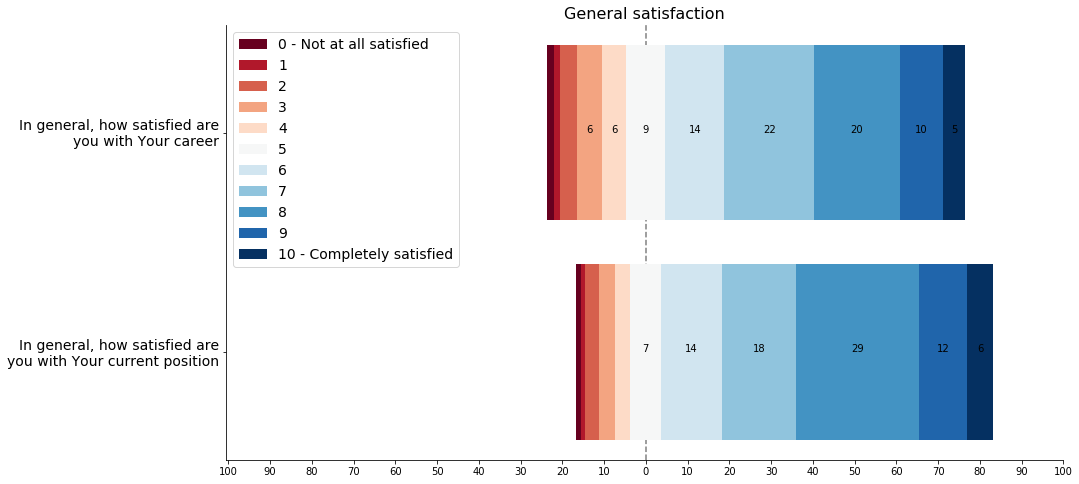

In [220]:
_ = get_plot(v_to_count, "likert")

## Feedback about performance

### Do you receive sufficient information on the results of your work?; Does your work give you the opportunity to check on how well you are doing your work?; In your work, do you have access to sufficient data and information?; Do you receive sufficient information on the purpose of your work?; Does your work provide you with direct feedback on how well you are doing your work?; Does your supervisor/line manager inform you about how well you are doing your work?; Do your colleagues inform you about how well you are doing your work?

In [221]:
v_to_count, filename  = get_count(df, ['likert1[perfCheck1]. [Do you receive sufficient information on the results of your work?]', 'likert1[perfCheck2]. [Does your work give you the opportunity to check on how well you are doing your work?]', 'likert1[perfCheck3]. [In your work, do you have access to sufficient data and information?]', 'likert1[perfCheck4]. [Do you receive sufficient information on the purpose of your work?]', 'likert1[perfCheck5]. [Does your work provide you with direct feedback on how well you are doing your work?]', 'likert1[perfCheck6]. [Does your supervisor/line manager inform you about how well you are doing your work?]', 'likert1[perfCheck7]. [Do your colleagues inform you about how well you are doing your work?]'], "likert", "./../../survey_creation/2017/de/listAnswers/likert_time_10.csv", "False", "./de/output/")

In [222]:
display(v_to_count) 

Do you receive sufficient information on the results of your work?  \
                                                                                       
﻿1 (None at all)                                                  3                    
2                                                                 9                    
3                                                                22                    
4                                                                14                    
5                                                                21                    
6                                                                24                    
7                                                                41                    
8                                                                55                    
9                                                                41                    
10 (All my time)                                                 42                    

                  Does your work give you the opportunity to check on how well you are doing your work?  \
                                                                                                          
﻿1 (None at all)                                                 10                                       
2                                                                22                                       
3                                                                22                                       
4                                                                28                                       
5                                                                33                                       
6                                                                32                                       
7                                                                47                                       
8                                                                36                                       
9                                                                18                                       
10 (All my time)                                                 23                                       

                  In your work, do you have access to sufficient data and information?  \
                                                                                         
﻿1 (None at all)                                                  2                      
2                                                                 9                      
3                                                                 8                      
4                                                                 9                      
5                                                                15                      
6                                                                18                      
7                                                                43                      
8                                                                68                      
9                                                                56                      
10 (All my time)                                                 43                      

                  Do you receive sufficient information on the purpose of your work?  \
                                                                                       
﻿1 (None at all)                                                  6                    
2                                                                 5                    
3                                                                 7                    
4                                                                 5                    
5                                                                15

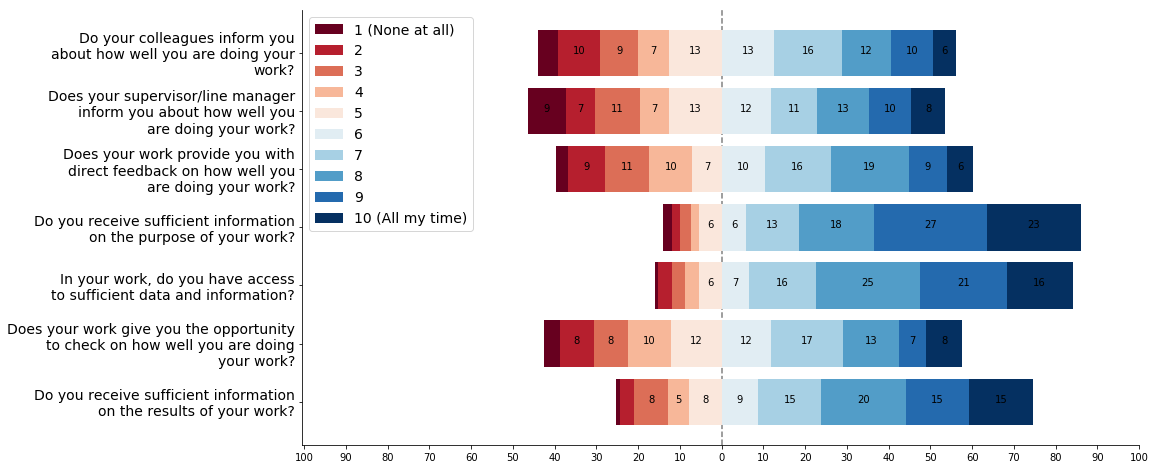

In [223]:
_ = get_plot(v_to_count, "likert")

## Turnover intention

### How often do you feel frustrated when not given the opportunity to achieve your personal work-related goals?; How often do you look forward to another day at work?; How often do you consider leaving your job?; How often do dream about getting another job that will better suit your needs?

In [224]:
v_to_count, filename  = get_count(df, ['likert1[turnOver1]. [How often do you feel frustrated when not given the opportunity to achieve your personal work-related goals?]', 'likert1[turnOver2]. [How often do you look forward to another day at work?]', 'likert1[turnOver3]. [How often do you consider leaving your job?]', 'likert1[turnOver4]. [How often do dream about getting another job that will better suit your needs?]'], "likert", "./../../survey_creation/2017/de/listAnswers/likert_time_10.csv", "False", "./de/output/")

In [225]:
display(v_to_count) 

How often do you feel frustrated when not given the opportunity to achieve your personal work-related goals?  \
                                                                                                                                 
﻿1 (None at all)                                                 21                                                              
2                                                                35                                                              
3                                                                37                                                              
4                                                                32                                                              
5                                                                37                                                              
6                                                                31                                                              
7                                                                26                                                              
8                                                                25                                                              
9                                                                18                                                              
10 (All my time)                                                  9                                                              

                  How often do you look forward to another day at work?  \
                                                                          
﻿1 (None at all)                                                  7       
2                                                                 2       
3                                                                 9       
4                                                                18       
5                                                                27       
6                                                                33       
7                                                                44       
8                                                                61       
9                                                                47       
10 (All my time)                                                 23       

                  How often do you consider leaving your job?  \
                                                                
﻿1 (None at all)                                           55   
2                                                          63   
3                                                          40   
4                                                          18   
5                                                          18   
6                                                          13   
7                                                          20   
8                                                          23   
9                                                          12   
10 (All my time)                                            9   

                  How often do dream about getting another job that will better suit your needs?  
                                                                                                  
﻿1 (None at all)                                                 46                               
2                                                                48                               
3                                                                35                               
4                                                                18                               
5                                                                20                               
6                                                                22               

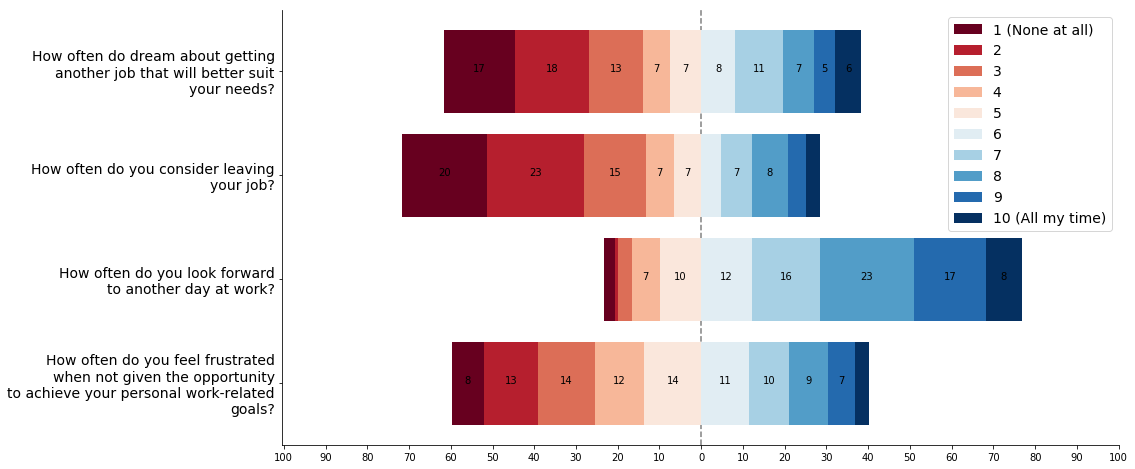

In [226]:
_ = get_plot(v_to_count, "likert")

### My current job satisfies my personal needs; I would accept another job at the same compensation level if I was offered it

In [227]:
v_to_count, filename  = get_count(df, ['likert2[turnOver5]. [My current job satisfies my personal needs]', 'likert2[turnOver6]. [I would accept another job at the same compensation level if I was offered it]'], "likert", "./../../survey_creation/2017/de/listAnswers/likert_agree.csv", "False", "./de/output/")

In [228]:
display(v_to_count) 

My current job satisfies my personal needs  \
                                                                        
Strongly disagree                                                  11   
Disagree                                                           47   
Neither agree or disagree                                          58   
Agree                                                             115   
Strongly Agree                                                     38   

                           I would accept another job at the same compensation level if I was offered it  
                                                                                                          
Strongly disagree                                                         76                              
Disagree                                                                  79                              
Neither agree or disagree                                                 61                              
Agree                                                                     42                              
Strongly Agree                                                            11

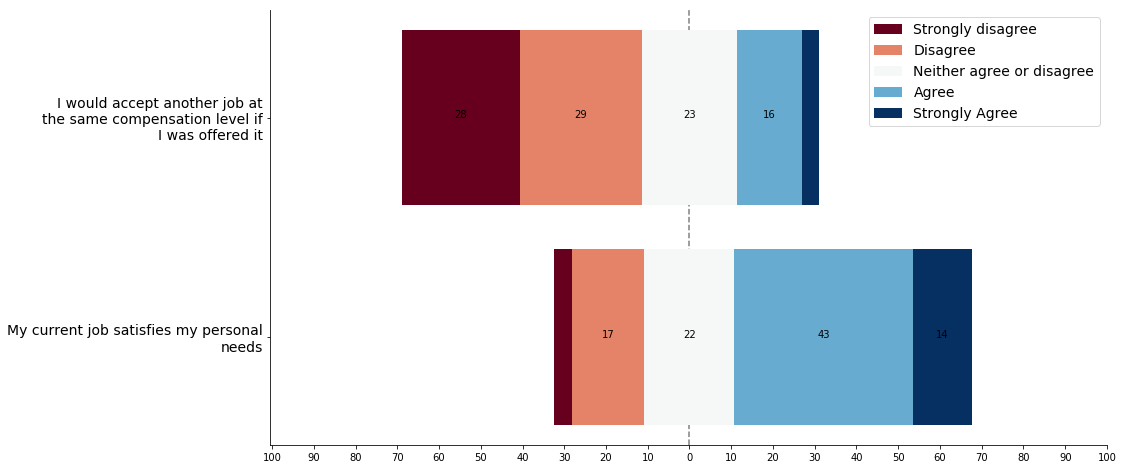

In [229]:
_ = get_plot(v_to_count, "likert")

## Perceived Employability

### It would not be very difficult for me to get an equivalent job in a different organisation; I can think of a number of organisations that would probably offer me a job; My experience is in demand on the labour market; Given my qualifications and experience, getting a new job would not be very hard at all

In [230]:
v_to_count, filename  = get_count(df, ['likert2[percEmp1]. [It would not be very difficult for me to get an equivalent job in a different organisation]', 'likert2[percEmp2]. [I can think of a number of organisations that would probably offer me a job]', 'likert2[percEmp3]. [My experience is in demand on the labour market]', 'likert2[percEmp4]. [Given my qualifications and experience, getting a new job would not be very hard at all]'], "likert", "./../../survey_creation/2017/de/listAnswers/likert_agree.csv", "False", "./de/output/")

In [231]:
display(v_to_count) 

It would not be very difficult for me to get an equivalent job in a different organisation  \
                                                                                                                        
Strongly disagree                                                         17                                            
Disagree                                                                  37                                            
Neither agree or disagree                                                 86                                            
Agree                                                                     90                                            
Strongly Agree                                                            39                                            

                           I can think of a number of organisations that would probably offer me a job  \
                                                                                                         
Strongly disagree                                                         25                             
Disagree                                                                  41                             
Neither agree or disagree                                                 85                             
Agree                                                                     91                             
Strongly Agree                                                            27                             

                           My experience is in demand on the labour market  \
                                                                             
Strongly disagree                                                        9   
Disagree                                                                22   
Neither agree or disagree                                               76   
Agree                                                                  101   
Strongly Agree                                                          61   

                           Given my qualifications and experience, getting a new job would not be very hard at all  
                                                                                                                    
Strongly disagree                                                         21                                        
Disagree                                                                  31                                        
Neither agree or disagree                                                 84                                        
Agree                                                                     86                                        
Strongly Agree                                                            47

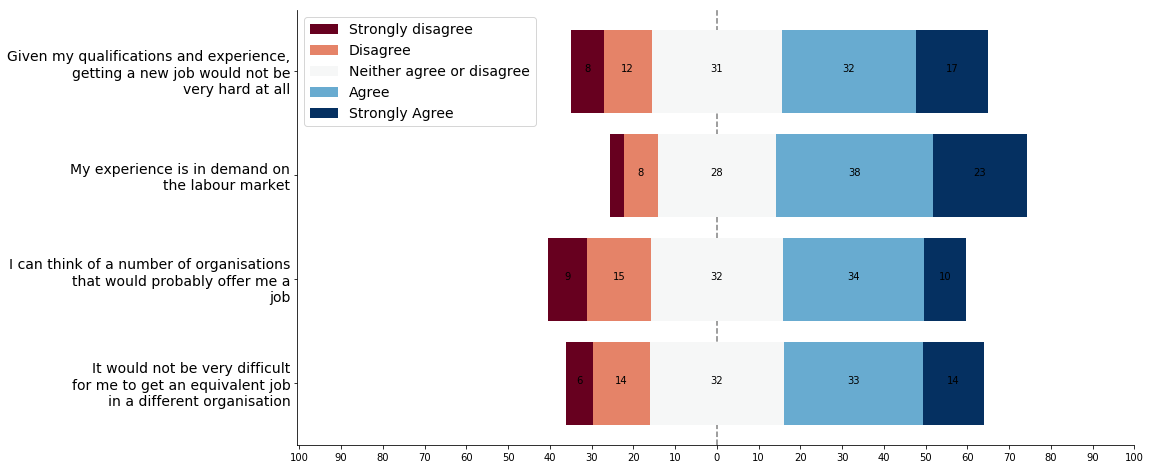

In [232]:
_ = get_plot(v_to_count, "likert")

## Affective recognition

### I am satisfied with my supervisor/line manager's confidence in me; I am satisfied with a word of thanks from my supervisor/line manager; I am satisfied with the recognition I receive from my supervisor/line manager for doing my job; I am satisfied with the compliments from my supervisor/line manager concerning my work; I am satisfied with the encouragement from my supervisor/line manager while doing my job

In [233]:
v_to_count, filename  = get_count(df, ["likert2[affRec1]. [I am satisfied with my supervisor/line manager's confidence in me]", 'likert2[affRec2]. [I am satisfied with a word of thanks from my supervisor/line manager]', 'likert2[affRec3]. [I am satisfied with the recognition I receive from my supervisor/line manager for doing my job]', 'likert2[affRec4]. [I am satisfied with the compliments from my supervisor/line manager concerning my work]', 'likert2[affRec5]. [I am satisfied with the encouragement from my supervisor/line manager while doing my job]'], "likert", "./../../survey_creation/2017/de/listAnswers/likert_agree.csv", "False", "./de/output/")

In [234]:
display(v_to_count) 

I am satisfied with my supervisor/line manager's confidence in me  \
Affective recognition                                                                          
Strongly disagree                                                          8                   
Disagree                                                                  22                   
Neither agree or disagree                                                 42                   
Agree                                                                    105                   
Strongly Agree                                                            92                   

                           I am satisfied with a word of thanks from my supervisor/line manager  \
Affective recognition                                                                             
Strongly disagree                                                         22                      
Disagree                                                                  25                      
Neither agree or disagree                                                 71                      
Agree                                                                    110                      
Strongly Agree                                                            41                      

                           I am satisfied with the recognition I receive from my supervisor/line manager for doing my job  \
Affective recognition                                                                                                       
Strongly disagree                                                         23                                                
Disagree                                                                  38                                                
Neither agree or disagree                                                 58                                                
Agree                                                                     98                                                
Strongly Agree                                                            52                                                

                           I am satisfied with the compliments from my supervisor/line manager concerning my work  \
Affective recognition                                                                                               
Strongly disagree                                                         19                                        
Disagree                                                                  27                                        
Neither agree or disagree                                                 67                                        
Agree                                                                    102                                        
Strongly Agree                                                            54                                        

                           I am satisfied with the encouragement from my supervisor/line manager while doing my job  
Affective recognition                                                                                                
Strongly disagree                                                         25                                         
Disagree                                                                  40                                         
Neither agree or disagree                                                 64                                         
Agree                                                                     99                                         
Strongly Agree                                                            41

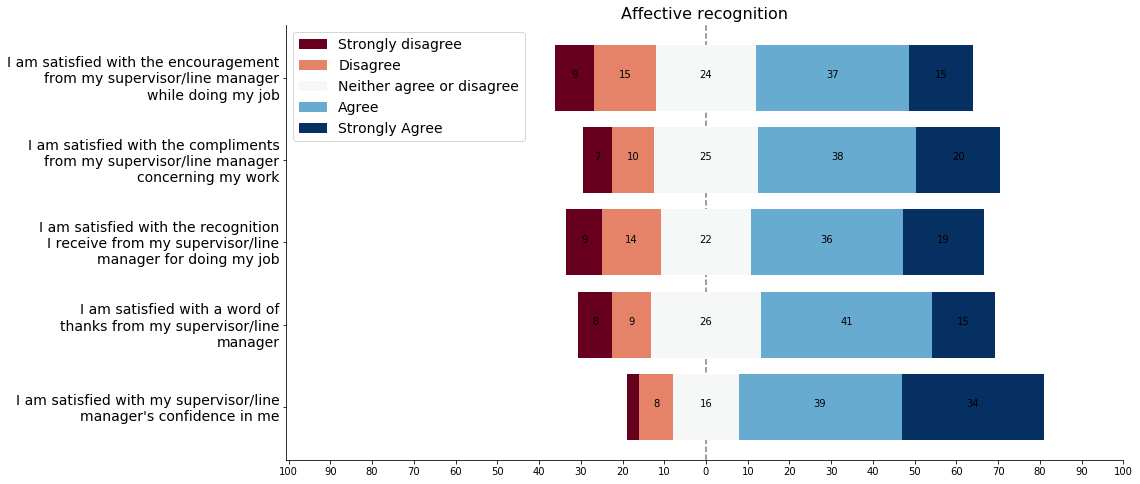

In [235]:
_ = get_plot(v_to_count, "likert")

## Affective satisfaction

### I find real enjoyment in my job; Most days I am enthusiastic about my job; I feel fairly well satisfied with my job; I like my job better than the average person

In [236]:
v_to_count, filename  = get_count(df, ['likert2[affSat1]. [I find real enjoyment in my job]', 'likert2[affSat2]. [Most days I am enthusiastic about my job]', 'likert2[affSat3]. [I feel fairly well satisfied with my job]', 'likert2[affSat4]. [I like my job better than the average person]'], "likert", "./../../survey_creation/2017/de/listAnswers/likert_agree.csv", "False", "./de/output/")

In [237]:
display(v_to_count) 

I find real enjoyment in my job  \
                                                             
Strongly disagree                                        7   
Disagree                                                19   
Neither agree or disagree                               52   
Agree                                                  133   
Strongly Agree                                          58   

                           Most days I am enthusiastic about my job  \
                                                                      
Strongly disagree                                                 9   
Disagree                                                         30   
Neither agree or disagree                                        71   
Agree                                                           120   
Strongly Agree                                                   39   

                           I feel fairly well satisfied with my job  \
                                                                      
Strongly disagree                                                 6   
Disagree                                                         33   
Neither agree or disagree                                        48   
Agree                                                           135   
Strongly Agree                                                   47   

                           I like my job better than the average person  
                                                                         
Strongly disagree                                                     6  
Disagree                                                             14  
Neither agree or disagree                                            64  
Agree                                                               121  
Strongly Agree                                                       64

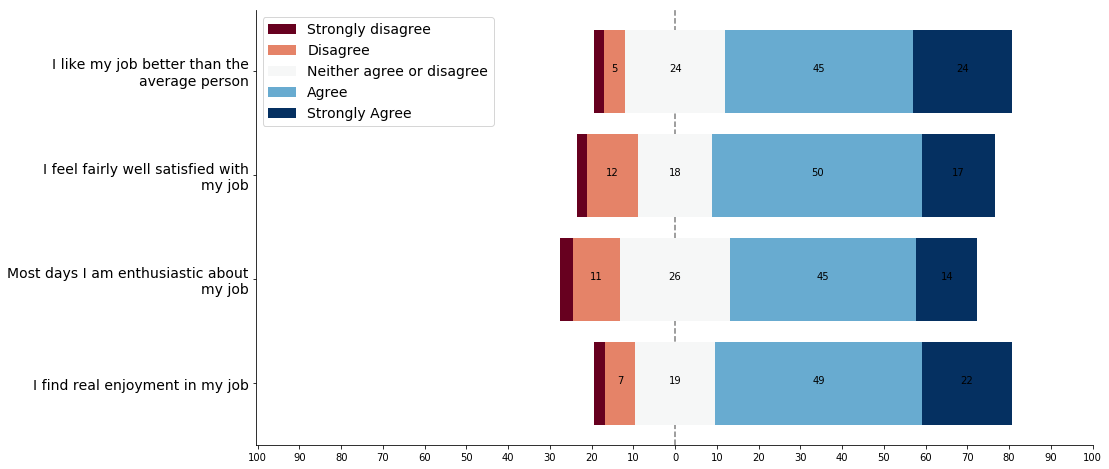

In [238]:
_ = get_plot(v_to_count, "likert")

## Possibility of progression

### It is likely that I will gain a promotion within my current group; The process I have to complete to gain a promotion is clear and understandable; There are many opportunities within my chosen career plan; My current position is an integral part of my career plan; It is likely that my next position will be an RSE role

In [239]:
v_to_count, filename  = get_count(df, ['likert2[progRSE1]. [It is likely that I will gain a promotion within my current group]', 'likert2[progRSE2]. [The process I have to complete to gain a promotion is clear and understandable]', 'likert2[progRSE3]. [There are many opportunities within my chosen career plan]', 'likert2[progRSE4]. [My current position is an integral part of my career plan]', 'likert2[progRSE5]. [It is likely that my next position will be an RSE role]'], "likert", "./../../survey_creation/2017/de/listAnswers/likert_agree.csv", "False", "./de/output/")

In [240]:
display(v_to_count) 

It is likely that I will gain a promotion within my current group  \
                                                                                               
Strongly disagree                                                         97                   
Disagree                                                                  68                   
Neither agree or disagree                                                 75                   
Agree                                                                     18                   
Strongly Agree                                                            11                   

                           The process I have to complete to gain a promotion is clear and understandable  \
                                                                                                            
Strongly disagree                                                         81                                
Disagree                                                                  57                                
Neither agree or disagree                                                 69                                
Agree                                                                     39                                
Strongly Agree                                                            23                                

                           There are many opportunities within my chosen career plan  \
                                                                                       
Strongly disagree                                                         46           
Disagree                                                                  65           
Neither agree or disagree                                                 64           
Agree                                                                     69           
Strongly Agree                                                            25           

                           My current position is an integral part of my career plan  \
                                                                                       
Strongly disagree                                                         13           
Disagree                                                                  40           
Neither agree or disagree                                                 77           
Agree                                                                     81           
Strongly Agree                                                            58           

                           It is likely that my next position will be an RSE role  
                                                                                   
Strongly disagree                                                         35       
Disagree                                                                  34       
Neither agree or disagree                                                117       
Agree                                                                     67       
Strongly Agree                                                            16

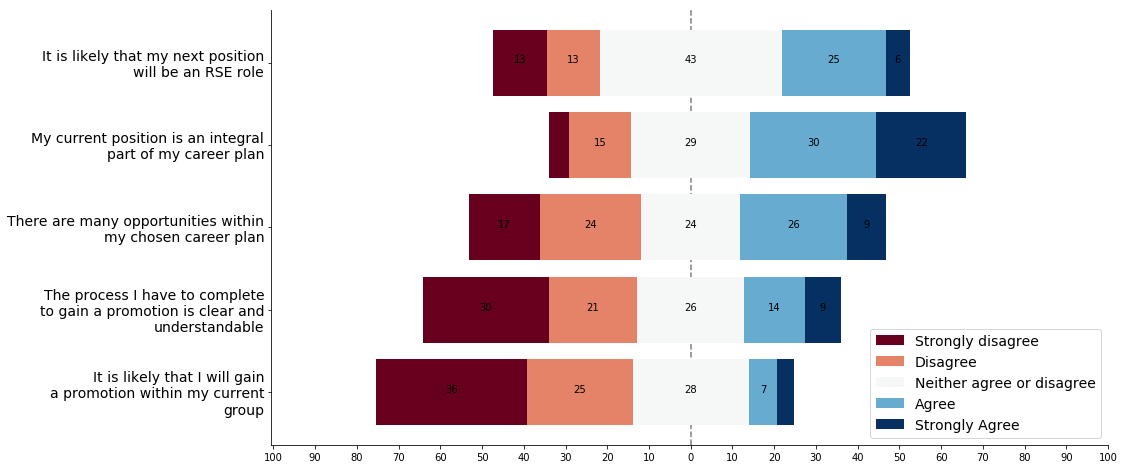

In [241]:
_ = get_plot(v_to_count, "likert")

# Section 10. Research Software Engineer

This last section regroups different questions about RSEs in general, the specific skills for them, where they meet other RSEs and the prospect of a conference in Germany. We asked them *how* they acquired the skills to become an RSE but also *which* skills they would like to acquire to become a better RSE. The propositions are listed and a wordcloud is proposed to see which are the most frequent words.

The term Research Software Engineer may not have a consensus everywhere. This is why in this survey asked the participants if they could think of another job title. When all the none answer, and the answers saying 'No', were filtered, it remained only 22 propositions that are detailed below.
The last section was about the RSE network, specific to Germany. It appears that the network is not really efficient yet. First, to the question where they meet other RSE, only 29% of them chose between the different propositions, with a higher number in local RSE group (15%). Added to that, we asked if they were member of the [de-RSE initiative](http://www.de-rse.org/) but only 19% of them where.
However, to the question to participate to a conference about software development in Germany, 78% of them answered 'Yes'.


## Skills

### How did you learn the skills you need to become an RSE?

In [242]:
data = df['ukrse3. How did you learn the skills you need to become an RSE?'].dropna()
data = [z.strip() for i in data for z in i.split(',') if len(z.strip()) > 2]
data = [z.replace('/', ' ').replace(';', ' ').strip().lower() for z in data]
data = [ ''.join(i for i in s if not i.isdigit()).strip() for s in data if len(s) < 50 and s not in ['none']]
print('There are {} propositions'.format(len(data)))

There are 346 propositions


In [243]:
results = dict()
for i in data:
    results[str(i.lower())] = results.get(str(i.lower()), 0)+1
results = sorted(results.items(), key=operator.itemgetter(1),reverse=True)
for k in results:
    if len(k[0]) > 3 and k[1] > 1:
        print(k[0].title(), k[1])

Selbststudium 29
Learning By Doing 25
Studium 24
Autodidaktisch 14
Autodidakt 9
Workshops 5
Bücher 5
Learning-By-Doing 5
Eigenstudium 5
Ausbildung 4
University 4
Universität 4
Selbst Beigebracht 4
Stackoverflow 3
Trial And Error 3
Self-Taught 3
Selbst 3
Self Taught 3
Selbststudium (Bücher 2
Tutorials 2
Online Kurse 2
Vorlesungen 2
Schulungen 2
Training On The Job 2
Studium Und Selbststudium 2
Online-Kurse 2
Lehrveranstaltungen An Der Uni 2
On The Job 2
Self-Teaching 2
Privat 2
Informatikstudium 2
Internet 2
Weiterbildung 2
Kurse 2
Moocs 2


(-0.5, 1499.5, 799.5, -0.5)

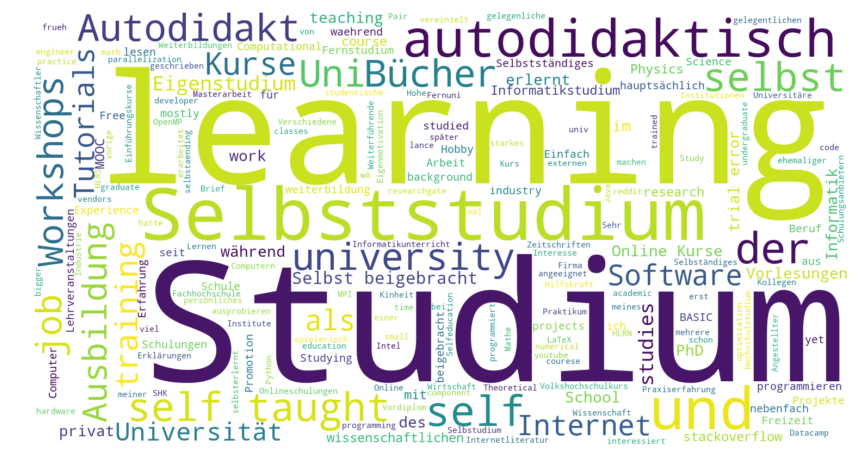

In [244]:
wc = wordcloud(df, ['ukrse3. How did you learn the skills you need to become an RSE?'])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

### What three skills would you like to acquire or improve to help your work as a Research Software Engineer? The skills can be technical and non-technical.

In [245]:
data = df['skill2. What three skills would you like to acquire or improve to help your work as a Research Software Engineer? The skills can be technical and non-technical.'].dropna()
data = [z.strip() for i in data for z in i.split(',') if len(z.strip()) > 2]
data = [z.replace('/', ' ').replace(';', ' ').strip().lower() for z in data]
data = [ ''.join(i for i in s if not i.isdigit()).strip() for s in data if len(s) < 50 and s not in ['none']]
print('There are {} propositions'.format(len(data)))

There are 278 propositions


In [246]:
results = dict()
for i in data:
    results[str(i.lower())] = results.get(str(i.lower()), 0)+1
results = sorted(results.items(), key=operator.itemgetter(1),reverse=True)
for k in results:
    if len(k[0]) > 3 and k[1] > 1:
        print(k[0].title(), k[1])

Machine Learning 9
Projektmanagement 6
Testing 6
Continuous Integration 3
Unit Testing 3
Big Data 3
Kommunikation 3
Python 2
Bessere Konzentrationsfähigkeit 2
Docker 2
Project Management 2
Softwarearchitektur 2
Requirements Engineering 2
Mitarbeiterführung 2
Unit Tests 2
Java 2
Team Working 2
Code Review 2
Dokumentation 2
Management 2
Tests 2


(-0.5, 1499.5, 799.5, -0.5)

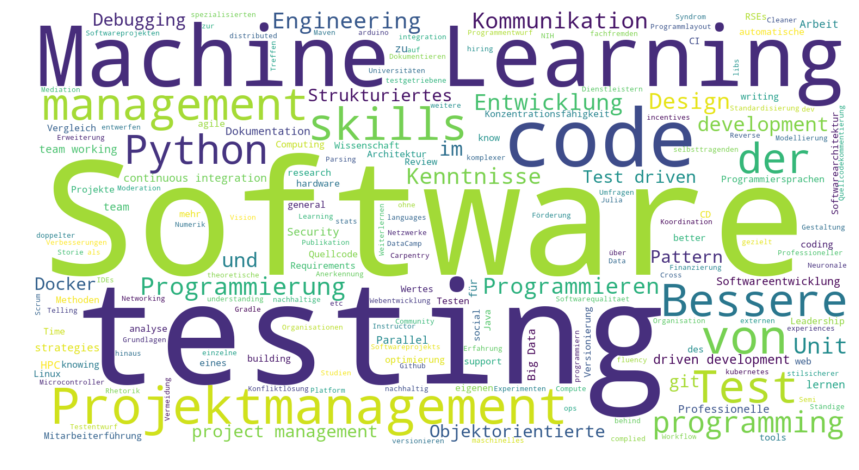

In [247]:
wc = wordcloud(df, ['skill2. What three skills would you like to acquire or improve to help your work as a Research Software Engineer? The skills can be technical and non-technical.'])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

### Do you know a better job title/role than RSE which summarizes all kinds of activities realated to academic software creation?

In [248]:
data = df['ukrse11de. Do you know a better job title/role than RSE which summarizes all kinds of activities realated to academic software creation?'].dropna()
data = [z.replace('/', ',').replace(';', ',').strip().lower() for z in data]
data = [z.strip() for i in data for z in i.split(',') if len(z.strip()) > 2]
data = [ ''.join(i for i in s if not i.isdigit()).strip() for s in data if s not in ['none', 'nein']]
print('There are {} propositions'.format(len(data)))

There are 29 propositions


In [249]:
results = dict()
for i in data:
    results[str(i.lower())] = results.get(str(i.lower()), 0)+1
results = sorted(results.items(), key=operator.itemgetter(1),reverse=True)
for k in results:
    if len(k[0]) > 3:
        print(k[0].title(), k[1])

Scientific Software Engineer 2
Software Developing Researcher 1
Nein! Rse Ist Und Sollte Internationaler Standard Sein 1
Insb. Für Vergleichbarkeit 1
Da Er Umfassend Genug Ist 1
Alle Unter Den Vom Ukrse Geprägten Begriff Fallenden Rollen Zu Erfassen. Sonderwege Wären Nicht Hilfreich. 1
What Is Rse? I Am A Biologist Writing Code. 1
Systems Engineer 1
Rad - Research Application Developer 1
Researcher. 1
Data Scientist 1
Computational Researcher 1
Research Software Developer 1
Scientific Coder 1
Numerical Scientist 1
Computational Scientist 1
Softwareentwickler 1
Just Software Engineer. Leave Out The "Research" 1
It'S Not That Special Compared To Industry Software 1
Wissenschaftlicher Entwickler 1
Scientist. Computer Scientist 1
If You Must Qualify. 1
Academic Software Developer 1
Techniker 1
Software Developer 1
The Academic Bits Are Overrated In The Rse Role 1
I Think Catagorizing Anyone Who Develops Software As An Rse Is Perhaps To Broad.  Many People Create Software As Part Of A More 

(0.0, 1.0, 0.0, 1.0)

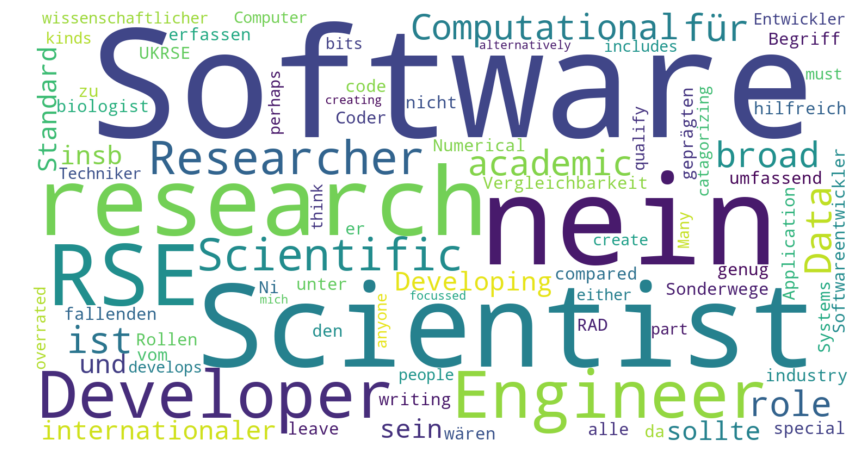

In [250]:
wc = wordcloud(df, ['ukrse11de. Do you know a better job title/role than RSE which summarizes all kinds of activities realated to academic software creation?']) 
plt.axis("off")
plt.imshow(wc, interpolation='bilinear')


## RSE Network

### How do you meet other RSEs?

In [251]:
v_to_count, filename  = get_count(df, ['ukrse2[1]. How do you meet other RSEs? [UK RSE Association (http://rse.ac.uk/)]', 'ukrse2[2]. How do you meet other RSEs? [DE-RSE Community (http://de-rse.org)]', 'ukrse2[3]. How do you meet other RSEs? [Local RSE group/network]', 'ukrse2[4]. How do you meet other RSEs? [N/A]'], "multiple choices", "./../../survey_creation/2017/de/listAnswers/ukrse_de.csv", "False", "./de/output/")

In [252]:
perc_to_count = get_percentage(v_to_count, filename)

In [253]:
display_side_by_side(v_to_count,perc_to_count)

Count Percentage
How do you meet other RSEs?                             
N/A                                       145         71
Local RSE group/network                    30         15
DE-RSE Community (http://de-rse.org)       20         10
UK RSE Association (http://rse.ac.uk/)      9          4

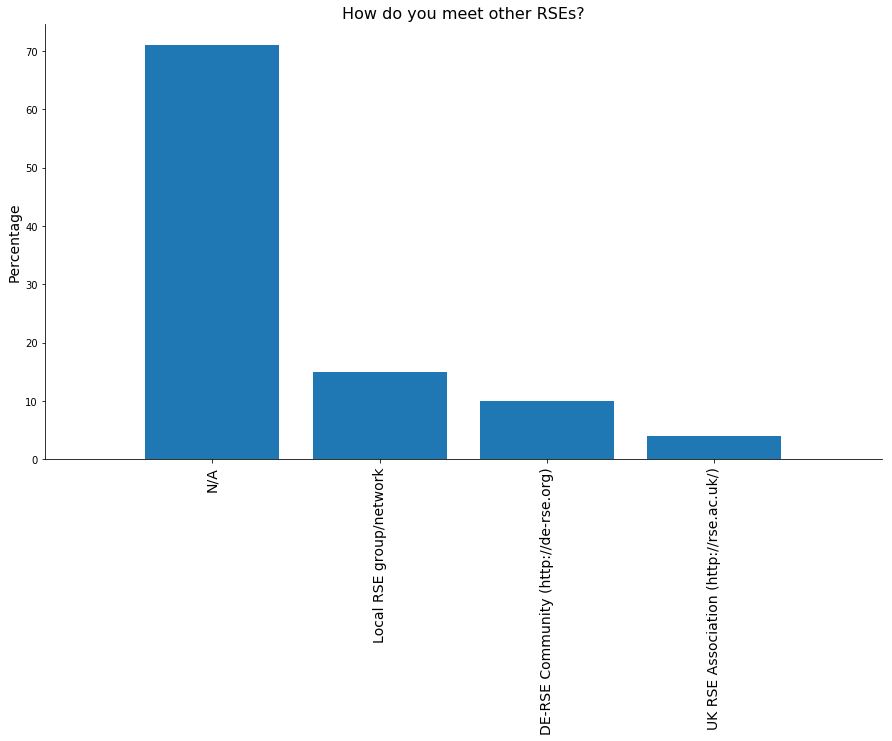

In [254]:
_ = get_plot(perc_to_count, "multiple choices")

### Are you a member of the de-RSE initiative? (Members are people who have signed up to the de-RSE mailing list, http://www.de-rse.org/en/join.html)

In [255]:
v_to_count, filename  = get_count(df, ['ukrse10de. Are you a member of the de-RSE initiative? (Members are people who have signed up to the de-RSE mailing list, http://www.de-rse.org/en/join.html)'], "y/n/na", "./../../survey_creation/2017/de/listAnswers/.csv", "False", "./de/output/")

In [256]:
perc_to_count = get_percentage(v_to_count, filename)

In [257]:
display_side_by_side(v_to_count,perc_to_count)

Yes [Count]  No [Count]  \
Are you a member of the de-RSE initiative? (Mem...                            
 Are you a member of the de-RSE initiative? (Me...           43         186   

                                                    NaN value  \
Are you a member of the de-RSE initiative? (Mem...              
 Are you a member of the de-RSE initiative? (Me...         96   

                                                   Yes [Percentage]  \
Are you a member of the de-RSE initiative? (Mem...                    
 Are you a member of the de-RSE initiative? (Me...               19   

                                                   No [Percentage]  
Are you a member of the de-RSE initiative? (Mem...                  
 Are you a member of the de-RSE initiative? (Me...              81

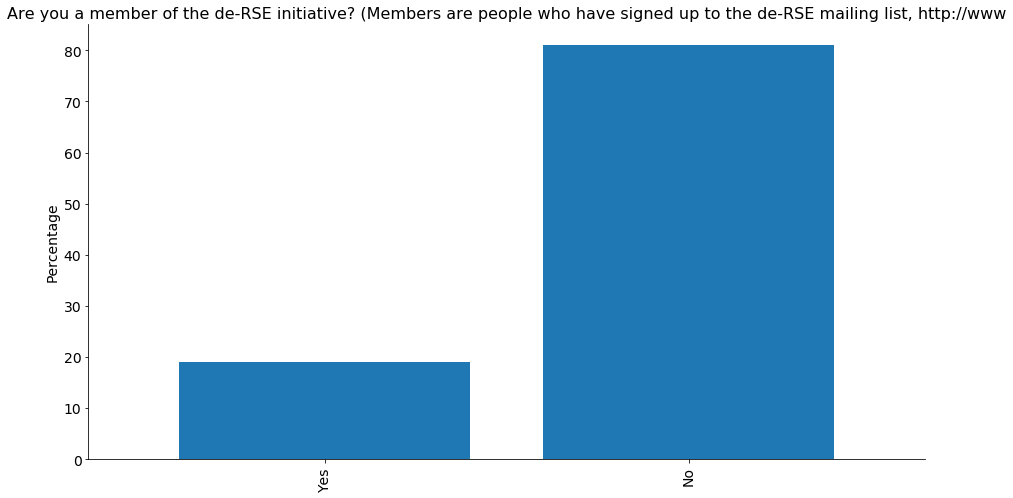

In [258]:
_ = get_plot(perc_to_count, "y/n/na")

### Would you like to visit a conference about software development in academia in Germany?; We may contact you for a possible conference announcement via email. If you allow then please add your email address here: https://goo.gl/WizV7d

In [259]:
v_to_count, filename  = get_count(df, ['ukrse12de. Would you like to visit a conference about software development in academia in Germany?', 'ukrse13de. We may contact you for a possible conference announcement via email. If you allow then please add your email address here: https://goo.gl/WizV7d'], "y/n/na", "./../../survey_creation/2017/de/listAnswers/.csv", "False", "./de/output/")

In [260]:
perc_to_count = get_percentage(v_to_count, filename)

In [261]:
display_side_by_side(v_to_count,perc_to_count)

Yes [Count]  No [Count]  \
Would you like to visit a conference about soft...                            
 Would you like to visit a conference about sof...          153          44   
 We may contact you for a possible conference a...           99           6   

                                                    NaN value  \
Would you like to visit a conference about soft...              
 Would you like to visit a conference about sof...        128   
 We may contact you for a possible conference a...        220   

                                                   Yes [Percentage]  \
Would you like to visit a conference about soft...                    
 Would you like to visit a conference about sof...               78   
 We may contact you for a possible conference a...               94   

                                                   No [Percentage]  
Would you like to visit a conference about soft...                  
 Would you like to visit a conference about sof...              22  
 We may contact you for a possible conference a...               6

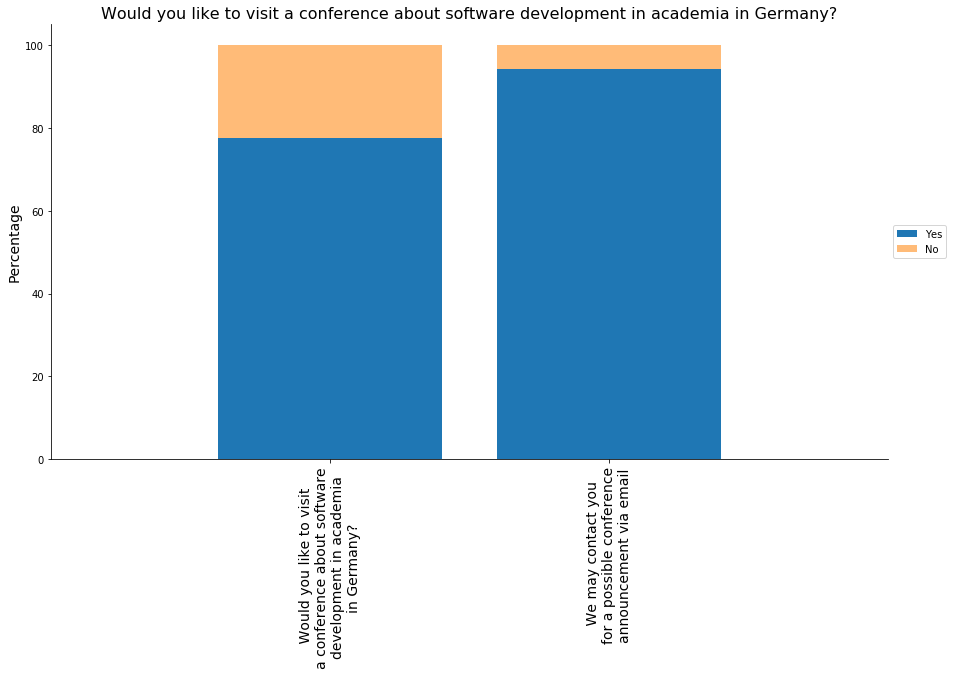

In [262]:
_ = get_plot(perc_to_count, "y/n/na")